Python 2. Don't run this code
### Содержание
    2.1. sklearn.datasets
    2.2. sklearn.cross_validation sklearn(v.1.8+)
    2.3. sklearn.ipynb.linear_model_part1
    2.4. sklearn.ipynb.linear_model_part2
    2.5. sklearn.metrics
    3.1. sklearn.grid_search
    3.2. sklearn.case_part1
    3.3. sklearn.case_part2
    4.1. sklearn.decision_trees
    4.2. sklearn.random_forest
    4.3. sklearn.rf_vs_gb
    5. imdb

# Week 2 - 1. sklearn.datasets

# Sklearn

## sklearn.datasets

документация: http://scikit-learn.org/stable/datasets/

In [1]:
from sklearn import datasets

In [2]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


### Генерация выборок

**Способы генерации данных:** 
* make_classification
* make_regression
* make_circles
* make_checkerboard
* etc

Начнем с задачи генерации модельных данных и рассмотрим модуль sklearn.datasets. 
Модуль datasets предлагает нам набор удобных функций для построения модельных данных. Существуют такие функции как make_classification или make_regression — которые позволяют строить dataset общего вида и гибко специфицировать параметры, которые нас интересуют. А также есть довольно удобные функции, такие как make_circles или make_checkerboard и другие, которые позволяют генерировать красивые наборы данных, которые удобно отрисовывать на плоскости. Эти данные обычно состоят из двух признаков (x и y) и позволяют получить красивые фигуры. Именно с такой функции начнем и рассмотрим функцию make_circles. Она позволяет нам получить dataset, который на плоскости выглядит, как две вложенные окружности. 
#### datasets.make_circles
получим датасет выглядящий как две вложенные окружности

In [3]:
circles = datasets.make_circles()
# в качестве объекта будет tuple из двух элементов. 
# Первый элемент — непосредственно набор данных, список описаний наших объектов.
# И второй элемент — это метки классов

In [4]:
# посмотрим, как они выглядят.
print "features: {} evonakak".format(circles[0][:10]) # x, y координаты
print "target: {} ogo".format(circles[1][:10]) # цвет 0 и 1
# {}".format запаковывает значения внутрь

features: [[-9.68583161e-01  2.48689887e-01]
 [-5.02324156e-02  7.98421383e-01]
 [-6.37423990e-01 -7.70513243e-01]
 [-7.01045344e-01 -3.85402939e-01]
 [-8.76306680e-01  4.81753674e-01]
 [ 7.01045344e-01  3.85402939e-01]
 [-8.00000000e-01 -2.57299624e-16]
 [-7.93691761e-01  1.00266587e-01]
 [ 8.09016994e-01  5.87785252e-01]
 [ 7.28968627e-01  6.84547106e-01]] evonakak
target: [0 1 0 1 0 1 1 1 0 0] ogo


каждый объект представляется списком из двух элементов. Первый элемент — это x координата, второй элемент — это y координата. И наши метки проставляются как цифры 0 или 1 в случае бинарной классификации, с которой мы сейчас и работаем. Вот для того, чтобы наглядно посмотреть, как же наш набор данных выглядит, я предлагаю его визуализировать. Для этого нам понадобится импортировать дополнительно объект ListedColormap. 

In [5]:
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as pyplot

чтобы отрисовать наш объект, воспользуемся функцией scatter. Эта функция позволяет отрисовывать точки, зная их x и y координаты. На входе нужно подать два списка: первый — список x координат, второй — список y координат.  Зная, как выглядит наш набор данных, мы понимаем, как же этот список получить. Комбинация функций map и lambda позволяет сначала достать x координаты, в данном случаем мы проходимся по нашим объектам и берем нулевой элемент из списка, и аналогично можно получить y координату, только в данном случае в lambda функции мы указываем первый элемент из списка. Дальше нужно указать, какими цветами отрисовывать объекты. Понятно, что для наглядности мы хотим объекты разных классов видеть разными цветами. Конечно, можно было бы сделать так: можно было бы дважды вызвать функцию scatter, первый раз отрисовать объекты нулевого класса одним цветом, второй раз отрисовать объекты первого класса другим цветом. Но если бы у нас было больше двух классов, например 20, тогда было бы не очень удобно. Вот для того, чтобы этого не делать, можно воспользоваться Colormap. В таком случае в качестве цветов мы можем передать просто числа, последовательность номеров, и далее передать в эту функцию некоторый объект, который знает связь между номером и цветом. В данном случае это и есть объект Colormap. Мы создаем его вот здесь, мы говорим, что у нас есть всего 2 цвета, в данном случае я выбрала красный и желтый, и таким образом получается, что объекты с меткой 0 будут иметь красный цвет, с меткой 1 — желтый.

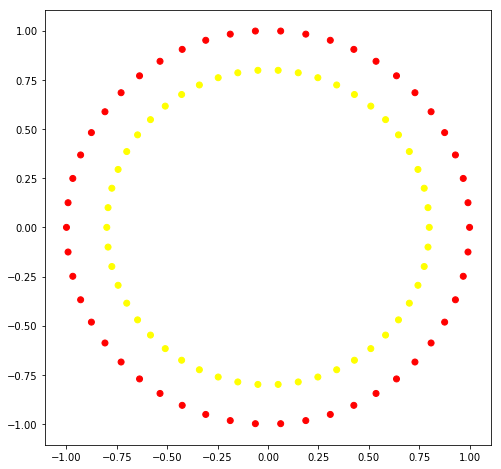

In [6]:
# pyplot.scatter рисует точки по координатам
# на вход подаются два списка, икс и игрик координат

# объекты с меткой 0 красные, с меткой один желтые
colors = ListedColormap(['red', 'yellow'])

# figsize задает размер в дюймах
pyplot.figure(figsize=(8, 8)) 
pyplot.scatter(map(lambda x: x[0], circles[0]), 
               map(lambda x: x[1], circles[0]), 
               c = circles[1], cmap = colors)
# первая ламбда берет x, вторая берет y, 
# c = circles[1] берет цифру цвета, 0- КРАСНЫЙ

получили как раз две окружности: вложенная окружность желтого цвета и внешняя окружность красного. 

In [7]:
# Обернем эти команды в одну функцию
print map(lambda x: x[0], circles[0])[:5] # первые 5 значений x 
print map(lambda x: x[1], circles[0])[:5] # первые 5 значений y
print circles[1][:5] # их цвета

[-0.9685831611286311, -0.050232415623450724, -0.6374239897486895, -0.7010453440350909, -0.8763066800438636]
[0.24868988716485482, 0.7984213827426173, -0.7705132427757894, -0.3854029392813723, 0.4817536741017152]
[0 1 0 1 0]


In [8]:
def plot_2d_dataset(data, colors):
    pyplot.figure(figsize=(8, 8))
    pyplot.scatter(map(lambda x: x[0], data[0]), 
                   map(lambda x: x[1], data[0]), 
                   c = data[1], cmap = colors)

усложним задачу и получим окружность не с такими четкими краями. Для этого нужно передать параметр noise (шум) который мы добавим к нашим данным. Сначала добавим не очень сильный шум

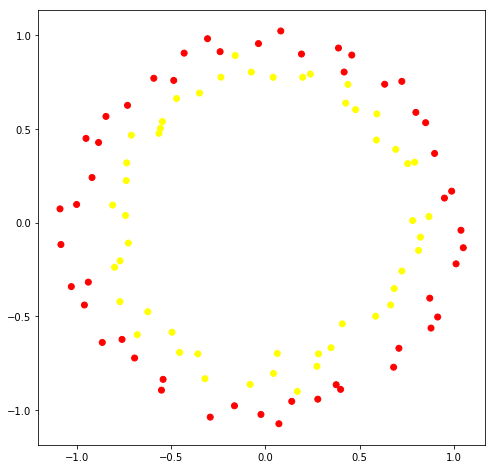

In [9]:
noisy_circles_small = datasets.make_circles(noise = 0.05)
plot_2d_dataset(noisy_circles_small, colors)

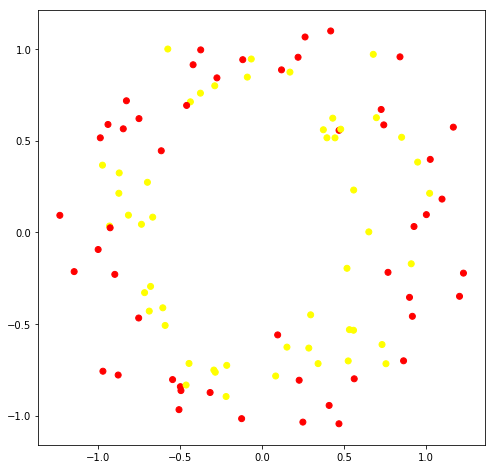

In [10]:
# Задача с точки зрения классификации усложнилась, границы не такие четкие. Еще немного усложним задачу
noisy_circles_big = datasets.make_circles(noise = 0.15)
plot_2d_dataset(noisy_circles_big, colors)

#### datasets.make_classification
Теперь рассмотрим функцию make_classification, она позволяет гибко создавать набор данных, который нас интересует. В частности, мы можем указать количество объектов (которые мы хотим видеть в нашем dataset), количество признаков, сколько из этих признаков должно быть информативными, а сколько избыточными. Можем даже ввести повторяющиеся признаки. Для начала построим очень простую задачу классификации. Для того чтобы визуализировать набор данных удобнее работать с двумя признаками. Самостоятельно можно задать любое количество признаков. Зададим два признака - один из них будет информативным, и опять будем решать задачу бинарной классификации, зададим число классов равное двойке. 

In [11]:
# задача на два класса
simple_classification_problem = datasets.make_classification(n_features = 2, n_informative = 1, 
                                                            n_redundant = 1, n_clusters_per_class = 1,
                                                            random_state = 1 )

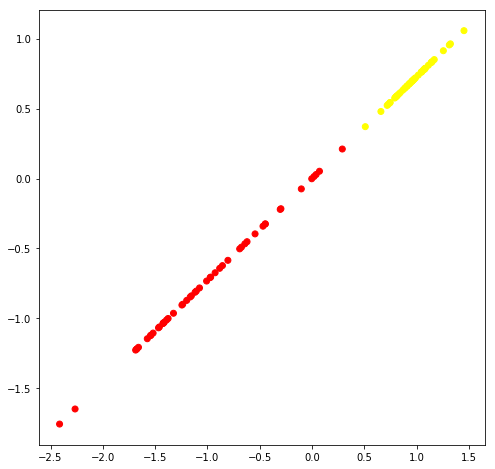

In [12]:
# Теперь давайте посмотрим, как наш dataset выглядит. 
plot_2d_dataset(simple_classification_problem, colors)

Ну вот видим, что получили достаточно простую задачу. Очевидно, где нужно провести разделяющую плоскость в случае классификации. Усложним - будем решать задачу классификации на 4 класса. Для этого изменим значение параметра n_classes (number of classes) и скажем, что два признака будут информативными. Gридется еще изменить объект colors, потому что нам нужно несколько больше цветов для отрисовки этого набора данных.

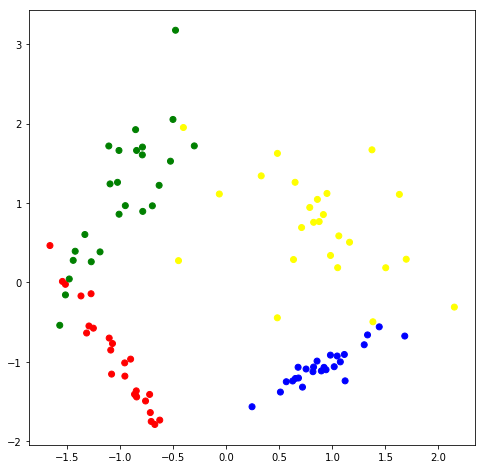

In [13]:
# задача на 4 класса 
classification_problem = datasets.make_classification(n_features = 2, n_informative = 2, n_classes = 4, 
                                                      n_redundant = 0, n_clusters_per_class = 1, random_state = 1)

colors = ListedColormap(['red', 'blue', 'green', 'yellow'])

plot_2d_dataset(classification_problem, colors)

### "Игрушечные" наборы данных

Получили четыре облака точек. Т.о., с помощью этой функции можно генерировать набор данных практически любой сложности и гибко решать интересующие задачи. 
Помимо непосредственной генерации данных с помощью Sklearn.datasets можно загружать toy datasets («игрушечные» наборы данных). Это стандартные наборы данных, которые часто используются для тестирования алгоритмов. Их можно загрузить с помощью: 
* load_iris 
* load_boston
* load_diabetes
* load_digits
* load_linnerud
* etc

Воспользуемся функцией load_iris, и теперь давайте посмотрим на объект, который мы получили. 

#### datasets.load_iris

In [14]:
iris = datasets.load_iris() # загружаем датасет
print iris

{'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2]), 'DESCR': '.. _iris_dataset:\n\nIris plants dataset\n--------------------\n\n**Data Set Characteristics:**\n\n    :Number of Instances: 150 (50 in each of three classes)\n    :Number of Attributes: 4 numeric, predictive attributes and the class\n    :Attribute Information:\n        - sepal length in cm\n        - sepal width in cm\n        - petal length in cm\n        - petal width in cm\n        - class:\n                - Iris-Setosa\n                - Iris-Versicolour\n           

In [15]:
# Видим, что это dict-like object, у которого есть ключи и некоторые значения по этим ключам.
print iris.keys() # список ключей
print iris.DESCR # описание датасета
# Нам доступны названия признаков, доступны сами данные, сама целевая переменная, 
# также есть некоторое описание данных и известны имена классов. 

['target', 'DESCR', 'target_names', 'feature_names', 'data', 'filename']
.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76 

Из описания можно очень многое про наш набор данных понять. В частности,знаем сколько доступно объектов, какие есть признаки, что они означают. В данном случае понятно, что признаки — это метрические характеристики цветков. Даже доступна некоторая статистика по нашим признакам. И есть ссылка на UCI репозиторий, в котором хранится исходный набор данных, даже есть информация о некоторых references, авторы и так далее. 

In [16]:
# Посмотрим на имена признаков и имена классов.
print "feature names: {}".format(iris.feature_names)
print "target names: {names}".format(names = iris.target_names)

feature names: ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
target names: ['setosa' 'versicolor' 'virginica']


Из этого понятно, как называются виды ирисов. Теперь посмотрим на данные. Ну вот видим, что это ровно те 4 признака, о которых было сказано в описании, и можно посмотреть на целевую переменную. Видно, что классы представлены метками от 0 до 2 и объекты отсортированы по классам. Теперь понятно, что из себя представляет эта выборка.

In [17]:
print iris.data[:10]
print iris.target

[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


### Визуализация выборки

Ну вот давайте на нее посмотрим и визуализируем наши данные. Для этого нам будет удобно работать с данными, как с таблицей - построим новый pandas DataFrame. 

In [18]:
from pandas import DataFrame
iris_frame = DataFrame(iris.data)
iris_frame.head()

,0,1,2,3
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [19]:
# Строить будем его на основе наших данных, далее добавим в качестве названий колонок имена признаков
print iris.feature_names # смотрим имена признаков
iris_frame.columns = iris.feature_names # запихиваем их в столбцы
iris_frame.head()

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [20]:
# и добавим дополнительный столбец target. Он нам нужен для того, 
# чтобы анализировать данные, зная информацию о классах. 
iris_frame['target'] = iris.target # добавляем в датафрейм столбец 
iris_frame.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


получили признаковое описание каждого объекта и в конце метка класса. В таком виде уже удобно работать с набором данных, но так как мы хотим сейчас просто визуализировать dataset, то рассмотрим колонку target и заменим в ней метки классов на их имена. Это можно сделать очень просто с помощью функции apply. Передадим в нее lambda функцию, которая берет метку класса и вместо нее подставляет название.

In [21]:
# засунуть в target вместо цифры имя
iris_frame.target = iris_frame.target.apply(lambda x : iris.target_names[x])
iris_frame.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


вместо метки класса там его имя. 
посмотрим, как выглядит гистограмма первого признака для класса setosa

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000000000BA9B358>]],
      dtype=object)

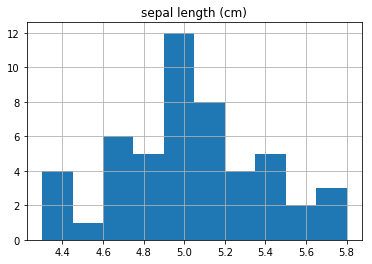

In [22]:
# Построим график для всех цветов категории setosa,
# от параметра sepal length (cm)
iris_frame[iris_frame.target == 'setosa'].hist('sepal length (cm)')

Нас интересует не только это распределение, интересно посмотреть на распределение всех признаков в рамках всех классов. Но  хочется понять, отличаются они между собой или нет, сможем ли мы по этим признакам каким-то образом разделить наши объекты. Можно делать это построив отдельно каждый график. Но это не очень удобно особенно когда много признаков, много классов, это довольно трудоемкое занятие. Получим одну картинку, на которой мы будем иметь следующий набор данных: мы хотим построить гистограммы всех признаков по всем классам. Когда у нас не очень много классов и не очень много признаков, это довольно просто делается. Для этого мы с вами снова воспользуемся pyplot'ом и в цикле по признакам и по классам будем строить некоторые графики. Для этого нам понадобится метод subplot, который позволяет нам строить такую матрицу из графиков. В этот метод мы можем передать количество строк и количество столбцов, которое мы хотим, и также для каждого конкретного графика нужно будет сдать его номер. 
Теперь мы будем пользоваться функцией hist, но уже не функцией, не методом dataframe'а, а просто методом pyplot. И также помимо самого графика, мы будем задавать его название, будем задавать ось x и ось y, как они называются. 

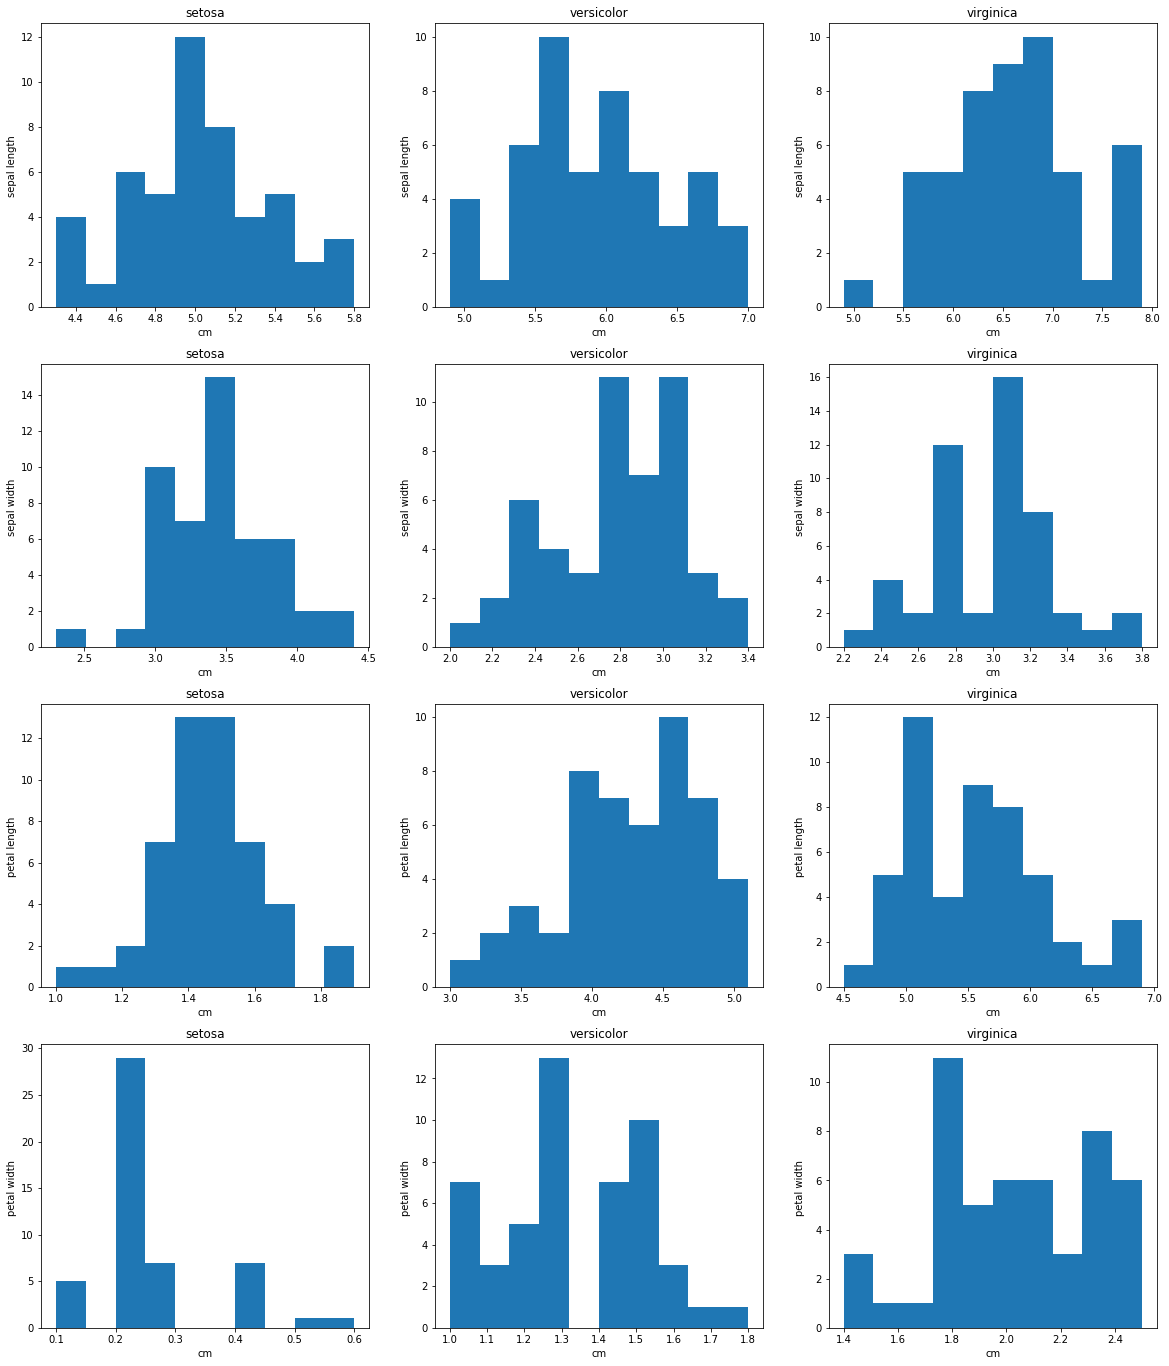

In [23]:
pyplot.figure(figsize=(20, 24))

plot_number = 0
for feature_name in iris['feature_names']:
    for target_name in iris['target_names']:
        plot_number += 1
        pyplot.subplot(4, 3, plot_number)
        pyplot.hist(iris_frame[iris_frame.target == target_name][feature_name])
        pyplot.title(target_name)
        pyplot.xlabel('cm')
        pyplot.ylabel(feature_name[:-4])

 Видим, что по столбцам у нас идут графики, касающиеся разных классов, и по строчкам мы видим признаки. Посмотрим на последний. Видим, что распределения, в общем-то, везде получились разные и видим, что даже вот по последнему признаку у нас в классе setosa максимальное значение порядка 0,6, а в следующем классе минимальное значение 1. То есть в общем-то видно, что даже в пространстве этих признаков мы задачу решить сможем, данные можно разделить.

### Бонус: библиотека seaborn

In [24]:
import seaborn as sns

Давайте отобразим наши объекты в координатах пар признаков и посмотрим, хорошо ли они разделяются. Это можно сделать с помощью метода pairplot. Передаем этому методу наши dataframe и говорим, в каком столбике находится наша целевая метка. Строим данный график и видим, что получили очень интересное изображение: по диагонали мы видим графики с распределением наших признаков, разными цветами отмечены разные классы. Это графики, аналогичные тем, которые мы с вами строили самостоятельно, но совмещенные на одну картинку. Возможно, кому-то так даже больше понравится. Все остальные графики показывают, отображают наши объекты в пространстве пар признаков. Вот мы можем посмотреть, что существуют такие пары признаков, в которых объекты довольно неплохо разделяются. Вот, например, по этому признаку видно, что объекты можно разделить. Но с другой стороны, есть такие признаки, по которым объекты разделяются не так хорошо. Вот график получился довольно неплохой, но шрифт мелкий и читать не очень удобно. С помощью метода set можно задать очень много параметров: какой шрифт мы хотим использовать, мы можем увеличить шрифт, можем задать цвета и так далее. 
Так как dataset "iris" довольно популярен, это стандартная вещь. Библиотека seaborn содержит функцию, которая позволяет этот dataset импортировать непосредственно, поэтому вам необязательно нужно иметь уже готовую dataframe к тому моменту, когда вы хотите рисовать этот график. Следственно, теперь вы знаете два способа: можно иметь свой dataframe, можно воспользоваться функцией load_datasets из библиотеки seaborn. Вот давайте теперь для разнообразия сделаем так, единственное отличие в том, что столбец target теперь называется по-другому. Вот и заодно давайте увеличим шрифт. Получили практически такой же график. Шрифт стал немножечко больше. 

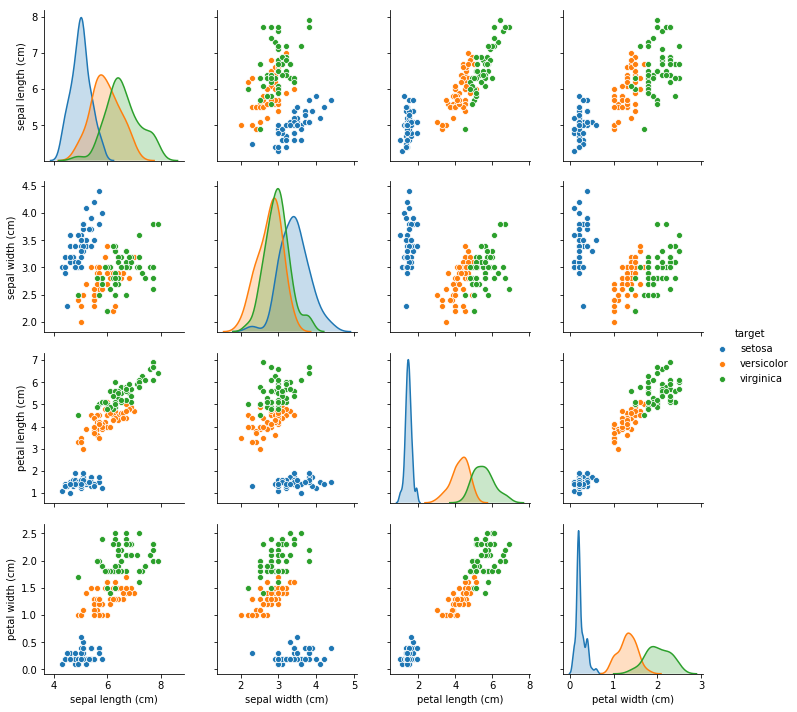

In [25]:
sns.pairplot(iris_frame, hue = 'target')

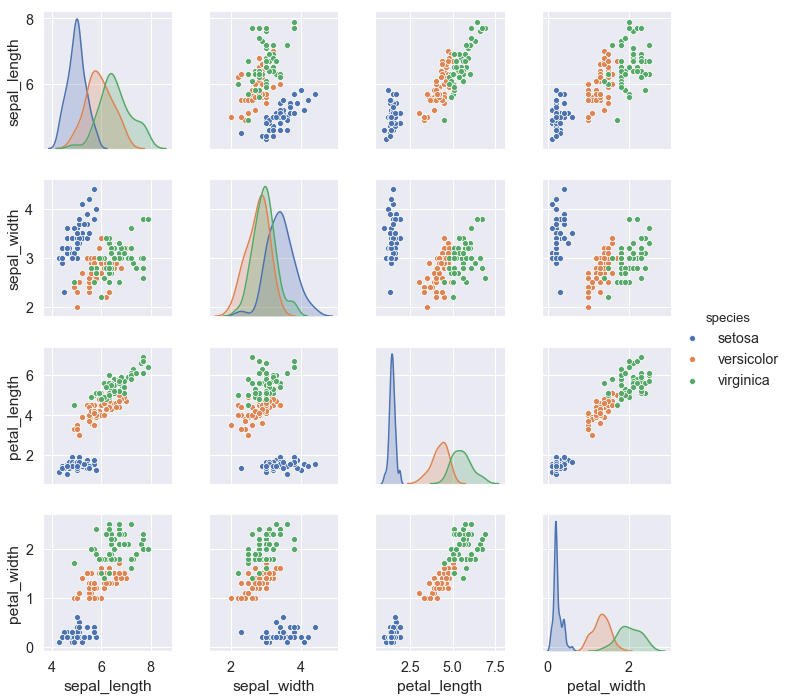

In [26]:
sns.set(font_scale = 1.3) # для настройки seaborn в одной строке
data = sns.load_dataset("iris")
sns.pairplot(data, hue = "species")

На этом уроке мы научились генерировать модельные данные и загружать стандартные dataset'ы с помощью модуля sklearn datasets. На следующем уроке мы научимся строить разбиение данных с помощью кросс-валидации.

#### **Если Вас заинтересовала библиотека seaborn:**
* установка: https://stanford.edu/~mwaskom/software/seaborn/installing.html
* установка c помощью анаконды: https://anaconda.org/anaconda/seaborn
* руководство: https://stanford.edu/~mwaskom/software/seaborn/tutorial.html
* примеры: https://stanford.edu/~mwaskom/software/seaborn/examples/

# Week 2 - 2. sklearn.cross_validation sklearn(v.1.8+)  
# Sklearn

## sklearn.model_selection

документация: http://scikit-learn.org/stable/modules/cross_validation.html

С помощью модуля Sklearn.cross_validation мы научимся делать разовые разбиения данных на обучение и тест, а также рассмотрим несколько часто встречающихся стратегий кросс-валидации.

In [1]:
from sklearn import model_selection, datasets

import numpy as np

In [2]:
import sklearn
sklearn.__version__

'0.20.3'

### Разовое разбиение данных на обучение и тест с помощью train_test_split

In [3]:
iris = datasets.load_iris()

Предположим, что нужно решить задачу классификации. Для этого нужно разбить данные на обучение и тест, чтобы впоследствии обучить модель на обучающей выборке и оценить ее качество на тесте. Для этого в cross_validation есть функция под названием train_test_split. Она позволяет построить разовое разбиение данных на обучение и тест. В качестве аргумента функция принимает набор данных, которые мы хотим разбить, набор меток классов, и также можно указать соотношение, в котором мы хотим разбивать данные. В данном случае 30 % объектов в тестовую выборку и все остальные — в обучающую. 

In [4]:
# решаем задачу классификации. Разобьем данные на обучение и тест
# cross_validation.train_test_split строит разовое разбиение данных на
# обучение и тест. В качестве аргументов принимает набор данных которые
# нужно разбить, набор меток классов и соотношение разбиение данных (0.3)
train_data, test_data, train_labels, test_labels = model_selection.train_test_split(iris.data, iris.target, 
                                                                                     test_size = 0.3)
# train выборка обучения, test выборка теста, train labels метки объектов
# из обучающей и тестовой выборок

В результате мы получили 4 объекта, train_data и test_data — это части выборки для обучения и для теста, непосредственное описание объектов, и train_labels и test_labels — это метки объектов из обучающей и тестовой выборки соответственно.

In [5]:
#убедимся, что тестовая выборка действительно составляет 0.3 от всех данных
float(len(test_labels))/len(iris.data)

0.3

Теперь выведем размер обучающей тестовой выборки в объектах. Для этого можно оценить размер train_data или test_data и также можно оценить размер train_labels или test_labels. Размеры должны получиться одинаковые.

In [6]:
print 'Размер обучающей выборки: {} объектов \nРазмер тестовой выборки: {} объектов'.format(len(train_data),
                                                                                            len(test_data))

Размер обучающей выборки: 105 объектов 
Размер тестовой выборки: 45 объектов


In [7]:
# Теперь выведем часть обучающей и тестовой выборки и посмотрим, как они выглядят
print 'Обучающая выборка:\n', train_data[:5]
print '\n'
print 'Тестовая выборка:\n', test_data[:5]
# выглядит ровно так же, как наши исходные данные, просто это некоторая подвыборка из них. 

Обучающая выборка:
[[6.7 2.5 5.8 1.8]
 [6.1 3.  4.6 1.4]
 [6.  2.9 4.5 1.5]
 [6.  2.7 5.1 1.6]
 [6.1 2.8 4.7 1.2]]


Тестовая выборка:
[[5.1 3.5 1.4 0.3]
 [5.7 3.  4.2 1.2]
 [5.1 2.5 3.  1.1]
 [6.6 3.  4.4 1.4]
 [5.4 3.4 1.7 0.2]]


In [8]:
# Можем вывести полностью список лейблов на обучении и на тесте
print 'Метки классов на обучающей выборке:\n', train_labels
print '\n'
print 'Метки классов на тестовой выборке:\n', test_labels

Метки классов на обучающей выборке:
[2 1 1 1 1 2 1 0 1 0 2 0 0 2 1 0 2 2 2 1 2 1 1 2 1 2 2 2 2 2 0 0 1 2 1 2 1
 2 0 0 1 2 0 2 1 2 0 1 2 2 0 1 2 0 0 0 2 2 0 2 1 0 0 2 2 1 1 0 0 2 2 1 2 1
 0 2 2 2 1 2 2 1 2 0 2 2 2 0 1 0 2 0 2 0 1 1 0 0 0 1 2 1 0 0 1]


Метки классов на тестовой выборке:
[0 1 1 1 0 1 1 1 0 1 2 1 0 1 1 2 0 1 0 0 0 0 0 0 1 0 1 1 0 0 0 0 2 0 1 1 0
 2 0 1 2 2 1 1 2]


это те же самые лейблы (метки от 0 до 2), и в обучении и в тесте присутствуют объекты всех классов. Эта функция позволяет строить разовое разбиение на обучение и тест. Часто это полезно, если мы просто хотим оценить качество нашей модели в одной точке. Если же мы хотим получить более строгую оценку, нам нужно пользоваться кросс-валидацией.

### Стратегии проведения кросс-валидации

In [9]:
#сгенерируем короткое подобие датасета, где элементы совпадают с порядковым номером
X = range(0,10)

#### KFold
разбиваем выборку на K групп, каждая группа 1 раз участвует в тестировании и К-1 раз участвует в обучении

Первая стратегия кросс-валидации, в которой мы разбиваем нашу выборку на K групп, при этом каждая из групп 1 раз участвует в тестировании и (K − 1) раз участвует в обучении. Для того чтобы получить такую кросс-валидацию, нам нужно использовать функцию KFold. В качестве аргументов она принимает на вход количество объектов, которое мы хотим разбивать, и количество фолдов, которое нам нужно. В отличие от train_test_split, функция KFold не строит разбиение исходных данных, а возвращает пару индексов: из обучения и из тестов, с помощью которых можно будет разбить нашу выборку. 
Разобьем 10 объектов на 5 фолдов, и посмотрим, как выглядят наши индексы.

In [10]:
# .kfold принимает количество объектов которые хотим разбивать и кол-во
# фолдов которое нужно. 10 объектов на 5 фолдов
kf = model_selection.KFold(n_splits = 5)
for train_indices, test_indices in kf.split(X):
    print train_indices, test_indices
    
# возвращает пару индексов из обучения и теста, с пом-ю которых
# потом самостоятельно разбиваем выборку

[2 3 4 5 6 7 8 9] [0 1]
[0 1 4 5 6 7 8 9] [2 3]
[0 1 2 3 6 7 8 9] [4 5]
[0 1 2 3 4 5 8 9] [6 7]
[0 1 2 3 4 5 6 7] [8 9]


Каждый фолд - 2 объекта (массива), а обучающая выборка состоит каждый раз из 8 объектов, тестовая — из 2-х. При этом объекты разбиты по порядку. Если посмотреть на тестовую выборку, то видим, что каждый раз у нас индексы расположены в исходном порядке. Не всегда это удобно, в качестве примера можете вспомнить dataset ирисы Фишера, в котором объекты были исходно отсортированы по метке класса. В данном случае может получиться ситуация, когда в обучении или в тесте присутствуют представители не всех классов. Чтобы такого избежать, нам нужно указать параметр shuffle=True

In [11]:
kf = model_selection.KFold(n_splits = 2, shuffle = True)
for train_indices, test_indices in kf.split(X):
    print train_indices, test_indices

[0 2 3 6 8] [1 4 5 7 9]
[1 4 5 7 9] [0 2 3 6 8]


В данном случае мы построили разбиение на 2 фолда, в данном случае объекты уже расположены не по порядку. Но при этом если мы вызовем эту функцию еще раз или еще раз, мы получаем каждый раз разные разбиения. сли мы хотим, чтобы результат работы нашей функции был детерминированным, то нужно указать параметр random_state

In [12]:
# random_state = 1 фиксирует случайное разбиение
kf = model_selection.KFold(n_splits = 2, shuffle = True, random_state = 1)
for train_indices, test_indices in kf.split(X):
    print train_indices, test_indices

[1 3 5 7 8] [0 2 4 6 9]
[0 2 4 6 9] [1 3 5 7 8]


Получили некоторое разбиение, повторные запуски этой функции приводят к таким же разбиениям. Часто это удобно, если хотим, чтобы результаты нашей работы были воспроизводимы. 

#### StratifiedKFold
Следующая стратегия кросс-валидации похожа на предыдущую, но теперь мы сохраняем соотношение классов в обучающих и тестовых подвыборках. Для того чтобы запустить такую функцию, нужно передать ей не только количество объектов, но и метки классов на объектах, так как разбиение происходит с учетом меток. Поэтому создадим набор меток классов. В данном случае мы создадим список из 10 элементов, первые 5 элементов будут равны 0, последние 5 элементов будут равны 1. Таким образом мы получили задачу бинарной классификации. И передадим этот список меток в нашу функцию. Скажем, что мы хотим сделать разбиение на 2 фолда, также укажем параметр shuffle = True и random_state. Для начала выведем наши метки, а потом индексы. 

In [13]:
y = np.array([0] * 5 + [1] * 5)
print y

skf = model_selection.StratifiedKFold(n_splits = 2, shuffle = True, random_state = 0)
for train_indices, test_indices in skf.split(X, y):
    print train_indices, test_indices

[0 0 0 0 0 1 1 1 1 1]
[3 4 8 9] [0 1 2 5 6 7]
[0 1 2 5 6 7] [3 4 8 9]


Вот видим, что метки получились такие, как мы хотели, и давайте убедимся, что у нас соотношение объектов в обучающих и тестовых выборках также 50 на 50, как и в исходных метках. Ну вот видим, что объекты с индексом 3 и 4 имеют метку 0, объекты с индексом 8 и 9 имеют метку 1. Соответственно, соотношение правильное. Для примера давайте создадим другой список меток, где метки уже будут идти через одну (0 1 0 1) и посмотрим, как изменятся наши индексы. Функцию запускаем практически с такими же параметрами.

In [14]:
# другой список меток, где метки будут идти через одну
target = np.array([0, 1] * 5)
print target

skf = model_selection.StratifiedKFold(n_splits = 2,shuffle = True)
for train_indices, test_indices in skf.split(X, target):
    print train_indices, test_indices
    # в 4 половина будет с нулевыми индексами и половина с единичными

[0 1 0 1 0 1 0 1 0 1]
[4 5 6 7] [0 1 2 3 8 9]
[0 1 2 3 8 9] [4 5 6 7]


Действительно, индексы другие, и наш индекс 1 и 5 — это объекты с меткой 1, индексы 2 и 8 — объекты с меткой 0, то есть соотношение опять правильное. 

#### ShuffleSplit
Следующая интересная стратегия — это ShuffleSplit. Она позволяет строить так называемые случайные перестановки. Таким образом мы можем получить очень много выборок, при этом мы можем специфицировать размер обучающей выборки, и у нас нет никаких ограничений на то, сколько раз каждый объект должен появиться в обучении или в тесте. Каждый раз мы действуем с возвращением, то есть мы получаем одно разбиение и дальше можем строить другое независимо от предыдущего. В качестве аргументов функции нужно указать количество объектов, сколько итераций и размер тестовой выборки. Разобъем данные в соотношении: 80 % — обучение и 20 % — тест, и посмотрим, как будут выглядеть наши выборки.

In [15]:
ss = model_selection.ShuffleSplit(n_splits = 10, test_size = 0.2)

for train_indices, test_indices in ss.split(X):
    print train_indices, test_indices

[5 4 0 1 2 9 8 6] [3 7]
[1 4 5 3 9 7 8 2] [0 6]
[9 0 1 2 3 6 5 8] [7 4]
[8 7 1 4 9 6 5 2] [0 3]
[0 5 9 7 2 3 6 4] [1 8]
[3 9 2 1 0 5 4 7] [6 8]
[6 4 3 9 2 1 5 8] [0 7]
[1 5 9 8 0 2 6 7] [4 3]
[7 8 3 9 2 0 6 1] [5 4]
[9 3 5 1 0 7 8 6] [4 2]


Построили 10 итераций. Видно, что нет никаких ограничений на то, сколько раз объект должен встретиться в обучении или в тесте. Например объект с меткой 0 сразу несколько раз попадает в тест, разбиение действительно случайное. 

#### StratifiedShuffleSplit (выборки которые будут иметь исходное соотношение классов)
Но shuffle_split также можно стратифицировать. Для этого нужно использовать функцию StratifiedShuffleSplit, и в этом случае мы тоже будем получать выборки, которые имеют исходное соотношение классов. Для этого придется передать target и целевую метку в функцию. Сделаем 4 итерации и убедимся, что все правильно.

In [16]:
target = np.array([0] * 5 + [1] * 5)
print target

sss = model_selection.StratifiedShuffleSplit(n_splits = 4, test_size = 0.2)
for train_indices, test_indices in sss.split(X, target):
    print train_indices, test_indices

[0 0 0 0 0 1 1 1 1 1]
[0 4 7 9 5 6 2 1] [8 3]
[2 0 9 7 8 3 5 4] [6 1]
[9 1 0 3 6 5 4 8] [2 7]
[0 8 2 9 5 3 6 1] [4 7]


Каждый раз в тесте есть один объект нулевого класса, один объект первого класса, таким образом, очевидно, что и в обучении у нас также получилась сбалансированная выборка. 

#### Leave-One-Out
Это стратегия, которая позволяет оставить каждый объект в тесте 1 раз. Таким образом, тестовая выборка всегда состоит из одного объекта, и каждый объект из нашего набора данных 1 раз присутствует в тесте (хорошо использовать в случае, когда мы имеем небольшую выборку данных). Функции достаточно передать только количество объектов, и легко проверить, что мы получили правильное разбиение. 

In [17]:
loo = model_selection.LeaveOneOut()

for train_indices, test_index in loo.split(X):
    print train_indices, test_index

[1 2 3 4 5 6 7 8 9] [0]
[0 2 3 4 5 6 7 8 9] [1]
[0 1 3 4 5 6 7 8 9] [2]
[0 1 2 4 5 6 7 8 9] [3]
[0 1 2 3 5 6 7 8 9] [4]
[0 1 2 3 4 6 7 8 9] [5]
[0 1 2 3 4 5 7 8 9] [6]
[0 1 2 3 4 5 6 8 9] [7]
[0 1 2 3 4 5 6 7 9] [8]
[0 1 2 3 4 5 6 7 8] [9]


Каждый объект 1 раз присутствует в тестовой выборке. Конечно же, это не единственные стратегии, которыми можно пользоваться. Все остальные вы можете посмотреть в документации по предоставленной ниже ссылке. А мы с вами на этом заканчиваем изучение модуля cross-validation. Мы научились строить разовые разбиения данных с помощью функции train_test_split, а также рассмотрели наиболее популярные стратегии кросс-валидации. В следующем уроке мы перейдем к построению моделей и рассмотрим модуль Linear Models. Мы будем строить линейные модели классификации.

Больше стратегий проведения кросс-валидации доступно здесь: http://scikit-learn.org/stable/modules/cross_validation.html#cross-validation-iterators

# Week 2 - 3. sklearn.ipynb.linear_model_part1
# Sklearn

## sklearn.liner_model

Перейдем к построению моделей, в этом уроке мы научимся строить линейные модели с помощью модуля sklearn.linear.model. Модуль предоставляет целый ряд линейных моделей: линейная классификация и регрессия, логистическая регрессия, модель на основе стохастического градиентного спуска и другое.
linear_model нужен нам для того, чтобы использовать линейные модели, и модуль metrics пригодиться для того, чтобы оценивать качество полученных моделей. 

**linear_model:**
* RidgeClassifier
* SGDClassifier
* SGDRegressor
* LinearRegression
* LogisticRegression
* Lasso
* etc

документация: http://scikit-learn.org/stable/modules/classes.html#module-sklearn.linear_model

примеры: http://scikit-learn.org/stable/modules/linear_model.html#linear-model

In [1]:
from matplotlib.colors import ListedColormap
from sklearn import model_selection, datasets, linear_model, metrics

import numpy as np

In [2]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


### Генерация данных

Итак, начнем с генерации данных - в виде 2-х капель, или 2-х облаков точек. Построить такой dataset можно с помощью функции make_blobs. Укажем ей параметры, говорящие о том, сколько у нас будет классов, сколько будет центров и какой будет разброс.

In [3]:
# сгенерируем капли точек
blobs = datasets.make_blobs(centers = 2, cluster_std = 5.5, random_state=1)

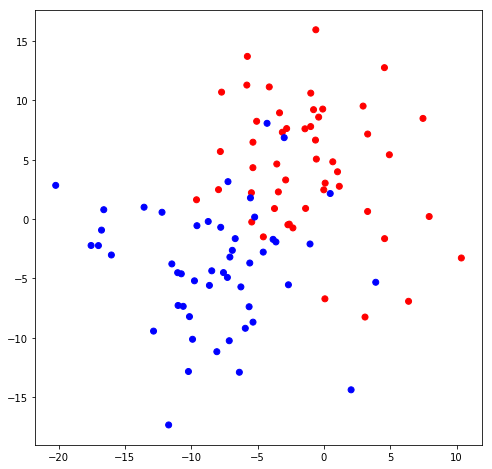

In [4]:
colors = ListedColormap(['red', 'blue'])

pylab.figure(figsize(8, 8))
pylab.scatter([x[0] for x in blobs[0]], [x[1] for x in blobs[0]], c=blobs[1], cmap=colors)

Получили два облака точек, которые немного накладываются друг на друга. С помощью функции train_test_split разобьем данные на обучение и тест. Будем это делать в соотношении: 30 % — тест и 70 % — обучение. 

In [5]:
# разбиваем 30 на 70
train_data, test_data, train_labels, test_labels = model_selection.train_test_split(blobs[0], blobs[1], 
                                                                                    test_size = 0.3,
                                                                                    random_state = 1)

### Линейная классификация

Мы будем строить линейный классификатор под названием ridge_classifier, для начала не будем указывать никаких параметров, воспользуемся моделью по умолчанию (укажем только random_state)

#### RidgeClassifier

In [6]:
#создание объекта - классификатора
ridge_classifier = linear_model.RidgeClassifier(random_state = 1)

Теперь обучим, нужно вызвать метод fit и передать ему в качестве аргументов данные, на которых нужно обучаться, и метки классов. У нас это train_data и train_labels, которые мы сгенерировали ранее. 

In [7]:
#обучение классификатора
ridge_classifier.fit(train_data, train_labels)

RidgeClassifier(alpha=1.0, class_weight=None, copy_X=True, fit_intercept=True,
        max_iter=None, normalize=False, random_state=1, solver='auto',
        tol=0.001)

Теперь мы можем строить наши предсказания. Для этого вызываем метод predict и передаем ему на вход тестовую выборку. Это те данные, которые в обучении не участвовали, и мы можем с помощью них проверить, насколько хорошо наша модель работает на внешних данных. 

In [8]:
#применение обученного классификатора
ridge_predictions = ridge_classifier.predict(test_data)

In [9]:
# покажем правильные (на тестовой выборке) метки и сравним с предсказаниями
print test_labels
print ridge_predictions
# похожи, но есть отличия. Оценим

[0 0 0 1 0 0 0 0 0 1 0 1 0 1 1 1 0 0 0 1 0 0 0 1 1 1 1 0 0 1]
[0 0 0 1 0 1 0 0 0 1 0 1 0 1 1 1 1 0 1 1 1 0 0 1 1 1 1 0 0 1]


In [10]:
# оценка качества модели метрикой качества
# Воспользуемся accuracy — доля правильных ответов на тестовой выборке. 
# Передадим в качестве аргументов метки на тестовой выборке и предсказания. 
metrics.accuracy_score(test_labels, ridge_predictions)

0.8666666666666667

Итак, получаем 0,87. Получается, что в 87 % случаев мы правильно предсказали метку нашего класса. А помимо качества классификации, мы можем смотреть также и на веса перед нашими признаками, которые мы получили в процессе обучения. 

In [11]:
# веса перед первым и перед вторым признаком
ridge_classifier.coef_

array([[-0.0854443 , -0.07273219]])

In [12]:
# коэффициент перед свободным членом # коэффициент перед свободным членом 
ridge_classifier.intercept_ 

array([-0.31250723])

#### LogisticRegression

Следующая модель — логистическая регрессия (LogisticRegression). Cоздадим ее с параметрами по умолчанию

In [13]:
log_regressor = linear_model.LogisticRegression(random_state = 1)

Обучаем модель с помощью метода fit, передаем ей для обучения данные и метки классов, строим предсказания, а теперь заметим, что в случае, когда мы используем логистическую регрессию, мы работаем с вероятностной моделью. 

In [14]:
log_regressor.fit(train_data, train_labels)

C:\Users\User\Anaconda3_5.2.0\envs\Python2.7\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=1, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [15]:
lr_predictions = log_regressor.predict(test_data)

Помимо меток классов, эта модель может выдать нам вероятности, с которыми каждый объект принадлежит первому и нулевому классу. Вот давайте эти вероятности тоже построим. Для этого нужно воспользоваться методом predict_proba (predict probability), а качестве аргумента передаем тестовую выборку и получаем вероятности принадлежности к классам. 

In [16]:
# построим вероятности с которыми объект принадлежит к 1 или второму классу
lr_proba_predictions = log_regressor.predict_proba(test_data)

Тестовые метки не изменились. Обычные предсказания выглядят в виде меток классов. И теперь вероятностное предсказание

In [17]:
print test_labels # тестовые метки

[0 0 0 1 0 0 0 0 0 1 0 1 0 1 1 1 0 0 0 1 0 0 0 1 1 1 1 0 0 1]


In [18]:
print lr_predictions # обычные предсказания в виде меток классов

[0 1 1 1 0 1 0 0 0 1 0 1 0 1 1 1 1 0 1 1 1 0 0 1 1 1 1 0 0 1]


In [19]:
print lr_proba_predictions # вероятностные предсказания

[[0.99873457 0.00126543]
 [0.38956803 0.61043197]
 [0.45000737 0.54999263]
 [0.00536816 0.99463184]
 [0.70965944 0.29034056]
 [0.23304944 0.76695056]
 [0.98983143 0.01016857]
 [0.9709671  0.0290329 ]
 [0.93909394 0.06090606]
 [0.15103335 0.84896665]
 [0.90324667 0.09675333]
 [0.0100448  0.9899552 ]
 [0.82338574 0.17661426]
 [0.05238427 0.94761573]
 [0.00443451 0.99556549]
 [0.00102911 0.99897089]
 [0.20817393 0.79182607]
 [0.91074564 0.08925436]
 [0.22580526 0.77419474]
 [0.00101709 0.99898291]
 [0.09600944 0.90399056]
 [0.99367624 0.00632376]
 [0.9779897  0.0220103 ]
 [0.29889823 0.70110177]
 [0.00210487 0.99789513]
 [0.00929423 0.99070577]
 [0.2670277  0.7329723 ]
 [0.85210662 0.14789338]
 [0.98871444 0.01128556]
 [0.00407572 0.99592428]]


первое — это вероятность принадлежности к классу с меткой 0, второе значение — вероятность принадлежности к классу с меткой 1. Ну и логично, что если каждую пару мы сложим, мы должны получить 1. 
теперь оценим качество нашей модели. Снова сделаем это с помощью метода accuracy_score, посмотрим на аккуратность нашей классификации, или на долю правильных ответов. 

In [20]:
print metrics.accuracy_score(test_labels, lr_predictions)
# Доля правильных ответов составляет 0,8

0.8


In [21]:
# В ridge-классификатор доля правильных ответов была 87 %
print metrics.accuracy_score(test_labels, ridge_predictions)

0.8666666666666667


Научились обучать модели, оценивать их качество по holdout dataset-у и смотреть на полученные веса.  
Теперь ответим на вопрос: является ли полученная оценка устойчивой? Достаточно ли такой оценки для того, чтобы сделать вывод о том, что один алгоритм работает лучше, чем другой? Давайте обучим сразу несколько моделей. Сделать это можно с помощью кросс-валидации. Проанализируем полученные результаты и попытаемся сравнить с нашей моделью. Для того чтобы обучить несколько моделей и посмотреть на полученные оценки, мы можем действовать разными способами. Например, можно взять функцию train_test_split, которую изучили ранее, построить несколько разбиений, обучить на них модели и оценить качество. Таким образом получим целый набор оценок, который в дальнейшем можно будет усреднить, посчитать отклонения и получить некоторую интервальную оценку на качество наших моделей.

### Оценка качества по cross-validation

Для этого cross-validation предоставляет нам функцию cross-val-score для автоматизированного способа. Эта функция принимает несколько аргументов: модель, которую мы хотим оценивать; данные и метки классов; указать, какая метрика нас интересует и каким образом мы хотим делать кросс-валидацию. Для начала простой запуск - передадим классификаторы, которые мы ранее создали. Воспользуемся данными, которые нам также доступны, и укажем, что в качестве метрики мы будем использовать accuracy — долю правильных ответов, в качестве кросс-валидации будем использовать k-fold на 10 fold-ов. Если мы указываем параметр cv = 10, в данном случае мы никак не специфицируем вид кросс-валидации, работает кросс-валидация по умолчанию: это либо k-fold, либо stratified k-fold. Когда мы работаем над задачей бинарной классификации, по умолчанию работает stratified k-fold. В данном случае нас это вполне устраивает. Сначала получим оценку для классификатора ridge-classifier, теперь давайте сделаем то же самое для логистической регрессии.

#### cross_val_score

In [22]:
# принимает модель, данные и метки классов,также какая метрика (scoring)
# интересует и как делать кросс-валидацию cv=10
ridge_scoring = model_selection.cross_val_score(ridge_classifier, blobs[0], blobs[1], scoring = 'accuracy', cv = 10)

In [23]:
lr_scoring = model_selection.cross_val_score(log_regressor, blobs[0], blobs[1], scoring = 'accuracy', cv = 10)

И теперь по полученному скорингу, давайте также выведем его на экран, чтобы посмотреть, как это выглядит. 

In [24]:
# полученный скоринг (список оценки метрики accuracy)
print(ridge_scoring)
print(lr_scoring)

[0.8 0.9 0.9 0.9 1.  1.  0.7 0.9 0.9 0.8]
[0.7 0.9 0.9 0.9 1.  1.  0.7 0.9 0.9 0.8]


На самом деле, это просто список оценок метрики accuracy, то же самое в случае линейной регрессии. Теперь давайте посмотрим на статистики. Ну вот выведем среднее, максимальное и минимальное значение и посчитаем разброс. Сначала для ridge-классификатора, теперь для log-регрессии. 

In [25]:
print 'Ridge mean:{}, max:{}, min:{}, std:{}'.format(ridge_scoring.mean(), ridge_scoring.max(), 
                                                     ridge_scoring.min(), ridge_scoring.std())

Ridge mean:0.88, max:1.0, min:0.7, std:0.0871779788708


In [26]:
print 'Log mean:{}, max:{}, min:{}, std:{}'.format(lr_scoring.mean(), lr_scoring.max(), 
                                                   lr_scoring.min(), lr_scoring.std())

Log mean:0.87, max:1.0, min:0.7, std:0.100498756211


Вот на основании полученного результата мы видим, что на самом деле модель работает приблизительно одинаково. Усложним - допустим хотим считать какую-то нестандартную метрику качества и хотим специфицировать нужную нам стратегию кросс-валидации.

#### cross_val_score с заданными scorer и cv_strategy


Для того чтобы передать свою метрику качества в эту функцию нужно создать объект scorer. Он должен удовлетворять нужному интерфейсу - принимать 3 параметра. Первый — это модель, которую мы оцениваем. Далее — набор меток классов и набор наших предсказаний. Если мы посмотрим на синтаксис функции accuracy_score, то мы поймем, что он не такой. Эта функция не принимает на вход классификатор, она принимает только метки классов и наши предсказания. Для того чтобы создать правильный объект, который можно передать внутрь функции cross_val_score, нам с вами нужно его создать. Это можно делать с помощью функции make_scorer. Передаем ей в качестве аргумента нашу метрику и создаем scorer. Ну в данном случае мы передали ту же самую метрику, потому что она нам просто подходит. 

In [27]:
# Для передачи своей метрики качества в эту функцию, нужно создать объект
scorer = metrics.make_scorer(metrics.accuracy_score)

Теперь специфицируем стратегию кросс-валидации (для примера StratifiedShuffleSplit). Будем делать 20 итераций, доля тестовой выборки 30 %. 

In [28]:
# используем StratifiedShuffleSplit
sss = model_selection.StratifiedShuffleSplit(n_splits = 20 , test_size = 0.3, random_state = 2)
cv_strategy = sss.split(blobs[0], blobs[1])

теперь давайте предадим их внутрь функции cross_val_score и снова оценим наши модели.

In [29]:
ridge_scoring = model_selection.cross_val_score(ridge_classifier, blobs[0], blobs[1], scoring = scorer, cv = cv_strategy)

Итак, сначала scoring для ridge-классификатора, теперь scoring для линейной, для логистической регрессии. Итак, выводим оценки и видим, что снова мы получили очень похожий результат. Понятно, что наша модель работает приблизительно одинаково. 

# ОШИБКА!

In [30]:
cvalscore = model_selection.cross_val_score(blobs[0], blobs[1], scoring = scorer, cv = cv_strategy)
lr_scoring = cvalscore.split(log_regressor)

TypeError: estimator should be an estimator implementing 'fit' method, array([[ 3.10018206e+00, -8.25197296e+00],
       [-5.34382894e+00, -8.68068622e+00],
       [-9.60218584e+00,  1.63192762e+00],
       [-3.94038861e-01,  8.59755136e+00],
       [ 3.90807888e+00, -5.32083982e+00],
       [-5.58747683e+00, -3.69722841e+00],
       [-6.25732838e+00, -5.71225734e+00],
       [-5.63727474e+00, -7.38276756e+00],
       [-7.71296538e+00,  1.07024703e+01],
       [ 1.02728990e+00,  3.99084545e+00],
       [-1.02105378e+01, -1.28400965e+01],
       [-9.89542915e-01,  1.06186514e+01],
       [-1.06051711e+01, -7.34883990e+00],
       [-5.76893052e+00,  1.37149902e+01],
       [ 2.05113601e+00, -1.43833336e+01],
       [-4.57286897e+00, -2.77891209e+00],
       [-8.71899243e+00, -1.99315810e-01],
       [-5.43900976e+00, -2.42141159e-01],
       [-3.55075512e+00,  4.64627258e+00],
       [-1.60197277e+01, -3.02174517e+00],
       [-6.90252647e+00, -2.62929454e+00],
       [-1.14619143e+01, -3.77396854e+00],
       [-8.62931712e+00, -5.58487489e+00],
       [ 9.51551224e-02,  3.03495280e+00],
       [-3.72362713e+00,  8.93472628e-01],
       [-1.17033548e+01, -1.73449562e+01],
       [-7.57020806e+00, -4.50420233e+00],
       [-8.62314619e-03,  2.46911571e+00],
       [ 6.38203375e+00, -6.92428403e+00],
       [-7.13454265e+00, -1.02472262e+01],
       [-3.13294434e+00,  7.32344494e+00],
       [-7.94341000e+00,  2.48510490e+00],
       [-1.28417320e+01, -9.43699610e+00],
       [-2.71465544e+00, -4.75469434e-01],
       [-1.04563336e+00, -2.09428422e+00],
       [-1.10238462e+01, -4.51295085e+00],
       [ 4.93448843e+00,  5.42485017e+00],
       [-1.75498578e+01, -2.21997189e+00],
       [-1.09927742e+01, -7.27491200e+00],
       [-1.07481586e+01, -4.60814658e+00],
       [-8.45405458e+00, -4.35546842e+00],
       [-8.06970962e+00, -1.11709073e+01],
       [-3.43285453e+00,  2.29419092e+00],
       [-1.67630322e+01, -9.25392319e-01],
       [-5.68911445e-01,  5.06103742e+00],
       [-7.08565322e+00, -3.19599189e+00],
       [ 3.29918906e+00,  7.17020873e+00],
       [ 1.03611048e+01, -3.27423998e+00],
       [-7.80476682e+00,  5.69577621e+00],
       [-2.33545615e+00, -7.40242020e-01],
       [-2.88236469e+00,  3.30232049e+00],
       [-6.37293863e+00, -1.29042594e+01],
       [-9.56969630e+00, -5.52257106e-01],
       [-1.22025426e+01,  5.78682354e-01],
       [-9.98685667e-01,  7.80110697e+00],
       [-7.27405022e+00, -4.91421593e+00],
       [-5.06956455e+00,  8.24566606e+00],
       [-2.99205489e+00,  6.86571107e+00],
       [-1.42738430e+00,  7.61197354e+00],
       [ 1.16155411e+00,  2.76697928e+00],
       [-6.33472256e-01,  6.66177393e+00],
       [-1.35557543e+01,  1.00482936e+00],
       [-7.23019603e+00,  3.15939381e+00],
       [-1.01331058e+01, -8.21673745e+00],
       [-2.02166128e+01,  2.84555362e+00],
       [-2.67469838e+00, -5.53354180e+00],
       [-5.80874858e+00,  1.12972647e+01],
       [-1.69967857e+01, -2.22883608e+00],
       [-2.60791505e+00, -4.21731430e-01],
       [ 6.69659041e-01,  4.83186024e+00],
       [-7.77850847e+00, -6.88666670e-01],
       [-5.92465202e+00, -9.19870186e+00],
       [-6.68495646e+00, -1.64179643e+00],
       [ 2.95484887e+00,  9.52755132e+00],
       [ 7.46935207e+00,  8.48773275e+00],
       [ 7.64323039e-02, -6.71561682e+00],
       [-5.21883864e+00,  1.73915472e-01],
       [-9.75753304e+00, -5.19807688e+00],
       [-4.56450454e+00, -1.49483755e+00],
       [-4.11876701e+00,  1.11412822e+01],
       [ 4.56440173e+00,  1.27654824e+01],
       [-1.65936867e+01,  7.95050699e-01],
       [-7.79356024e-01,  9.22541893e+00],
       [ 4.77910392e-01,  2.15746329e+00],
       [-5.46369404e+00,  2.22434547e+00],
       [ 4.57617203e+00, -1.64291210e+00],
       [-6.09524740e-01,  1.59578931e+01],
       [ 3.29514782e+00,  6.45986643e-01],
       [-3.34368198e+00,  8.96035040e+00],
       [-5.35141363e+00,  4.33683457e+00],
       [-3.61585037e+00, -1.92113861e+00],
       [-1.38011725e+00,  9.03013813e-01],
       [-2.80847819e+00,  7.63291742e+00],
       [-5.34820248e+00,  6.48309069e+00],
       [-3.82991511e+00, -1.70439559e+00],
       [-4.28417719e+00,  8.07503951e+00],
       [-9.90196076e+00, -1.01244516e+01],
       [-8.88296171e-02,  9.27476627e+00],
       [-5.53747830e+00,  1.79108297e+00],
       [ 7.93690480e+00,  2.19851914e-01]]) was passed

In [31]:
print 'Ridge mean:{}, max:{}, min:{}, std:{}'.format(ridge_scoring.mean(), ridge_scoring.max(), 
                                                     ridge_scoring.min(), ridge_scoring.std())

Ridge mean:0.87, max:1.0, min:0.766666666667, std:0.0595352369983


In [32]:
print 'Log mean:{}, max:{}, min:{}, std:{}'.format(lr_scoring.mean(), lr_scoring.max(), 
                                                   lr_scoring.min(), lr_scoring.std())

Log mean:0.87, max:1.0, min:0.7, std:0.100498756211


На этом мы заканчиваем. Мы научились строить линейные модели ridge_classifier и log_regression, а также научились оценивать их качество в отдельной точке и с помощью кросс-валидации. Для этого мы использовали функцию cross_val_score. На следующем уроке мы продолжим работать с модулем linear_model и научимся строить еще несколько моделей.

# Week 2 - 4. sklearn.ipynb.linear_model_part2
# Sklearn

## sklearn.linear_model

In [1]:
from matplotlib.colors import ListedColormap
from sklearn import model_selection, datasets, linear_model, metrics

import numpy as np

In [2]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


### Линейная регрессия
Будем строить модели регрессии.
#### Генерация данных

Так как мы решаем задачу регрессии - функция make_regression. Будем строить dataset с двумя признаками: один из них будет информативным, другой будет избыточным. Также добавим некоторый шум. Еще один параметр coef = True, чтобы посмотреть на уравнение функции, которую приближаем. То есть вернутся не только данные и метки, но и уравнение. 

In [3]:
data, target, coef = datasets.make_regression(n_features = 2, n_informative = 1, n_targets = 1, 
                                              noise = 5., coef = True, random_state = 2)
# coef = True для просмотра уравнения функции, которую приближаем

Отрисуем dataset. Не сможем действовать аналогично тому, как делали в задаче классификации, потому что в данном случае нет меток классов и мы не сможем отрисовать их разным цветом. Мы приближаем некоторую функцию. Тогда мы можем поступить другим образом — мы можем построить некоторую зависимость между нашими признаками и целевой меткой. Например, мы можем отобразить объекты в плоскости «признаки–метки», таким образом мы сможем понять, есть ли какая-то зависимость между значением признаков и значением целевой метки. Сначала мы построим объекты в плоскости «нулевой признак–целевая метка», отрисуем их красным цветом, а потом мы построим те же самые объекты в плоскости «первый признак–метка» и отрисуем их синим цветом. Так как пространство значения признаков совпадает, мы можем сделать это на одной плоскости, на одном графике. 

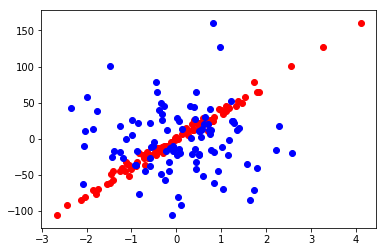

In [4]:
# Здесь не как в задаче классификации, потому что нет меток классов и 
# их нельзя отрисовать разным цветом. Мы приближаем некоторую функцию. 
# Тогда можно построить некоторую зависимость между признаками и целевой
# меткой. Например, отобразить объекты в плоскости «признаки–метки»,
# и понять, есть ли какая-то зависимость между значением признаков 
# и значением целевой метки.  Сначала построим объекты в плоскости
# «нулевой признак–целевая метка» (красный), а потом строим те же
# объекты в плоскости «первый признак–метка» (синий). Так как пространство
# значения признаков у нас совпадает, можно сделать это на одной плоскости, 
# на одном графике.
pylab.scatter(map(lambda x:x[0], data), target, color = 'r')
pylab.scatter(map(lambda x:x[1], data), target, color = 'b')
# первый признак информативен, а второй избыточный

По этому графику легко проанализировать, какой из двух признаков является информативным. Нулевой признак отображен точками красного цвета. В основном с увеличением значения признака растет target (зависимость между этим признаком и целевой переменной есть). Посмотрим на синие точки (второй признак). Изменение этого признака, например его рост, не всегда означает рост целевой функции, есть некоторые случайные изменения. Этот признак не настолько информативен. Построим модель и посмотрим на коэффициенты между этими признаками. Ожидаем больший коэффициент (абсолютную величину) перед информативным признаком и меньший коэффициент перед избыточным признаком. Для того чтобы построить модель и оценить ее качество, разобьем данные на обучение и тест и постром модель.

In [5]:
train_data, test_data, train_labels, test_labels = model_selection.train_test_split(data, target, test_size = 0.3)

#### LinearRegression

Воспользуемся классификатором linear_regression, обучим его на train_data и train_labels и получим наши predictions с помощью метода predict. 

In [6]:
linear_regressor = linear_model.LinearRegression()
linear_regressor.fit(train_data, train_labels)
predictions = linear_regressor.predict(test_data)

In [7]:
# Посмотрим на исходные значения функции и на то как мы ее приблизили. 
print test_labels
print predictions

[ 17.64282734  45.05465366  12.47089016 -40.84204295  20.87713077
  41.95683853  12.74038341 -16.30914909  44.41658249 -26.87743177
 -35.32062686 -21.48288019 -22.32195021  22.13032804  64.19559505
  19.66406455  10.33267887   1.72644759 -71.3715844  -16.65927231
 -32.92158843  11.96165156 -61.47026695 -12.98848753 -52.37232463
 -13.99339669  11.06961035 -16.85466265 -22.33224966  58.26281761]
[ 20.95092294  42.66718966  19.84343344 -47.35530799  13.47730613
  44.7288146    7.87072987 -12.42527373  44.37395091 -28.10702549
 -42.63827304 -24.80633789 -23.20475724  20.35947667  70.32961243
  26.46315246   8.93911683  -0.35837853 -72.26596727 -14.45354508
 -34.20883069  13.71133016 -57.44758279 -16.53639339 -41.21610688
 -15.0725862   26.3138373  -15.99171146 -29.18590254  58.54100304]


Для оценки, насколько у нас хорошо получилось введем метрику - среднее отклонение приближения от исходного значения функции

In [8]:
metrics.mean_absolute_error(test_labels, predictions)

3.9555741074966315

In [9]:
print metrics.SCORERS.keys()

['precision_samples', 'f1_weighted', 'balanced_accuracy', 'f1_samples', 'f1', 'adjusted_mutual_info_score', 'precision', 'normalized_mutual_info_score', 'neg_mean_squared_error', 'precision_micro', 'neg_mean_squared_log_error', 'recall_samples', 'homogeneity_score', 'precision_weighted', 'fowlkes_mallows_score', 'average_precision', 'roc_auc', 'adjusted_rand_score', 'recall_macro', 'v_measure_score', 'completeness_score', 'r2', 'recall_weighted', 'recall', 'precision_macro', 'neg_log_loss', 'neg_mean_absolute_error', 'mutual_info_score', 'f1_macro', 'f1_micro', 'brier_score_loss', 'recall_micro', 'neg_median_absolute_error', 'explained_variance', 'accuracy']


Видим, что в среднем мы ошибаемся на 4,2 (у меня 3,8). Сделаем оценку чуть более точной - воспользуемся функцией cross_val_score. Передадим в регрессор данные, целевую переменную. Зададим метрику mean_absolute_error (метрика, которой мы только что воспользовались) и будем делать кросс-валидацию k-fold на 10 фолдов. Сразу же после этого выпишем среднее и отклонение по нашей метрике. 

In [10]:
linear_scoring = model_selection.cross_val_score(linear_regressor, data, target, scoring = 'neg_mean_absolute_error', 
                                                  cv = 10)
print 'mean: {}, std: {}'.format(linear_scoring.mean(), linear_scoring.std())
# scoring был mean_absolute_error

mean: -4.07007149878, std: 1.07371044929


В среднем ошибка равна 4 с отклонением 1. Должен смутить знак «минус» перед средним. Так как оцениваем метрику «среднее абсолютное отклонение» она должна быть неотрицательной. А здесь минус, потому что функция cross_val_score часто используется для подбора параметров алгоритма. В данном случае в качества scoring мы передаем метрику, которая не растет, когда модель становится лучше, а которая уменьшается, когда модель становится лучше. А так как при подборе параметров часто используется максимизация нашей метрики, то нам просто удобно иногда умножить нашу метрику на (−1) и дальше ее точно так же максимизировать. А так как функция cross_val_score понимает, что функция mean_absolute_error растет, когда модель ухудшается, то нам действительно просто умножить эту функцию на (−1). В данном случае подбор параметров не делаем, ничего не оптимизируем, поэтому это неудобно. Чтобы от такого избавиться можно создать свой собственный scorer. Создадим scorer с помощью функции make_scorer и скажем, что для нашей метрики greater_is_better, то есть значение, когда наша метрика растет, это лучше. Естественно, это не так, но с помощью такого параметра избавимся от искусственного умножения на (−1). 

In [11]:
scorer = metrics.make_scorer(metrics.mean_absolute_error, greater_is_better = True)

In [12]:
# избавимся от - 
linear_scoring = model_selection.cross_val_score(linear_regressor, data, target, scoring=scorer, 
                                                  cv = 10)
print 'mean: {}, std: {}'.format(linear_scoring.mean(), linear_scoring.std())

mean: 4.07007149878, std: 1.07371044929


Получили неотрицательное значение метрики. Теперь посмотрим на коэффициенты нашей исходной функции. Мы их получили в самом начале, когда генерировали данные. Выведем эти коэффициенты. 

In [13]:
# посмотрим коэффициенты исходной функции
coef
# у информативного 38 а у избыточного 0

array([38.07925837,  0.        ])

Коэффициент перед первым признаком равен 38 (это информативный признак) и перед вторым признаком признаком равен 0 (это избыточный признак). Теперь посмотрим, какие коэффициенты подобрала модель. 

In [14]:
# коэффициенты модели получились близко
linear_regressor.coef_
# Ответ близок к исходному.

array([38.51747335,  0.03946668])

In [15]:
# в лекции не указано, что в уравнении обученной модели также участвует свободный член
linear_regressor.intercept_

-0.38015937837895963

In [16]:
# Запишем  в виде уравнения, чтобы было более наглядно. 
print "y = {:.2f}*x1 + {:.2f}*x2".format(coef[0], coef[1])
# Уравнение нашей исходной функции (y — это и есть target)

y = 38.08*x1 + 0.00*x2


In [17]:
# и уравнение той функции, которую мы с вами обучили, которую мы с вами построили.
print "y = {:.2f}*x1 + {:.2f}*x2 + {:.2f}".format(linear_regressor.coef_[0], 
                                                  linear_regressor.coef_[1], 
                                                  linear_regressor.intercept_)
# Они достаточно близки. 

y = 38.52*x1 + 0.04*x2 + -0.38


#### Lasso
другой метод регрессии, позволяет отсеить лишние признаки

Теперь попробуем решить ту же задачу с помощью регрессии, но с использованием регуляризации lasso (L1-регуляризации). Построим модель, обучим ее на обучающих данных и и построим приближение. Делаем это с помощью функций fit и predict так же, как и раньше. 

In [18]:
lasso_regressor = linear_model.Lasso(random_state = 3)
lasso_regressor.fit(train_data, train_labels)
lasso_predictions = lasso_regressor.predict(test_data)

Оценим качество модели по кросс-валидации. Используем тот же самый scorer, чтобы получить неотрицательное значение метрики. 

In [19]:
lasso_scoring = model_selection.cross_val_score(lasso_regressor, data, target, scoring = scorer, cv = 10)
print 'mean: {}, std: {}'.format(lasso_scoring.mean(), lasso_scoring.std())

mean: 4.15447824667, std: 1.0170354385


Качество стало немного хуже, это не значимо, но средняя ошибка немного больше. 

In [20]:
print lasso_regressor.coef_

[37.84275247  0.        ]


In [21]:
# выведем исходное уравнение
print "y = {:.2f}*x1 + {:.2f}*x2".format(coef[0], coef[1])

y = 38.08*x1 + 0.00*x2


In [22]:
# выведем уравнение, которое получили с помощью лассо-регрессии.
print "y = {:.2f}*x1 + {:.2f}*x2".format(lasso_regressor.coef_[0], lasso_regressor.coef_[1])

y = 37.84*x1 + 0.00*x2


В данном случае перед неинформативным признаком мы получили 0. Здесь мы видим результат применения L1-регуляризации. Мы видим, что у нас как будто бы произошел отбор признаков. Перед избыточным признаком мы получили вес 0. Таким образом, теперь вы знаете, что если в вашей задаче много избыточных признаков и вы хотите заняться отбором признаков, то есть вы хотите получить перед ними не просто маленькие веса, а действительно получить нули и отфильтровать такие признаки, то лассо-регуляризация очень хорошо подходит для этой задачи.  
А мы с вами на этом заканчиваем. На этом видеоуроке мы научились строить линейную регрессию и лассо-регрессию, а в следующем уроке мы поговорим про метрики качества для оценки задач классификации и регрессии.

# Week 2 - 5. sklearn.metrics
# Sklearn

## sklearn.metrics

научимся оценивать качество моделей классификации и регрессии с помощью метрик из модуля sklearn.metrics. Этот модуль предоставляет готовую реализацию большинства метрик, использующихся в задачах классификации и регрессии. По приведенной ссылке вы можете ознакомиться с полным набором доступных метрик: http://scikit-learn.org/stable/modules/classes.html#module-sklearn.metrics

In [1]:
from sklearn import model_selection, datasets, linear_model, metrics 
from matplotlib.colors import ListedColormap

In [2]:
%pylab inline

The history saving thread hit an unexpected error (OperationalError('database is locked',)).History will not be written to the database.
Populating the interactive namespace from numpy and matplotlib


### Генерация датасетов

Так как мы будем решать сразу две задачи — классификация и регрессия, нам потребуются два набора данных. Для этого воспользуемся функциями: make_classification и make_regression.В обоих случаях мы сгенерировали датасеты, состоящие из двух признаков. Нам все еще хочется их визуализировать, поэтому нам это удобно. Однако когда мы решаем задачу классификации, мы будем строить датасет, в котором оба признака являются информативными, а для задачи регрессии мы будем использовать датасет, в котором информативным является только один признак. 

In [3]:
clf_data, clf_target = datasets.make_classification(n_features = 2, n_informative = 2, n_classes = 2, 
                                                    n_redundant = 0, n_clusters_per_class = 1, 
                                                    random_state = 7)
# два информативных признака

In [4]:
reg_data, reg_target = datasets.make_regression(n_features = 2, n_informative = 1, n_targets = 1, 
                                                noise = 5., random_state = 7)
# один информативный признак

Отрисуем наборы данных. Начнем с данных для классификации. 

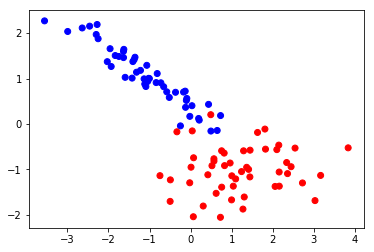

In [5]:
colors = ListedColormap(['red', 'blue'])
pylab.scatter(map(lambda x: x[0], clf_data), map(lambda x: x[1], clf_data), c = clf_target, cmap = colors)

Красным и синим цветом обозначены объекты двух разных классов. Теперь отрисуем данные для задачи регрессии. В данном случае строим объекты в координатах признак– целевая функция, то есть красным цветом обозначены объекты, построенные в координатах — давайте посмотрим — первый признак–target, синим цветом объекты построены... те же самые объекты построены в координатах нулевой признак–target. Мы вот видим, что первый признак является информативным, нулевой — шумовой. 

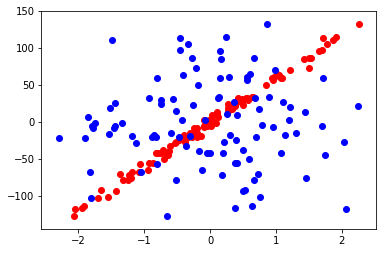

In [6]:
pylab.scatter(map(lambda x:x[1], reg_data), reg_target, color = 'r')
pylab.scatter(map(lambda x:x[0], reg_data), reg_target, color = 'b')

Итак, теперь данные мы сгенерировали, нам остается разбить их на обучение и тест. Сделаем это с помощью функции train_test_split. И теперь можно обучать модели. 

In [7]:
# разбиваем на обучение и тест
clf_train_data, clf_test_data, clf_train_labels, clf_test_labels = model_selection.train_test_split(clf_data, clf_target,
                                                                                     test_size = 0.3, random_state = 1)
reg_train_data, reg_test_data, reg_train_labels, reg_test_labels = model_selection.train_test_split(reg_data, reg_target,
                                                                                     test_size = 0.3, random_state = 1)

### Метрики качества в задачах классификации

В качестве модели классификаций SGDClassifier — это линейная классификация, работающая на основе стохастического градиентого спуска. В качестве функции потерь log loss —  чтобы классификатор получился вероятностным. Для некоторых метрик мы захотим использовать вероятности принадлежности объектов к нашим классам, поэтому нам нужен вероятностный классификатор. 

#### Обучение модели классификации

In [8]:
# SGDClassifier в качестве модели классификации
# на основе стохастического градиентного спуска
# loss = 'log' функция потерь, чтобы классификатор 
# получился вероятностным
classifier = linear_model.SGDClassifier(loss = 'log', random_state = 1, max_iter = 5)

In [9]:
# Теперь обучим классификатор — это делается с помощью метода fit.
classifier.fit(clf_train_data, clf_train_labels)

C:\Users\User\Anaconda3_5.2.0\envs\Python2.7\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:183: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If max_iter is set but tol is left unset, the default value for tol in 0.19 and 0.20 will be None (which is equivalent to -infinity, so it has no effect) but will change in 0.21 to 1e-3. Specify tol to silence this warning.
  FutureWarning)


SGDClassifier(alpha=0.0001, average=False, class_weight=None,
       early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
       l1_ratio=0.15, learning_rate='optimal', loss='log', max_iter=5,
       n_iter=None, n_iter_no_change=5, n_jobs=None, penalty='l2',
       power_t=0.5, random_state=1, shuffle=True, tol=None,
       validation_fraction=0.1, verbose=0, warm_start=False)

In [10]:
# сгенерируем предсказания в виде меток классов, метод predict
predictions = classifier.predict(clf_test_data)

In [11]:
# сгенерируем предсказание в виде вероятности принадлежности объекта 
# к нулевому и первому классу - метод predict_proba
# на вход передаем наши тестовые данные
probability_predictions = classifier.predict_proba(clf_test_data)
# Теперь выведем все это на экран.

In [12]:
# правильные метки
print clf_test_labels

[1 0 0 1 0 1 1 0 1 0 0 0 1 1 0 0 1 0 0 1 0 0 0 0 0 0 1 1 1 0]


In [13]:
# предсказания в виде меток
print predictions

[1 0 0 1 0 1 1 0 1 0 0 1 1 1 0 0 1 0 0 1 0 0 0 0 0 0 1 1 1 0]


Видно, что ошибаемся в нескольких местах. Теперь — предсказания в виде вероятности принадлежности к обоим классам. Первое значение — это вероятность принадлежать к нулевому классу, второе значение — вероятность принадлежать к первому классу.

In [14]:
print probability_predictions

[[0.00000000e+00 1.00000000e+00]
 [9.99999993e-01 6.61556341e-09]
 [9.99988143e-01 1.18567026e-05]
 [0.00000000e+00 1.00000000e+00]
 [1.00000000e+00 4.62314295e-15]
 [3.03803294e-09 9.99999997e-01]
 [0.00000000e+00 1.00000000e+00]
 [1.00000000e+00 5.05766731e-13]
 [0.00000000e+00 1.00000000e+00]
 [9.99999999e-01 5.18878464e-10]
 [9.99999241e-01 7.58783839e-07]
 [2.70446065e-04 9.99729554e-01]
 [0.00000000e+00 1.00000000e+00]
 [4.89202012e-11 1.00000000e+00]
 [1.00000000e+00 8.62325525e-11]
 [9.97365075e-01 2.63492515e-03]
 [0.00000000e+00 1.00000000e+00]
 [1.00000000e+00 1.30597714e-15]
 [1.00000000e+00 3.28425090e-15]
 [1.83630888e-13 1.00000000e+00]
 [9.99999999e-01 5.19307103e-10]
 [9.99999639e-01 3.60586359e-07]
 [8.85166610e-01 1.14833390e-01]
 [1.00000000e+00 7.21139609e-14]
 [9.99999415e-01 5.85346707e-07]
 [9.86697401e-01 1.33025990e-02]
 [4.76887024e-02 9.52311298e-01]
 [1.22124533e-14 1.00000000e+00]
 [1.29348512e-03 9.98706515e-01]
 [1.00000000e+00 1.37248174e-13]]


теперь можем непосредственно заняться расчетом метрик.

#### accuracy
доля правильных ответов 

Первая метрика — accuracy, она соответствует доле правильно классифицированных объектов. Ее реализацию напишем самостоятельно — достаточно просто сравнить правильную метку и метку, которую мы предсказываем. Дальше посчитаем, в скольких случаях мы предсказываем метку правильно, и поделим это на объем данных. 

In [15]:
# Сделаем ручками
# print (zip(clf_test_labels, predictions))
# zip(clf_test_labels, predictions) - делает список из кортежей
# одно число значение теста, второе прогноз, чтобы узнать число
# ошибок
sum([1. if pair[0] == pair[1] else 0. for pair in zip(clf_test_labels, predictions)])/len(clf_test_labels)

0.9666666666666667

Мы получаем вот такую оценку — 0,83 (0,97). Воспользуемся готовой реализацией accuracy — функция accuracy_score. В качестве аргументов передаем предсказанные нашим классификатором метки и правильные метки. Оценки совпали. 

In [16]:
# Вопспользуемся встроенной командой
metrics.accuracy_score(clf_test_labels, predictions)

0.9666666666666667

#### confusion matrix

Следующий объект, про который хочется рассказать — это confusion matrix. Это матрица, размером количество классов на количество классов. В позиции i и j у нас стоит элемент, который характеризует количество объектов, которые изначально имели метку i, но мы им поставили метку j. Таким образом, на диагонали — элементы, характеризующие объекты, на которых  ответили правильно, вне диагонали у нас — элементы, характеризующие количество объектов, на которых ошиблись. Она строится с помощью метода confusion_matrix. На вход передаем правильные метки классов и предсказанные метки. 

In [17]:
# метод confusion_matrix
matrix = metrics.confusion_matrix(clf_test_labels, predictions)
print matrix
matrix.diagonal().sum() # сумма значений по диагонали

[[17  1]
 [ 0 12]]


29

Вот мы с вами видим, что довольно неплохо мы отработали. На диагонали видим значения 12 и 13, то есть, ну, мы ошибаемся не так часто. Теперь давайте проверим, так ли это. Мы можем снова просуммировать объекты, на которых наша метка совпадает с предсказанной — это делается довольно просто. 

In [18]:
# делаем ручками
sum([1 if pair[0] == pair[1] else 0 for pair in zip(clf_test_labels, predictions)])

29

Получили 25 объектов. Теперь если мы сложим диагональные объекты на нашей матрице, мы тоже получили 25. Таким образом, понятно, что если сложить диагональные элементы, мы найдем количество объектов, на которых мы ответили правильно.

На основе этой матрицы расчитываются точность, полнота, f-меры
#### precision (точность классификации) 
Можем отдельно рассчитать точность отнесения к каждому из двух классов

 Для начала оценим точность классификации. Так как решаем задачу бинарной классификации, можем отдельно оценить точность при отнесении объектов к нулевому классу и точность при отнесении объектов к первому классу. Для того чтобы оценить точность классификации к нулевому классу, нужно вызвать функцию precision_score, передать ей правильные метки классов, передать предсказанные метки классов. И так как по умолчанию label равен 1, то нужно явно сказать, что в данном случае оцениваем точность классификации к нулевому классу. Для этого используем аргумент pos_label и говорим, что он равен 0. 

In [19]:
# метод precision_score
# Найдем точность классификации к нулевому классу
metrics.precision_score(clf_test_labels, predictions, pos_label = 0)
# pos_label = 0, т.к. по умолчанию он 1, а нужен нулевой класс

1.0

Итак, видим, что мы получили 0,8. Теперь давайте оценим точность классификации объектов к первому классу. 

In [20]:
# Найдем точность классификации к первому классу
metrics.precision_score(clf_test_labels, predictions)

0.9230769230769231

Мы получили 0,87. Ну, по нашей матрице понятно, почему точность при классификации к первому классу получилась больше. 

#### recall (полнота)
по аналогии с точностью классификации

Теперь оценим полноту с помощью метода recall_score, а аргументы такие же.

In [21]:
# Сначала оцениваем полноту для нулевого класса, получаем 0,86.
metrics.recall_score(clf_test_labels, predictions, pos_label = 0)

0.9444444444444444

In [22]:
# И теперь  посмотрим на первый класс — 0,81
metrics.recall_score(clf_test_labels, predictions)

1.0

Имея точность и полноту легко получить оценки для f-меры
#### f1

 Давайте сначала оценим f-меру для нулевого класса, и теперь — для первого. Наши оценки готовы. 

In [23]:
metrics.f1_score(clf_test_labels, predictions, pos_label = 0)

0.9714285714285714

In [24]:
metrics.f1_score(clf_test_labels, predictions)

0.9600000000000001

#### classification report
объединяет эти три метрики в одну

Часто, когда мы решаем задачу классификации, интересно смотреть на все эти метрики: на precision, recall, f-меру. Причем интересны как значения в разрезе классов, так и значения в среднем. Для того чтобы получить такую мини-сводку по нашей модели, можно использовать функцию под названием classification_report. Для ее работы достаточно передать ей метки класса и предсказанные метки класса. 

In [25]:
print metrics.classification_report(clf_test_labels, predictions)

              precision    recall  f1-score   support

           0       1.00      0.94      0.97        18
           1       0.92      1.00      0.96        12

   micro avg       0.97      0.97      0.97        30
   macro avg       0.96      0.97      0.97        30
weighted avg       0.97      0.97      0.97        30



Видим качество модели в разрезе классов, видим precision, recall, f-score. Также видим, сколько изначально объектов было разных классов, и видим некоторые усреднения внизу.

#### ROC curve
Для построения сначала сортируем объекты по предсказанной величине, потом делим на несколько групп по некоторым пороговым отсечениям и внутри каждой группы оцениваем True Positive Rate и False Positive Rate (получаем их списки). Затем строим кривую в этих координатах
мы можем передать в качестве аргументов как предсказания в виде меток, так и предсказания в виде вероятностей.

Следующая метрика это ROC-curve и ROC — AUC. Для построения ROC-curve сначала сортируем объекты по предсказанной величине, потом делим их на несколько групп по некоторым пороговым отсечениям и внутри каждой группы оцениваем True Positive Rate и False Positive Rate. Далее, когда таким образом получаем списки True Positive Rate и False Positive Rate, можем построить ROC-кривую. Просто строим кривую в этих координатах. Для того чтобы получить списки False Positive Rate, True Positive Rate и thresholds, нам вызвать функцию roc_curve. На вход: правильные метки классов и наши ответы на этих классах. Нам интересней в данном случае воспользоваться вероятностными ответами, потому что здесь у нас задан более точный порядок. Поэтому передадим в качестве второго аргумента probability_predictions — вероятностные предсказания. Будем использовать вероятности отнесения объектов к первому классу, поэтому вот говорим, что берем все объекты, и так как там список из двух элементов, берем элемент с индексом 1 — это вероятность принадлежать к первому классу. 

In [26]:
# для всего этого используем функцию roc_curve, она принимает правильные
# метки классов и наши ответы на этих классах, воспользуемся вероятностными
# ответами, так как здесь задан более четкий порядок(?)
# второй аргумент probability_predictions вероятностные предсказания, 
# задаем 1 так как это вероятность принадлежать к первому классу
fpr, tpr, _ = metrics.roc_curve(clf_test_labels, probability_predictions[:,1])
# fpr, tpr, _ - третий аргумент это трэшхолды а они нам не нужны сейчас

Запускаем функцию, получили три аргумента. False Positive Rates и True Positive Rates нам нужны непосредственно для построения ROC-кривой, а трешхолды для построения ROC-кривой не нужны, поэтому давайте будем здесь использовать нижнее подчеркивание, явно говоря о том, что это возвращаемое значение мы использовать не собираемся. Теперь есть все данные для построения ROC-кривой. Построим ее с помощью метода plot. Передаем в качестве x-координат False Positive Rates, в качестве y-координат — True Positive Rate, и назовем кривую linear model, линейная модель. Теперь давайте для сравнения построим ROC-кривую, соответствующую случайной классификации, — это просто диагональная прямая, назовем ее random. Создадим границы для оси x и оси y с помощью xlim и ylim.

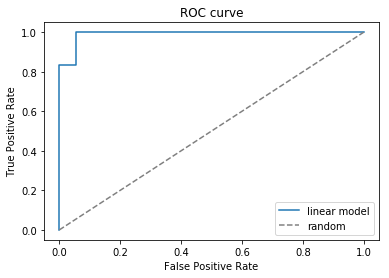

In [27]:
pylab.plot(fpr, tpr, label = 'linear model')
pylab.plot([0, 1], [0, 1], '--', color = 'grey', label = 'random')
pylab.xlim([-0.05, 1.05])
pylab.ylim([-0.05, 1.05])
pylab.xlabel('False Positive Rate')
pylab.ylabel('True Positive Rate')
pylab.title('ROC curve')
pylab.legend(loc = "lower right")

#### ROC AUC (Площадь под кривой ROC)
мы можем передать в качестве аргументов как предсказания в виде меток, так и предсказания в виде вероятностей. Хочется понять, получатся ли они одинаковые или разные, они должны быть близки — ведь это классификация с помощью одной и той же модели. Но когда имеем дело с метками, то в этом случае порядок следования объектов несколько более свободный, те объекты, которые имеют одинаковую метку, могут идти в произвольном порядке. Когда работаем с вероятностной классификацией, порядок задан более строго.

Теперь, для того чтобы количественно оценить качество модели, нужно посчитать площадь под ROC-кривой (ROC — AUC) с помощью метода roc_auc_score. Снова можем передать в качестве аргументов как предсказания в виде меток, так и предсказания в виде вероятностей. Хочется понять, получатся ли они одинаковые или разные, но интуитивно кажется, что они должны быть близки — действительно, это же классификация с помощью одной и той же модели. Когда имеем дело с метками, то в этом случае порядок следования объектов более свободный, то есть объекты, которые имеют одинаковую метку, могут идти в произвольном порядке. Когда работаем с вероятностной классификацией, порядок задан более строго. Вот давайте сравним AUC в обоих случаях. Запускаем и видим, что, действительно, он у нас значительно отличается. Ну такое бывает из-за того, что в первом случае у нас действительно объекты могут в рамках группы идти в произвольном порядке. Это нормально. 

In [28]:
metrics.roc_auc_score(clf_test_labels, predictions)

0.9722222222222222

In [29]:
metrics.roc_auc_score(clf_test_labels, probability_predictions[:,1])
# Они отличаются изза этог порядка, но это нормально

0.9907407407407407

#### PR AUC =  Precision AUC (average_precision_score)

Еще одна метрика - average_precision_score (presicion AUC), функция average_precision_score. Передаем ей правильные метки и предсказания. 

In [30]:
metrics.average_precision_score(clf_test_labels, predictions)

0.9230769230769231

#### log_loss (логистические потери)


И для оценки вероятностных классификаторов часто используется метрика log_loss (логистические потери). Не можем передать ей метки класса, а должны передать вероятности принадлежности к первому классу 

In [31]:
# Тут нужно передавать вероятности принадлежности к первому классу
metrics.log_loss(clf_test_labels, probability_predictions[:,1])

0.2801206244766808

Видим, что log_loss довольно небольшой — 1,3 — очень неплохая оценка, но чем меньше тем лучше. В идеальном случае 0. 

### Метрики качества в задачах регрессии

#### Обучение регрессионной модели 

Перейдем к решению задачи регрессии - построим регрессор. Воспользуемся SGD-регрессором — метод регрессии, основанный на стохастическом градиентном спуске. 

In [32]:
regressor = linear_model.SGDRegressor(random_state = 1, n_iter = 20)

In [33]:
# Обучаем модель
regressor.fit(reg_train_data, reg_train_labels)
# Строим предсказания
reg_predictions = regressor.predict(reg_test_data)

C:\Users\User\Anaconda3_5.2.0\envs\Python2.7\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:152: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)


In [34]:
print reg_test_labels # Правильные значения
print reg_predictions # предсказанные значения

[   2.67799047    7.06525927  -56.43389936   10.08001896  -22.46817716
  -19.27471232   59.44372825  -21.60494574   32.54682713  -41.89798772
  -18.16390935   32.75688783   31.04095773    2.39589626   -5.04783924
  -70.20925097   86.69034305   18.50402992   32.31573461 -101.81138022
   15.14628858   29.49813932   97.282674     25.88034991  -41.63332253
  -92.11198201   86.7177122     2.13250832  -20.24967575  -27.32511755]
[ -1.46503565   5.75776789 -50.13234306   5.05646094 -24.09370893
  -8.34831546  61.77254998 -21.98350565  30.65112022 -39.25972497
 -17.19337022  30.94178225  26.98820076  -6.08321732  -3.46551
 -78.9843398   84.80190097  14.80638314  22.91302375 -89.63572717
  14.5954632   31.64431951  95.81031534  21.5037679  -43.1101736
 -95.06972123  86.70086546   0.47837761 -16.44594704 -22.72581879]


Они совпадают не везде, оценим совпадение
#### mean absolute error (средняя ошибка предсказаний)

Первая метрика — это mean absolute error, средняя ошибка предсказаний, ей уже пользовались, когда строили модель регрессии

In [35]:
# Передаем предсказания, истинные значения и считаем
metrics.mean_absolute_error(reg_test_labels, reg_predictions)
# Видим, что в среднем мы ошибаемся на 3,7. 

3.748761311885298

#### mean squared error (MSE - среднеквадр отклонение)
Помимо абсолютных отклонений можно посчитать MSE-метрику, или mean squared error — это среднеквадратичное отклонение.

In [36]:
metrics.mean_squared_error(reg_test_labels, reg_predictions)
# Видим, что среднеквадратичное отклонение равно 24. 

24.114925597460914

#### root mean squared error (корень из среднеквадратичного отклонения)
Часто вместо среднеквадратичного отклонения используют корень из среднеквадратичного отклонения. 

In [37]:
sqrt(metrics.mean_squared_error(reg_test_labels, reg_predictions))
# Получаем оценку 4,9.

4.91069502183356

#### r2 score (коэффициент детерминации)

Последняя метрика — это коэффициент детерминации (r2 score). Нужно вызвать функцию r2_score и передать ей на вход  предсказания и правильные значения функции

In [38]:
metrics.r2_score(reg_test_labels, reg_predictions)

0.989317615054695

И видим, что значение довольно высокое — 0,99. Итак, давайте подведем итог. Мы рассмотрели целый ряд метрик для оценки моделей классификации и регрессии. На этом мы заканчиваем этот урок и заканчиваем знакомство с библиотекой sklearn. За модуль мы научились генерировать модельные данные, научились строить разбиение данных с помощью кросс-валидации. Также мы научились обучать линейные модели и оценивать их качество. Конечно, в библиотеке sklearn есть еще много интересных функциональностей, и мы обязательно вернемся к ее изучению чуть позже. А в следующем модуле вы продолжите изучать линейные модели.

# Week 3 - 1. sklearn.grid_search
# Sklearn

В этом модуле мы продолжим изучать возможности библиотеки sklearn. Напомню, что ранее мы уже успели обучить несколько линейных моделей, но практически всегда мы использовали параметры, заданные по умолчанию. Настало время это исправить и ответить на вопрос: как же параметры модели влияют на ее качество? И каким образом можно подбирать параметры, оптимальные для решаемой задачи? В этом видео мы будем рассматривать модуль grid_search в библиотеке sklearn и научимся подбирать параметры модели по сетке. Для начала давайте импортируем необходимые модули. И снова здесь только модуль grid_search, который мы будем рассматривать. 

## sklearn.grid_search

документация: http://scikit-learn.org/stable/modules/grid_search.html

In [1]:
from sklearn import model_selection, datasets, linear_model, metrics

import numpy as np
import pandas as pd

### Генерация датасета

In [2]:
# И теперь сгенерируем данные. Воспользуемся датасетом «ирисы Фишера»
# разобьем его на обучение и тест с помощью функции train_test_split. 
iris = datasets.load_iris()
# Разбиваем на обучение и тест
train_data, test_data, train_labels, test_labels = model_selection.train_test_split(iris.data, iris.target, 
                                                                                     test_size = 0.3,random_state = 0)

### Задание модели

Выберем модель — пусть это будет SGD-классификатор — и создадим объект с параметрами по умолчанию. Теперь можно подбирать параметры. 

In [4]:
classifier = linear_model.SGDClassifier(random_state = 0)

### Генерация сетки

In [5]:
# Для начала посмотрим, какие степени свободы у нас есть, 
# какие параметры мы можем подобрать. Метод get_params, 
# вернет нам словарь, и посмотрим, какие ключи там есть. 
classifier.get_params().keys()

['n_jobs',
 'shuffle',
 'verbose',
 'class_weight',
 'n_iter_no_change',
 'fit_intercept',
 'penalty',
 'random_state',
 'tol',
 'epsilon',
 'n_iter',
 'validation_fraction',
 'learning_rate',
 'max_iter',
 'alpha',
 'early_stopping',
 'warm_start',
 'loss',
 'eta0',
 'l1_ratio',
 'average',
 'power_t']

Оставим несколько: вид функции потерь, будем рассматривать hinge, log, squared_hinge и squared_loss. Выберем вид регуляризации — выберем между l1 и l2. Также можем подобрать количество итераций — от 5 до 10, по умолчанию 5 итераций. И выберем коэффициент alpha — множитель перед регуляризацией. По умолчанию это значение 0,0001, так что создадим отрезок от 0,0001 до 0,001, бросим на него равномерно пять точек и будем использовать их в качестве весов. Это можно сделать с помощью метода linspace. В данном случае в качестве сетки мы будем использовать словарь, у которого ключ — это название параметра, который мы подбираем. Видите, что эти названия совпадают с названиями из get_params. А в качестве значения идет набор значений, которые мы хотим проверить. Таким образом, если мы построим декартово произведение на этих параметрах, то мы получим точки со всеми возможными наборами параметров. Мы хотим в каждой из этих точек измерить качество классификации, далее сравнить, посмотреть, где качество максимальное, и сказать, что вот это есть оптимальные параметры. Это такой метод полного перебора на множестве параметров, и он называется поиском по сетке. 

In [66]:
# выберем функцию потерь loss, выберем вид регуляризации 
# между l1 и l2. Число итераций. Альфа множитель перед 
# регуляризацией. Это отрезок от 0,0001 до 0,001,  на нем пять 
# точек и будем использовать их в качестве весов
parameters_grid = {
    'loss' : ['hinge', 'log', 'squared_hinge', 'squared_loss'],
    'penalty' : ['l1', 'l2'],
    'max_iter' : range(5,10),
    'alpha' : np.linspace(0.0001, 0.001, num = 5),
#     'tol' : 1e-3,
}

Итак, давайте создадим стратегию кросс-валидации, с помощью которой мы будем оценивать качество. В данном случае я использую ShuffleSplit, буду делать 10 итераций, и в тестовую выборку будет идти 20 % данных. 

In [67]:
# cv = model_selection.StratifiedShuffleSplit(train_labels, n_splits = 10, test_size = 0.2, random_state = 0)
cv = model_selection.StratifiedShuffleSplit(n_splits = 10, test_size = 0.2, random_state = 0)
# 10 итераций, в тестовой выборке 20% данных

In [68]:
X = model_selection.StratifiedShuffleSplit(n_splits = 10, 
                                           test_size = 0.2, 
                                           random_state = 0)
y = np.array([0, 0, 0, 1, 1, 1])
cv = X.get_n_splits(train_labels, y)

### Подбор параметров и оценка качества

И теперь можно перейти к подбору параметров. Создаем объект grid_search и ему нужно передать модель, которую мы хотим оптимизировать (тут SGD-классификатор), сетку с параметрами по которой будем бегать, метрику которую будем проверять, и стратегию кросс-валидации. 

#### Grid search

In [69]:
grid_cv = model_selection.GridSearchCV(classifier, 
                                       parameters_grid, 
                                       scoring = 'accuracy', 
                                       cv = cv)
# Будем искать модель наилучшую с точки зрения метрики accuracy
# оцененную с помощью нашей стратегии кросс валидации

In [70]:
%%time
# fit для начала обучения, затем ищется значение качества в каждой из точек
# чтобы найти оптимальную
grid_cv.fit(train_data, train_labels)

CPU times: user 8.79 s, sys: 17 ms, total: 8.8 s
Wall time: 8.82 s


/Users/apple/anaconda3/envs/python2/lib/python2.7/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=10, error_score='raise-deprecating',
       estimator=SGDClassifier(alpha=0.0001, average=False, class_weight=None,
       early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
       l1_ratio=0.15, learning_rate='optimal', loss='hinge', max_iter=None,
       n_iter=None, n_iter_no_change=5, n_jobs=None, penalty='l2',
       power_t=0.5, random_state=0, shuffle=True, tol=None,
       validation_fraction=0.1, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'penalty': ['l1', 'l2'], 'loss': ['hinge', 'log', 'squared_hinge', 'squared_loss'], 'max_iter': [5, 6, 7, 8, 9], 'alpha': array([0.0001 , 0.00032, 0.00055, 0.00078, 0.001  ])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=0)

Работает это небыстро, потому что мы перебираем 4 варианта функции потерь, 2 регуляризации, 5 значений для количества итераций и 5 значений для коэффициента alpha. Если все это перемножить получим 200 комбинаций. А еще мы делаем кросс-валидацию. Прежде всего, нас интересует самый лучший классификатор — его можно найти с помощью команды best_estimator (модель с лучшими параметрами). 

In [71]:
grid_cv.best_estimator_

SGDClassifier(alpha=0.001, average=False, class_weight=None,
       early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
       l1_ratio=0.15, learning_rate='optimal', loss='log', max_iter=6,
       n_iter=None, n_iter_no_change=5, n_jobs=None, penalty='l1',
       power_t=0.5, random_state=0, shuffle=True, tol=None,
       validation_fraction=0.1, verbose=0, warm_start=False)

In [72]:
# отдельно можно попросить best_score - оценку на лучшем 
# наборе параметров или вывести лучшие наборы
# параметров в виде словаря параметров
print grid_cv.best_score_
print grid_cv.best_params_

0.9142857142857143
{'penalty': 'l1', 'alpha': 0.001, 'max_iter': 6, 'loss': 'log'}


Так, смотрим, что лучшая оценка — это 0,895 для accuracy. В наборе регуляризация — l1, а коэффициент alpha — 9 итераций, и функция потерь — hinge. Так, ну, часто нам хочется посмотреть не только на лучший набор параметров, но и увидеть оценки на всех возможных наборах. Почему это полезно? Ну мы хотим проанализировать, каким образом каждый из параметров или комбинация параметров влияет на качество — собственно, для этого можно посмотреть на все остальные значения. И также можно узнать, насколько наша лучшая оценка лучше, чем, скажем, следующая. Вот получить весь набор доступных данных можно с помощью метода grid_scores. Ну, давайте мы весь выводить не будем, для примера выведем первые 10 значений.

In [73]:
# grid_cv.grid_scores_[:10] # было в исходнике
grid_cv.cv_results_
grid_cv.
# тут надо сделать только 10 первых но я хз как это сделать
# нам доступна средняя оценка качества по кросс-валидации, 
# доступно отклонение и наборы параметров, на которых эта 
# оценка была достигнута.

{'mean_fit_time': array([0.00170617, 0.00115991, 0.00122516, 0.00116458, 0.00120361,
        0.00116162, 0.00121777, 0.00123689, 0.00124121, 0.00118275,
        0.00122898, 0.00120456, 0.00124102, 0.00124235, 0.00129685,
        0.00123889, 0.00131121, 0.00128264, 0.0013479 , 0.00131629,
        0.00116203, 0.00113068, 0.00130477, 0.00114753, 0.00125573,
        0.00115769, 0.00125556, 0.00117607, 0.00124245, 0.00119262,
        0.00120833, 0.00114629, 0.00120242, 0.00123813, 0.00121274,
        0.00117285, 0.00128036, 0.00119991, 0.0012605 , 0.00127983,
        0.00117385, 0.00118003, 0.00117645, 0.00113301, 0.00119541,
        0.00115094, 0.00121775, 0.0011925 , 0.00123293, 0.00119469,
        0.00123944, 0.00117209, 0.00123339, 0.00129063, 0.00127764,
        0.00122671, 0.00130932, 0.00126474, 0.0013422 , 0.00128675,
        0.00115252, 0.00112391, 0.00117993, 0.0011343 , 0.0012193 ,
        0.00115492, 0.00120435, 0.00117579, 0.00125158, 0.00118749,
        0.00126636, 0.0011483 ,

Доступна средняя оценка качества по кросс-валидации, доступно отклонение и наборы параметров, на которых эта оценка была достигнута.  
В данном случае мы работали с небольшим датасетом, обучение модели занимало не много времени. Но если бы мы работали с большим набором данных (много признаков и объектов), каждая модель обучалась бы значительное время и мы бы хотели подобрать много параметров. Этот процесс занял бы много времени и ресурсов. 

#### Randomized grid search
Можно использовать случайный поиск по сетке. Мы имеем большую сетку параметров, возьмем и оценим качество в каких-то случайных точках по этой сетке. Тогда можно проанализировать полученный результат, посмотреть, как некоторые сочетания, некоторые наборы параметров влияют на качество, и на основе этого сузить область поиска. Например, можно откинуть заведомо неоптимальные параметры — параметры, на которых всегда достигается худшее качество модели. После этого можно сузить область поиска и снова провести оптимизацию — например, опять запустить поиск по сетке или воспользоваться другим алгоритмом.  
Для этого нам нужно создать другой объект, так называемый RandomizedSearchCV, которому мы передаем те же параметры — модель, сетку, метрику, стратегию кросс-валидации.  Дополнительно - сколько итераций сделать (сколько точек из полной сетки проверить). Для примера проверим 20 точек и посмотрим, насколько сильно ухудшится качество. Это некоторый случайный результат, потому что в зависимости от того, каким образом инициирована сетка, мы проверим разные точки, но можно сделать некоторое приближение и понять вообще, насколько сужение области поиска ухудшит модель. 

In [74]:
randomized_grid_cv = model_selection.RandomizedSearchCV(classifier, 
                                                    parameters_grid, 
                                                    scoring = 'accuracy', 
                                                    cv = cv, 
                                                    n_iter = 20, 
                                                    random_state = 0)

In [75]:
# Объект создан, теперь снова вызываем метод fit и заодно замерим, как долго он будет работать. 
%%time
randomized_grid_cv.fit(train_data, train_labels)

CPU times: user 956 ms, sys: 7.58 ms, total: 963 ms
Wall time: 973 ms


/Users/apple/anaconda3/envs/python2/lib/python2.7/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


RandomizedSearchCV(cv=10, error_score='raise-deprecating',
          estimator=SGDClassifier(alpha=0.0001, average=False, class_weight=None,
       early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
       l1_ratio=0.15, learning_rate='optimal', loss='hinge', max_iter=None,
       n_iter=None, n_iter_no_change=5, n_jobs=None, penalty='l2',
       power_t=0.5, random_state=0, shuffle=True, tol=None,
       validation_fraction=0.1, verbose=0, warm_start=False),
          fit_params=None, iid='warn', n_iter=20, n_jobs=None,
          param_distributions={'penalty': ['l1', 'l2'], 'loss': ['hinge', 'log', 'squared_hinge', 'squared_loss'], 'max_iter': [5, 6, 7, 8, 9], 'alpha': array([0.0001 , 0.00032, 0.00055, 0.00078, 0.001  ])},
          pre_dispatch='2*n_jobs', random_state=0, refit=True,
          return_train_score='warn', scoring='accuracy', verbose=0)

Работает он меньше секунды, очень быстро. Теперь посмотрим на оценку качества лучшей точки и на лучшие параметры. Мы видим, что наша оценка изменилась в третьем знаке, не сильно ухудшилась. И теперь проанализируем параметры. Видим, что изменился только коэффициент alpha, вид функции потерь, вид регуляризации и количество итераций осталось прежним. Теперь вы можете либо продолжить процесс оптимизации из этой точки, либо остановиться на найденном наборе параметров. 

In [76]:
print randomized_grid_cv.best_score_
print randomized_grid_cv.best_params_

0.8476190476190476
{'penalty': 'l1', 'loss': 'log', 'max_iter': 9, 'alpha': 0.00055}


А мы с вами на этом заканчиваем. На этом видео мы научились подбирать параметры моделей с помощью поиска по сетке и случайного поиска по сетке. Это означает, что теперь вы умеете не только генерировать модельные данные, строить модели и оценивать их качество, но также оптимизировать модели. Это означает, что теперь мы можем собрать вместе все полученные знания и попробовать решить настоящую задачу. Именно этим мы и займемся на следующем видео.

# Week 3 - 2. sklearn.case_part1
# Sklearn

Раньше мы изучали функциональность библиотеки Sklearn на модельных данных, а теперь настало время перейти к прикладной задаче. Потренируемся проходить все шаги от загрузки и предобратки данных до построения финальной модели. Работать мы будем с задачей Bike Sharing (https://www.kaggle.com/c/bike-sharing-demand). В этой задаче по историческим данным о погодных условиях и аренде велосипедов требуется предсказать, сколько же велосипедов будет занято в заданный день и час. В исходной постановке задачи нам доступно 11 признаков (https://www.kaggle.com/c/prudential-life-insurance-assessment/data), среди них есть как числовые признаки, так и категориальные, и бинарные данные. Мы будем работать с обучающей выборкой сайта соревнований kaggle. Давайте начнем с импортирования нужных библиотек. И так как мы будем строить графики, нам понадобится pylab. 

### Библиотеки

In [4]:
from sklearn import model_selection, linear_model, metrics
import numpy as np
import pandas as pd
%pylab inline

Populating the interactive namespace from numpy and matplotlib


### Загрузка данных

In [5]:
# Данные представляют собой матрицу объект-признак,
# поэтому удобно использовать pandas.dataframe
raw_data = pd.read_csv('data/W3pyf - bike_sharing_demand.csv', header = 0, 
                       sep = ',')

In [6]:
raw_data.head()
# в последнем столбце значение целевой метки - 
# количество занятых велосипедов

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


***datetime*** - hourly date + timestamp  

***season*** -  1 = spring, 2 = summer, 3 = fall, 4 = winter 

***holiday*** - whether the day is considered a holiday

***workingday*** - whether the day is neither a weekend nor holiday

***weather*** - 1: Clear, Few clouds, Partly cloudy, Partly cloudy
2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog 
    
***temp*** - temperature in Celsius

***atemp*** - "feels like" temperature in Celsius

***humidity*** - relative humidity

***windspeed*** - wind speed

***casual*** - number of non-registered user rentals initiated

***registered*** - number of registered user rentals initiated

***count*** - number of total rentals

Мы видим, что мы получили некоторый DataFrame. Первые столбцы представляют собой описание каждого объекта, а в последнем столбце мы видим значение целевой метки — количество занятых велосипедов. Также нам доступно описание данных. Мы видим, что каждый объект описывается погодными условиями, например температурой, давлением, скоростью ветра. И в конце дана информация о том, сколько велосипедов было занято.

In [7]:
print raw_data.shape # смотрим размер матрицы

(10886, 12)


Мы видим, что нам доступно 11 000 объектов практически. И давайте посмотрим, есть ли там пропущенные значения, потому что если они есть, то нам придется задуматься о том, как же их обработать.

In [8]:
raw_data.isnull().values.any() # чекаем, есть ли null значения

False

Ну вот видим, что пропущенных значений нет, теперь можно перейти непосредственно к предобработке данных. Давайте выведем некоторую информацию о нашем DataFrame с помощью метода info. 

### Предобработка данных

#### Типы признаков

In [9]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
datetime      10886 non-null object
season        10886 non-null int64
holiday       10886 non-null int64
workingday    10886 non-null int64
weather       10886 non-null int64
temp          10886 non-null float64
atemp         10886 non-null float64
humidity      10886 non-null int64
windspeed     10886 non-null float64
casual        10886 non-null int64
registered    10886 non-null int64
count         10886 non-null int64
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.6+ KB


Здесь мы видим, что практически все данные представляются цифрами — это либо целочисленный тип, либо тип с плавающей точкой. И только первый столбец, datetime, является объектом типа object. Но на самом деле мы с вами помним, что туда записана дата, поэтому логично было бы использовать эти данные в виде типа datetime. Ну почему это логично? Потому что мы сможем применять специфичные для datetime операции. Вот давайте преобразуем этот тип, сделаем это с помощью комбинации функций apply и to_datetime. 

In [10]:
raw_data.datetime = raw_data.datetime.apply(pd.to_datetime)

И теперь, раз уж мы это сделали, давайте на основе этого столбца рассчитаем два новых признака: первый признак — это месяц, в который происходят события, второй признак — это час. Добавляем их в исходные данные, и теперь давайте посмотрим, как это выглядит.

In [11]:
# Добавляем два новых признака - месяц события и час события
raw_data['month'] = raw_data.datetime.apply(lambda x : x.month)
raw_data['hour'] = raw_data.datetime.apply(lambda x : x.hour)
raw_data.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,month,hour
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,1,0
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,1,1
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,1,2
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,1,3
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,1,4


#### Обучение и отложенный тест
Появилось два новых столбца: месяц и час. Далее для работы удобно разделить данные на обучение и тест. Это нужно для того, чтобы мы могли строить нашу модель на обучающей выборке и дальше оценить ее качество на отложенном тесте, который в обучении не участвовал. Обратим внимание, что наши данные имеют явную временную привязку — мы знаем час и день, за который хотим оценить количество велосипедов. В этом случае нам удобнее разбить данные по времени. Будем строить модель на данных за более ранний период и оценивать ее качество на данных за более поздний период. В данном случае данные отсортированы по времени, поэтому для того чтобы получить такое разбиение, достаточно просто отрезать последний кусок данных, допустим последние 1000 объектов, и отправить их в отложенный dataset. Это мы сделаем с помощью метода iloc. Теперь давайте посмотрим на размеры полученных наборов данных. 

In [12]:
# Последнюю 1000 данных отправим в отложенный датасет
# а остальные более ранние используем в обучении
# при помощи iloc
train_data = raw_data.iloc[:-1000, :]
hold_out_test_data = raw_data.iloc[-1000:, :]

In [13]:
print raw_data.shape, train_data.shape, hold_out_test_data.shape

(10886, 14) (9886, 14) (1000, 14)


Видим, что действительно 1000 объектов отправляется в отложенный dataset, и остальные почти 10 000 объектов мы будем использовать для обучения. Теперь проверим, что действительно вся обучающая выборка расположена в более раннем периоде времени. 

In [14]:
print 'train period from {} to {}'.format(train_data.datetime.min(), train_data.datetime.max())
print 'evaluation period from {} to {}'.format(hold_out_test_data.datetime.min(), hold_out_test_data.datetime.max())

train period from 2011-01-01 00:00:00 to 2012-10-16 06:00:00
evaluation period from 2012-10-16 07:00:00 to 2012-12-19 23:00:00


Обучение заканчивается на час раньше, чем начинается тест. Для работы с моделями в Sklearn нам требуется отделить целевую метку от остальных данных. Сделаем это для обучающей и для тестовой выборки. Мы знаем, что целевая метка находится в столбце count, поэтому вырежем его из остальных данных. И также вырежем столбец datetime, потому что фактически это просто идентификатор объекта. Делаем это на обоих выборках. 

#### Данные и целевая функция
для работы с моделями в sklearn необходимо отделить целевую метку от остальных данных

In [15]:
#обучение
train_labels = train_data['count'].values
train_data = train_data.drop(['datetime', 'count'], axis = 1)
# отделяем целевую метку - вырезаем count и datetime из датафрэйма

In [16]:
#тест
test_labels = hold_out_test_data['count'].values
test_data = hold_out_test_data.drop(['datetime', 'count'], axis = 1)
# отделяем целевую метку - вырезаем count и заодно
# datetime из датафрэйма

Визуализируем целевую переменную, посмотрим на ее распределение на обучении и на тесте. 

#### Целевая функция на обучающей выборке и на отложенном тесте

Text(0.5,1,'test data')

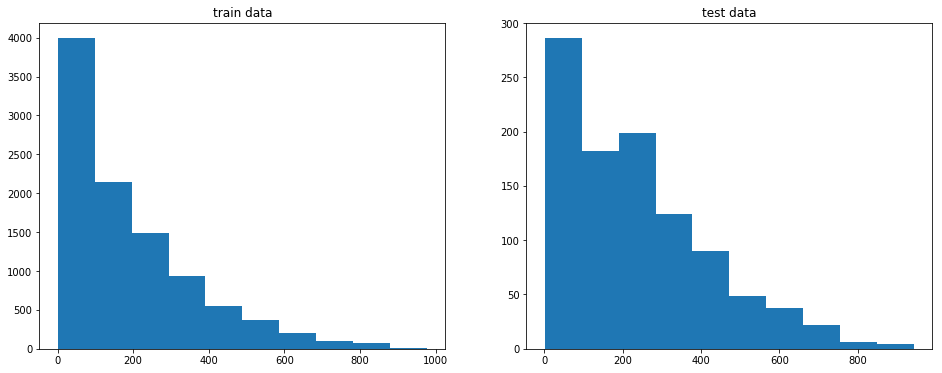

In [17]:
# визуализируем целевую переменнут на обучении и тесте
pylab.figure(figsize = (16, 6))

pylab.subplot(1,2,1)
pylab.hist(train_labels)
pylab.title('train data')

pylab.subplot(1,2,2)
pylab.hist(test_labels)
pylab.title('test data')
# и в обучении и в тесте большую часть времени было занято
# не больше 300 велосипедов

Ну вот, мы видим, что распределение отличается, но можно сказать, что и во время обучения, и во время теста большую часть времени было занято не более 300 велосипедов. 

#### Числовые признаки
В рамках этого урока будем работать только с численными признаками, поэтому сначала их отделим — создадим соответствующий список, — и теперь будем работать только с той частью обучающей и тестовой выборки, которая соответствует этим признакам. Давайте посмотрим, как выглядит получившийся набор данных. 

In [18]:
numeric_columns = ['temp', 'atemp', 'humidity', 'windspeed', 'casual', 'registered', 'month', 'hour']

In [19]:
train_data = train_data[numeric_columns]
test_data = test_data[numeric_columns]

In [20]:
train_data.head()

,temp,atemp,humidity,windspeed,casual,registered,month,hour
0,9.84,14.395,81,0.0,3,13,1,0
1,9.02,13.635,80,0.0,8,32,1,1
2,9.02,13.635,80,0.0,5,27,1,2
3,9.84,14.395,75,0.0,3,10,1,3
4,9.84,14.395,75,0.0,0,1,1,4


In [21]:
test_data.head()

,temp,atemp,humidity,windspeed,casual,registered,month,hour
9886,17.22,21.210,67,6.0032,20,505,10,7
9887,18.04,21.970,62,0.0000,35,800,10,8
9888,19.68,23.485,55,16.9979,32,323,10,9
9889,20.50,24.240,48,19.0012,65,157,10,10
9890,20.50,24.240,45,27.9993,56,172,10,11


Теперь данные состоят только из числовых признаков — как обучение, так и тест. 

### Модель

Теперь обучим модель. Так как мы решаем задачу регрессии, будем обучать SGDRegressor — это регрессия на основе стохастического градиентного спуска. Для начала создадим модель с параметрами по умолчанию и попробуем ее обучить на обучающей части данных. Делаем это с помощью метода fit, а дальше сразу оценим качество с помощью метрики mean_absolute_error — средняя ошибка. Оценивать будем на тестовой части данных. 

In [22]:
regressor = linear_model.SGDRegressor(random_state = 0) # Для начала создаем модель с параметрами по умолчанию
regressor.fit(train_data, train_labels) # пробуем ее обучить на обучающей части данных (fit)
metrics.mean_absolute_error(test_labels, regressor.predict(test_data)) # оцениваем по mean_absolute_error

/Users/apple/anaconda3/envs/python2/lib/python2.7/site-packages/sklearn/linear_model/stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDRegressor in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)


17970504438931.574

Получили какую-то невероятно большую ошибку. Посмотрим, как выглядят предсказания, и сравним их с правильным значением целевой функции. Сначала выведем на экран целевую функцию, теперь — наши предсказания

In [23]:
print test_labels[:10] # Целевая функция:
print regressor.predict(test_data)[:10] # Предсказания

[525 835 355 222 228 325 328 308 346 446]
[-4.17417839e+13 -6.79265398e+13 -2.75628696e+13 -1.74917869e+13
 -1.73725573e+13 -2.59080211e+13 -2.61995763e+13 -2.53704069e+13
 -2.77335332e+13 -3.61556707e+13]


Предсказываем невероятно большие числа. Так быть не должно. Посмотрим на коэффициенты регрессии — может быть это прольет свет на ошибку. 

In [24]:
regressor.coef_ # Огромные коэффициента говорят о том что данные не масштабированы

array([ 6.77363695e+09,  4.87092504e+10,  4.66599712e+09,  3.56187802e+10,
       -1.13057088e+11, -8.24626030e+10,  2.22349863e+10,  3.21515398e+10])

Невероятно большие коэффициенты. Как такое могло произойти? Линейные модели чувствительны к масштабу признаков. В данном случае мы работаем с набором данных, в котором признаки могут сильно отличаться по масштабам. Для того чтобы решить эту проблему, нам нужно сначала отмасштабировать признаки в нашем наборе данных. В Sklearn это можно сделать с помощью модуля preprocessing, нам понадобится объект StandardScaler. Сначала создадим такой объект, и дальше, для того чтобы применить наше преобразование, нам сначала нужно его обучить. Логично предположить, что обучать его можно только на обучающей части данных. Но почему это так? Обычно в жизни на момент, когда мы строим модель, мы еще ничего не знаем про тестовые данные. Поэтому для того чтобы не использовать информацию, которой на самом деле у нас нет — а это может привести к переобучению, — мы будем обучать наши преобразования только на обучающей выборке. Делаем это с помощью метода fit, и после того как мы получим обученное преобразование, мы применим его. Отдельно применим его к обучающей выборке, и отдельно — к тестовой. Это делается с помощью метода transform. 

### Scaling
масштабируем наши значения

In [25]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler() #создаем стандартный scaler
scaler.fit(train_data, train_labels) # обучим его на обучающей части данных
scaled_train_data = scaler.transform(train_data) # теперь отдельно применим его к обучающей выборке
scaled_test_data = scaler.transform(test_data) # и отдельно к тестовой

/Users/apple/anaconda3/envs/python2/lib/python2.7/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/Users/apple/anaconda3/envs/python2/lib/python2.7/site-packages/ipykernel_launcher.py:4: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  after removing the cwd from sys.path.
/Users/apple/anaconda3/envs/python2/lib/python2.7/site-packages/ipykernel_launcher.py:5: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  """


Итак, мы получили данные, теперь можно снова обучить модель. Сразу же оцениваем ее качество. 

In [26]:
regressor.fit(scaled_train_data, train_labels)
metrics.mean_absolute_error(test_labels, regressor.predict(scaled_test_data))

0.11793762963431502

Ошибка стала очень маленькой. Выведем целевую функцию и наши прогнозы. 

In [27]:
print test_labels[:10] # сравним целевую функцию 
print regressor.predict(scaled_test_data)[:10] # и наши прогнозы

[525 835 355 222 228 325 328 308 346 446]
[524.82767322 834.83176277 354.85768824 221.89221002 227.84049612
 324.88196372 327.8982227  307.9347954  345.90146969 445.90141764]


Видим, что мы ошибаемся меньше, чем на один велосипед. Это очень странно. Посмотрим на коэффициенты регрессии, чтобы понять, что  произошло. В таком виде их не очень удобно анализировать, давайте округлим. 

In [28]:
print regressor.coef_

[ 1.41019246e+00 -1.40725539e+00  1.45346928e-02 -4.38984175e-02
  5.08589954e+01  1.48004811e+02 -8.23376876e-03  6.37720415e-03]


In [29]:
print map(lambda x : round(x, 2), regressor.coef_) # округлим

[1.41, -1.41, 0.01, -0.04, 50.86, 148.0, -0.01, 0.01]


Практически все признаки принимают очень маленькие веса, за исключением двух. Посмотрим, что это за признаки. 

In [30]:
train_data.head() # это casual и registered

,temp,atemp,humidity,windspeed,casual,registered,month,hour
0,9.84,14.395,81,0.0,3,13,1,0
1,9.02,13.635,80,0.0,8,32,1,1
2,9.02,13.635,80,0.0,5,27,1,2
3,9.84,14.395,75,0.0,3,10,1,3
4,9.84,14.395,75,0.0,0,1,1,4


Это признаки casual (number of non-registered user rentals initiated) и registered (number of registered user rentals initiated). Фактически система аренды велосипедов работает следующим образом: системой может воспользоваться как зарегистрированный пользователь, так и незарегистрированный. В данном случае наши столбцы представляют количество зарегистрированных пользователей, которые используют систему — это столбец registered. И количество пользователей, которые не зарегистрировались, но также хотят арендовать велосипед — это столбец casual. Давайте выведем значения целевой функции и увидим следующую закономерность: фактически, если значение этих двух столбцов сложить, то мы получим нашу целевую метку. Давайте убедимся, что это действительно так на всех данных. 

In [31]:
# если значения этих двух столбцов сложить то получим целевую метку
train_labels[:10]

array([16, 40, 32, 13,  1,  1,  2,  3,  8, 14])

In [32]:
np.all(train_data.registered + train_data.casual == train_labels) # проверим это для всей выборки

True

Да, это правда так. Фактически два эти столбца в сумме дают нашу целевую метку. Что же тут произошло? Мы с вами совершили стандартную ошибку начинающих data scientist'ов — мы начали анализировать данные и строить модель, детально не разобравшись в значении наших переменных. То есть фактически мы использовали в модели те данные, по которым однозначно восстанавливается целевая функция. Вырежем эти данные из обучающей и из тестовой выборки. 

In [33]:
train_data.drop(['casual', 'registered'], axis = 1, inplace = True)
test_data.drop(['casual', 'registered'], axis = 1, inplace = True)

Теперь  снова отмасштабируем признаки уже на новом наборе данных. И теперь обучим модель и оценим качество.

In [34]:
# Масштабируем признаки на новом наборе данных
scaler.fit(train_data, train_labels)
scaled_train_data = scaler.transform(train_data)
scaled_test_data = scaler.transform(test_data)

/Users/apple/anaconda3/envs/python2/lib/python2.7/site-packages/ipykernel_launcher.py:3: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/apple/anaconda3/envs/python2/lib/python2.7/site-packages/ipykernel_launcher.py:4: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  after removing the cwd from sys.path.


In [35]:
# обучим модель и оценим качество
regressor.fit(scaled_train_data, train_labels)
metrics.mean_absolute_error(test_labels, regressor.predict(scaled_test_data))

121.81123864993025

Ошибка сильно выросла — теперь мы ошибаемся в среднем на 122 велосипеда. Это уже гораздо ближе к истине, эта оценка более реалистична. Для того чтобы до конца убедиться, что мы все делаем правильно, давайте выведем веса и регрессию. 

In [36]:
print map(lambda x : round(x, 2), regressor.coef_) # выведем веса и регрессию

[31.03, 29.96, -41.93, 6.17, 14.08, 49.6]


Практически все признаки вносят некоторый вклад в модель — эти веса больше похожи на правильные. Фактически мы  получили некоторую базовую модель, некоторый baseline, который мы считаем правильным. Теперь попытаемся его улучшить. Модель мы обучали с параметрами по умолчанию, поэтому теперь подберем параметры, оптимальные для решаемой задачи. Подбор параметров делаем по кросс-валидации. В данном случае с этим может возникнуть проблема, потому что прежде чем обучать модель, мы хотим делать scaling — мы хотим масштабировать признаки. Однако масштабирование мы обучаем только по обучающей части выборки. Таким образом, при кросс-валидации нам придется обучить сразу несколько скейлеров — по одному на каждую итерацию кросс-валидации. Получается, что нам нужно писать неудобные циклы, и запись будет громоздкой. Однако Sklearn есть способ этого всего избежать -  Pipeline. 

### Pipeline
Вместо одного преобразования делаем цепочку преобразований. Импортируем Pipeline из модуля pipeline и попытаемся его построить. В данном случае мы хотим делать два шага: первый шаг — это масштабирование признаков, второй шаг — это непосредственно обучение модели. Передаем в pipeline параметр steps — это список наших шагов, и далее каждый шаг представляется тьюплом, где первый элемент — это имя шага, второй элемент — это непосредственно объект, который может преобразовывать данные. Важным условием является то, чтобы у объекта были такие методы, как fit и transform, fit и predict. И scaler и regressor этому интерфейсу удовлетворяют, поэтому можно вносить их в цепочку. 

In [37]:
from sklearn.pipeline import Pipeline

pipeline = Pipeline(steps = [('scaling', scaler), 
                             ('regression', regressor)]) # pipeline из двух шагов: scaling и классификация
# steps - это список шагов, каждый шаг это кортеж из имени
# шага и непосредственного обьекта преобразователя данных
# у преобразователя должны быть fit и transform, fit и predict
# scaler и regressor удовлетворяют этому

Построили цепочку, и теперь давайте работать с этой цепочкой как с одиночным преобразованием. Фактически это означает, что мы можем эту цепочку обучить с помощью метода fit, а также получить предсказания с помощью метода predict. Давайте это сделаем и посмотрим на ошибку. Она не должна измениться.

In [38]:
pipeline.fit(train_data, train_labels)
metrics.mean_absolute_error(test_labels, pipeline.predict(test_data))

/Users/apple/anaconda3/envs/python2/lib/python2.7/site-packages/sklearn/base.py:467: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, y, **fit_params).transform(X)
/Users/apple/anaconda3/envs/python2/lib/python2.7/site-packages/sklearn/pipeline.py:331: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)


121.81123864993025

Ошибка не изменилась. Теперь цепочка преобразований готова, мы убедились, что она работает правильно, поэтому перейдем к подбору параметров. 


### Подбор параметров
Параметры будем подбирать по сетке, с помощью перебора различных наборов параметров, поэтому для начала посмотрим, как правильно к ним обращаться. 

In [39]:
# Сначала посмотрим как правильно к ним обращаться
pipeline.get_params().keys()

['regression__early_stopping',
 'regression__alpha',
 'regression__loss',
 'regression__tol',
 'regression__warm_start',
 'regression__power_t',
 'regression',
 'scaling__with_std',
 'regression__penalty',
 'regression__learning_rate',
 'scaling__copy',
 'regression__fit_intercept',
 'memory',
 'regression__average',
 'regression__verbose',
 'regression__l1_ratio',
 'regression__epsilon',
 'regression__n_iter_no_change',
 'scaling',
 'regression__validation_fraction',
 'regression__random_state',
 'regression__n_iter',
 'regression__eta0',
 'steps',
 'scaling__with_mean',
 'regression__max_iter',
 'regression__shuffle']

Видим, что в случае использования Pipeline нужно обращаться к параметрам с помощью расширенного имени. Сначала нужно указать имя шага, далее — двойное нижнее подчеркивание и название самого параметра. 

In [40]:
# Создадим словарь параметров, которые мы хотим перебирать
parameters_grid = {
    'regression__loss' : ['huber', 'epsilon_insensitive', 'squared_loss', ],
    'regression__n_iter' : [3, 5, 10, 50], 
    'regression__penalty' : ['l1', 'l2', 'none'],
    'regression__alpha' : [0.0001, 0.01],
    'scaling__with_mean' : [0., 0.5],
}
# вид функции потерь, количество итераций, вид регуляризации, коэффициент
# перед регуляризацией. Для разнообразия подберем параметр для скейлинга
# среднее

In [41]:
# Строим наш grid (сетку). Передаем туда Pipeline и словарь с параметрами
# указываем что будем оценивать метрику "средняя ошибка" и делать
# кроссвалидация на 4 фолда. 
grid_cv = model_selection.GridSearchCV(pipeline, parameters_grid, 
                                   scoring = 'neg_mean_absolute_error', cv = 4)

In [42]:
# Обучим сетку
# %%time
grid_cv.fit(train_data, train_labels)
# делается полный перебор по сетке, может занять время

/Users/apple/anaconda3/envs/python2/lib/python2.7/site-packages/sklearn/linear_model/stochastic_gradient.py:152: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
/Users/apple/anaconda3/envs/python2/lib/python2.7/site-packages/sklearn/linear_model/stochastic_gradient.py:152: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
/Users/apple/anaconda3/envs/python2/lib/python2.7/site-packages/sklearn/linear_model/stochastic_gradient.py:152: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
/Users/apple/anaconda3/envs/python2/lib/python2.7/site-packages/sklearn/linear_model/stochastic_gradient.py:152: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  Deprecat

/Users/apple/anaconda3/envs/python2/lib/python2.7/site-packages/sklearn/linear_model/stochastic_gradient.py:152: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
/Users/apple/anaconda3/envs/python2/lib/python2.7/site-packages/sklearn/linear_model/stochastic_gradient.py:152: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
/Users/apple/anaconda3/envs/python2/lib/python2.7/site-packages/sklearn/linear_model/stochastic_gradient.py:152: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
/Users/apple/anaconda3/envs/python2/lib/python2.7/site-packages/sklearn/linear_model/stochastic_gradient.py:152: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  Deprecat

/Users/apple/anaconda3/envs/python2/lib/python2.7/site-packages/sklearn/linear_model/stochastic_gradient.py:152: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
/Users/apple/anaconda3/envs/python2/lib/python2.7/site-packages/sklearn/linear_model/stochastic_gradient.py:152: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
/Users/apple/anaconda3/envs/python2/lib/python2.7/site-packages/sklearn/linear_model/stochastic_gradient.py:152: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
/Users/apple/anaconda3/envs/python2/lib/python2.7/site-packages/sklearn/linear_model/stochastic_gradient.py:152: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  Deprecat

/Users/apple/anaconda3/envs/python2/lib/python2.7/site-packages/sklearn/linear_model/stochastic_gradient.py:152: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
/Users/apple/anaconda3/envs/python2/lib/python2.7/site-packages/sklearn/linear_model/stochastic_gradient.py:152: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
/Users/apple/anaconda3/envs/python2/lib/python2.7/site-packages/sklearn/linear_model/stochastic_gradient.py:152: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
/Users/apple/anaconda3/envs/python2/lib/python2.7/site-packages/sklearn/linear_model/stochastic_gradient.py:152: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  Deprecat

/Users/apple/anaconda3/envs/python2/lib/python2.7/site-packages/sklearn/linear_model/stochastic_gradient.py:152: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
/Users/apple/anaconda3/envs/python2/lib/python2.7/site-packages/sklearn/linear_model/stochastic_gradient.py:152: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
/Users/apple/anaconda3/envs/python2/lib/python2.7/site-packages/sklearn/linear_model/stochastic_gradient.py:152: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
/Users/apple/anaconda3/envs/python2/lib/python2.7/site-packages/sklearn/linear_model/stochastic_gradient.py:152: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  Deprecat

/Users/apple/anaconda3/envs/python2/lib/python2.7/site-packages/sklearn/linear_model/stochastic_gradient.py:152: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
/Users/apple/anaconda3/envs/python2/lib/python2.7/site-packages/sklearn/linear_model/stochastic_gradient.py:152: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
/Users/apple/anaconda3/envs/python2/lib/python2.7/site-packages/sklearn/linear_model/stochastic_gradient.py:152: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
/Users/apple/anaconda3/envs/python2/lib/python2.7/site-packages/sklearn/linear_model/stochastic_gradient.py:152: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  Deprecat

/Users/apple/anaconda3/envs/python2/lib/python2.7/site-packages/sklearn/linear_model/stochastic_gradient.py:152: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
/Users/apple/anaconda3/envs/python2/lib/python2.7/site-packages/sklearn/linear_model/stochastic_gradient.py:152: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
/Users/apple/anaconda3/envs/python2/lib/python2.7/site-packages/sklearn/linear_model/stochastic_gradient.py:152: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
/Users/apple/anaconda3/envs/python2/lib/python2.7/site-packages/sklearn/linear_model/stochastic_gradient.py:152: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  Deprecat

/Users/apple/anaconda3/envs/python2/lib/python2.7/site-packages/sklearn/linear_model/stochastic_gradient.py:152: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
/Users/apple/anaconda3/envs/python2/lib/python2.7/site-packages/sklearn/linear_model/stochastic_gradient.py:152: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
/Users/apple/anaconda3/envs/python2/lib/python2.7/site-packages/sklearn/linear_model/stochastic_gradient.py:152: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
/Users/apple/anaconda3/envs/python2/lib/python2.7/site-packages/sklearn/linear_model/stochastic_gradient.py:152: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  Deprecat

/Users/apple/anaconda3/envs/python2/lib/python2.7/site-packages/sklearn/linear_model/stochastic_gradient.py:152: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
/Users/apple/anaconda3/envs/python2/lib/python2.7/site-packages/sklearn/linear_model/stochastic_gradient.py:152: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
/Users/apple/anaconda3/envs/python2/lib/python2.7/site-packages/sklearn/linear_model/stochastic_gradient.py:152: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
/Users/apple/anaconda3/envs/python2/lib/python2.7/site-packages/sklearn/linear_model/stochastic_gradient.py:152: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  Deprecat

/Users/apple/anaconda3/envs/python2/lib/python2.7/site-packages/sklearn/linear_model/stochastic_gradient.py:152: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
/Users/apple/anaconda3/envs/python2/lib/python2.7/site-packages/sklearn/linear_model/stochastic_gradient.py:152: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
/Users/apple/anaconda3/envs/python2/lib/python2.7/site-packages/sklearn/linear_model/stochastic_gradient.py:152: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
/Users/apple/anaconda3/envs/python2/lib/python2.7/site-packages/sklearn/linear_model/stochastic_gradient.py:152: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  Deprecat

/Users/apple/anaconda3/envs/python2/lib/python2.7/site-packages/sklearn/linear_model/stochastic_gradient.py:152: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
/Users/apple/anaconda3/envs/python2/lib/python2.7/site-packages/sklearn/linear_model/stochastic_gradient.py:152: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
/Users/apple/anaconda3/envs/python2/lib/python2.7/site-packages/sklearn/linear_model/stochastic_gradient.py:152: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
/Users/apple/anaconda3/envs/python2/lib/python2.7/site-packages/sklearn/linear_model/stochastic_gradient.py:152: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  Deprecat

/Users/apple/anaconda3/envs/python2/lib/python2.7/site-packages/sklearn/linear_model/stochastic_gradient.py:152: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
/Users/apple/anaconda3/envs/python2/lib/python2.7/site-packages/sklearn/linear_model/stochastic_gradient.py:152: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
/Users/apple/anaconda3/envs/python2/lib/python2.7/site-packages/sklearn/linear_model/stochastic_gradient.py:152: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
/Users/apple/anaconda3/envs/python2/lib/python2.7/site-packages/sklearn/linear_model/stochastic_gradient.py:152: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  Deprecat

/Users/apple/anaconda3/envs/python2/lib/python2.7/site-packages/sklearn/linear_model/stochastic_gradient.py:152: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
/Users/apple/anaconda3/envs/python2/lib/python2.7/site-packages/sklearn/linear_model/stochastic_gradient.py:152: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
/Users/apple/anaconda3/envs/python2/lib/python2.7/site-packages/sklearn/linear_model/stochastic_gradient.py:152: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
/Users/apple/anaconda3/envs/python2/lib/python2.7/site-packages/sklearn/linear_model/stochastic_gradient.py:152: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  Deprecat

/Users/apple/anaconda3/envs/python2/lib/python2.7/site-packages/sklearn/linear_model/stochastic_gradient.py:152: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
/Users/apple/anaconda3/envs/python2/lib/python2.7/site-packages/sklearn/linear_model/stochastic_gradient.py:152: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
/Users/apple/anaconda3/envs/python2/lib/python2.7/site-packages/sklearn/linear_model/stochastic_gradient.py:152: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
/Users/apple/anaconda3/envs/python2/lib/python2.7/site-packages/sklearn/linear_model/stochastic_gradient.py:152: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  Deprecat

/Users/apple/anaconda3/envs/python2/lib/python2.7/site-packages/sklearn/linear_model/stochastic_gradient.py:152: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
/Users/apple/anaconda3/envs/python2/lib/python2.7/site-packages/sklearn/linear_model/stochastic_gradient.py:152: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
/Users/apple/anaconda3/envs/python2/lib/python2.7/site-packages/sklearn/linear_model/stochastic_gradient.py:152: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
/Users/apple/anaconda3/envs/python2/lib/python2.7/site-packages/sklearn/linear_model/stochastic_gradient.py:152: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  Deprecat

/Users/apple/anaconda3/envs/python2/lib/python2.7/site-packages/sklearn/linear_model/stochastic_gradient.py:152: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
/Users/apple/anaconda3/envs/python2/lib/python2.7/site-packages/sklearn/linear_model/stochastic_gradient.py:152: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
/Users/apple/anaconda3/envs/python2/lib/python2.7/site-packages/sklearn/linear_model/stochastic_gradient.py:152: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
/Users/apple/anaconda3/envs/python2/lib/python2.7/site-packages/sklearn/linear_model/stochastic_gradient.py:152: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  Deprecat

GridSearchCV(cv=4, error_score='raise-deprecating',
       estimator=Pipeline(memory=None,
     steps=[('scaling', StandardScaler(copy=True, with_mean=True, with_std=True)), ('regression', SGDRegressor(alpha=0.0001, average=False, early_stopping=False, epsilon=0.1,
       eta0=0.01, fit_intercept=True, l1_ratio=0.15,
       learning_rate='invscaling', loss=...dom_state=0, shuffle=True, tol=None, validation_fraction=0.1,
       verbose=0, warm_start=False))]),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'regression__n_iter': [3, 5, 10, 50], 'regression__loss': ['huber', 'epsilon_insensitive', 'squared_loss'], 'scaling__with_mean': [0.0, 0.5], 'regression__alpha': [0.0001, 0.01], 'regression__penalty': ['l1', 'l2', 'none']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='neg_mean_absolute_error', verbose=0)

In [43]:
# лучшие значения параметров, лучшие значение метрики
print grid_cv.best_score_
print grid_cv.best_params_
# для обучения достаточно 3 итерация, нужно использовать квадратичную
# функцию потерь, scaling со средним 0, коэфф перед регуляризацией 0,01 
# и регуляризация принимает вид L2

-108.61449660348289
{'regression__n_iter': 3, 'regression__loss': 'squared_loss', 'scaling__with_mean': 0.0, 'regression__alpha': 0.01, 'regression__penalty': 'l2'}


### Оценка по отложенному тесту
Оценим лучшую модель по отложенному тесту

In [44]:
metrics.mean_absolute_error(test_labels, grid_cv.best_estimator_.predict(test_data))
# ошибка уменьшилась, теперь ошибаемся на 120 велосипедов вместо 122, но
# это оценка в некоторой точке. 

119.98978845935379

In [45]:
# Посмотрим насколько ошибка большая отн-но ср. значения целевой переменной
np.mean(test_labels)
# среднее значения велосипедов 232, а мы ошибаемся на 120. Плохо

232.159

Фактически наша оптимизация с помощью подбора параметров не помогла нам улучшить модель. А для того чтобы в этом убедиться, посмотрим на значения наших предсказаний. Для начала их получим, теперь выведем правильные значения целевой метки и выведем наши оценки

In [46]:
# Посмотрим значения наших предсказаний
test_predictions = grid_cv.best_estimator_.predict(test_data)
print test_labels[:10]
print test_predictions[:10]
# Отличаются очень существенно

[525 835 355 222 228 325 328 308 346 446]
[139.60470681 159.80765341 207.55935972 237.76288054 257.83836668
 267.44558034 272.49537469 297.70688522 304.29818873 313.58821156]


Теперь отобразим график наших объектов в пространстве правильных значений целевой метки и наших предсказаний. Когда мы строим график в таком пространстве, то для хорошей модели понятно, что мы ожидаем — мы ожидаем облако точек в районе диагонали. Получается, что наши предсказания должны совпадать с целевой меткой, поэтому диагональ должна получиться. В данном случае мы имеем не очень хорошую модель, давайте посмотрим, как это выглядит. 

(-100, 1100)

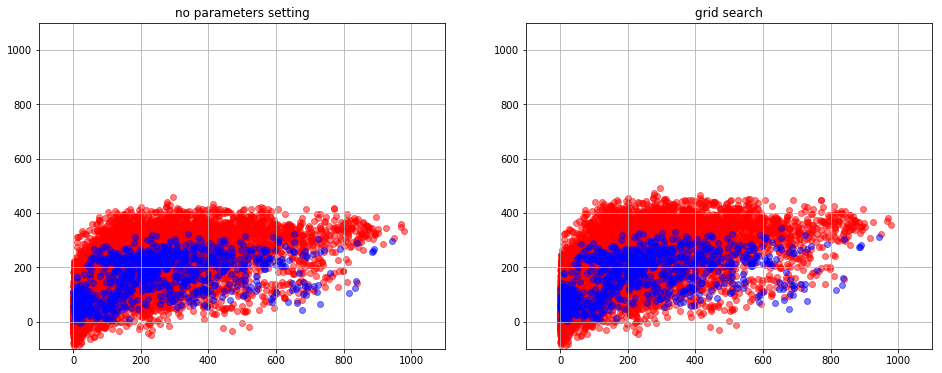

In [47]:
# Отобразим график объектов в пространстве правильных значений целевой
# метки и наших предсказаний. Для хорошей модели это будет облако точек
# в районе диагонали, т.е. предсказания совпадут с целевой меткой
pylab.figure(figsize=(16, 6))

pylab.subplot(1,2,1)
pylab.grid(True)
pylab.scatter(train_labels, pipeline.predict(train_data), alpha=0.5, color = 'red')
pylab.scatter(test_labels, pipeline.predict(test_data), alpha=0.5, color = 'blue')
pylab.title('no parameters setting')
pylab.xlim(-100,1100)
pylab.ylim(-100,1100)

pylab.subplot(1,2,2)
pylab.grid(True)
pylab.scatter(train_labels, grid_cv.best_estimator_.predict(train_data), alpha=0.5, color = 'red')
pylab.scatter(test_labels, grid_cv.best_estimator_.predict(test_data), alpha=0.5, color = 'blue')
pylab.title('grid search')
pylab.xlim(-100,1100)
pylab.ylim(-100,1100)
# у нас диагонали не получилось, еще и две модели не особо отличаются

Да, видим, что наши облака точек совсем не похожи на диагональ. Более того, облака точек при использовании модели без подбора параметров и облака точек при использовании модели с подбором параметров не сильно отличаются. То есть фактически наша модель является довольно слабой, и оптимизация по параметрам нам ничего не дала.

На этом давайте закончим. В этом уроке мы получили некоторый baseline, некоторую начальную модель, которая работает только на числовых признаках. Также в процессе работы мы с вами научились делать scaling, мы научились строить цепочки преобразований, а на следующем уроке мы постараемся улучшить эту модель, добавив в нее все остальные признаки.

# Week 3 - 3. sklearn.case_part2
# Sklearn

## Bike Sharing Demand
Раньше мы изучали функциональность библиотеки Sklearn на модельных данных, а теперь настало время перейти к прикладной задаче. Потренируемся проходить все шаги от загрузки и предобратки данных до построения финальной модели. Работать мы будем с задачей Bike Sharing (https://www.kaggle.com/c/bike-sharing-demand). В этой задаче по историческим данным о погодных условиях и аренде велосипедов требуется предсказать, сколько же велосипедов будет занято в заданный день и час. В исходной постановке задачи нам доступно 11 признаков (https://www.kaggle.com/c/prudential-life-insurance-assessment/data), среди них есть как числовые признаки, так и категориальные, и бинарные данные.

Для демонстрации используется обучающая выборка из исходных данных train.csv, файлы для работы прилагаются.

### Библиотеки

In [2]:
from sklearn import model_selection, linear_model, metrics, pipeline, preprocessing
import numpy as np
import pandas as pd
%pylab inline

### Загрузка данных

In [5]:
raw_data = pd.read_csv('W3pyf - bike_sharing_demand.csv', header = 0, sep = ',')
raw_data.head() # последний столбец - значение целевой переменной

### Предобработка данных

#### Обучение и отложенный тест

In [7]:
raw_data.datetime = raw_data.datetime.apply(pd.to_datetime)

In [8]:
# Cнова сгенерируем признаки «месяц» и «час»
raw_data['month'] = raw_data.datetime.apply(lambda x : x.month)
raw_data['hour'] = raw_data.datetime.apply(lambda x : x.hour)

In [9]:
# разобьем данные на обучение и тест. Разбивать данные будем по времени
# обучаться будем на более ранних данных, тестироваться на 1000 поздних
train_data = raw_data.iloc[:-1000, :]
hold_out_test_data = raw_data.iloc[-1000:, :]
print raw_data.shape, train_data.shape, hold_out_test_data.shape # смотрим размер получившихся наборов данных

Почти 10 000 данных в обучение, и ровно 1000 объектов идет в тест.

In [11]:
# Снова разделим данные на признаки и целевую метку. Целевая метка - count.
# Из признаков вырезаем datetime, как идентификатор объектов.
# вырезаем столбцы count, casual, registered (последние два в сумме
# дают значение целевой переменной)
train_labels = train_data['count'].values
train_data = train_data.drop(['datetime', 'count', 'casual', 'registered'], axis = 1)

In [12]:
# аналогично для теста
test_labels = hold_out_test_data['count'].values
test_data = hold_out_test_data.drop(['datetime', 'count', 'casual', 'registered'], axis = 1)

Теперь давайте поговорим про данные. В предыдущем уроке мы с вами рассматривали признаки, которые имеют численный тип. В данном уроке мы с вами хотим обработать все признаки, но при этом мы понимаем, что если признаки являются данными разного типа, то, наверное, и методы, которыми мы будем их обрабатывать, должны отличаться. Поэтому  сделаем следующее - разделим данные по типам (понятен из описания). Получим некоторый логический индекс, который будет показывать, в каком столбце находятся данные данного типа. То есть хотим получить индекс, который будет принимать значение true в позиции нужных столбцов. Для начала сделаем это для бинарных данных. Таких признаков всего два — это holiday и workingday. Признаки принимают значения 0 или 1, соответственно, если данные являются выходным, то первый признак принимает значение 1, в противоположном случае — 0. И если день является рабочим, то второй признак принимает значение 1, в противоположном случае — 0. Получим логический индекс для бинарных данных. 

In [13]:
binary_data_columns = ['holiday', 'workingday']
binary_data_indices = np.array([(column in binary_data_columns) for column in train_data.columns], dtype = bool)
print binary_data_columns
print binary_data_indices

Вот мы получаем массив, у которого true соответствует тем позициям в DataFrame, в котором мы видим эти столбцы. 

In [15]:
# Аналогично для категориальных признаков - сезон, погода по ощущениям, месяц
categorical_data_columns = ['season', 'weather', 'month'] 
categorical_data_indices = np.array([(column in categorical_data_columns) for column in train_data.columns], 
                                    dtype = bool)
print categorical_data_columns
print categorical_data_indices

In [18]:
numeric_data_columns = ['temp', 'atemp', 'humidity', 'windspeed', 'hour'] # теперь численные данные
numeric_data_indices = np.array([(column in numeric_data_columns) for column in train_data.columns], dtype = bool)

print numeric_data_columns
print numeric_data_indices

### Pipeline
строим аналогично файлу part1. В результате получим dataset, состоящий из обработанных данных
Теперь строим Pipeline - цепочку преобразований, в результате которой мы получим dataset, состоящий из обработанных данных. Сначала создадим модель, которую хотим применять — это снова будет регрессия SGD. Однако сразу же укажем некоторые параметры, которые подобрали в прошлый раз. С учетом новых данных эти параметры могут перестать быть оптимальными, но тем не менее это неплохое приближение. Создаем модель, и теперь давайте посмотрим на цепочку. 

In [22]:
regressor = linear_model.SGDRegressor(random_state = 0, n_iter = 3, loss = 'squared_loss', penalty = 'l2')

В данном случае она выглядит чуть более сложной, но фактически наше преобразование снова состоит из двух больших шагов: первый шаг — это обработка данных, второй шаг — это непосредственно построение модели. Для начала посмотрим на построение модели, оно не отличается — здесь мы задаем имя шага и передаем нашу модель, наш регрессор. Теперь разберемся с преобразованием данных. Для того чтобы по-разному обрабатывать разные части dataset, разные столбцы из набора данных, нам нужно сначала данные разбить, получить три набора данных. Дальше каждый из них обработать по отдельности и дальше собрать их вместе. Причем собирать их каждый раз нужно в одинаковом порядке — это важно, потому что фактически мы можем использовать это преобразование для кросс-валидации, для подбора параметров, поэтому нам действительно нужно получать каждый раз набор данных в заданном порядке. Посмотрим, как такого добиться. Для того чтобы сначала разделить данные на несколько частей, а потом собрать их вместе нужен трансформер FeatureUnion. Создадим его и будем работать в рамках этого трансформера, внутри него будем делать три преобразования, то есть фактически данные разбиваются на три части. Первое преобразование — работа с бинарными данными, второе — работа с численными данными, и последнее  — работа с категориальными данными. Это и есть наш transformer list — список преобразований. Теперь смотрим на первое. Бинарные данные устраивают нас в таком виде, в котором они уже есть, мы не хотим никак их изменять. Поэтому просто используем FunctionTransformer, которому мы передаем логический индекс, соответствующий бинарным признакам, и говорим, что нам достаточно просто эти данные выбрать, отделить их от всего dataset и, не изменяя, положить их отдельно.

In [23]:
estimator = pipeline.Pipeline(steps = [       
    ('feature_processing', pipeline.FeatureUnion(transformer_list = [        
            #binary
            ('binary_variables_processing', preprocessing.FunctionTransformer(lambda data: data[:, binary_data_indices])), 
                    
            #numeric
            ('numeric_variables_processing', pipeline.Pipeline(steps = [
                ('selecting', preprocessing.FunctionTransformer(lambda data: data[:, numeric_data_indices])),
                ('scaling', preprocessing.StandardScaler(with_mean = 0))            
                        ])),
        
            #categorical
            ('categorical_variables_processing', pipeline.Pipeline(steps = [
                ('selecting', preprocessing.FunctionTransformer(lambda data: data[:, categorical_data_indices])),
                ('hot_encoding', preprocessing.OneHotEncoder(handle_unknown = 'ignore'))            
                        ])),
        ])),
    ('model_fitting', regressor)
    ]
)
# цепочка стала сложнее. Два больших шага - обработки данных, второе - 
# непосредственное построение модели. Построение модели не отличается:
# задаем имя шага, передаем нашу модель, наш регрессор
# Преобразование. Для разной обработки разных частей dataset'a разные
# столбцы из набора данных, нужно сначала данные разбить, получить 
# три набора данных. Каждый из них обработать по отдельности и дальше
# собрать вместе. Собирать необходимо в одинаковом порядке, т.к. мы можем
# использовать это преобразование для кросс-валидации, для подбора 
# параметров, поэтому нужно получать каждый раз набор данных в заданном
# порядке. Чтобы сначала разделить данные на несколько частей, а потом 
# собрать их вместе нужен FeatureUnion - трансформер который это делает
# Создадим его и будем работать в рамках этого трансформера, внутри него
# будем делать три преобразования. Фактически данные разбиваются на три
# части. Первое преобразование - работа с бинарными данными, второе - с 
# численными, третье - категориальные. Это и есть transformer list, т.е.
# список преобразования. Смотрим на первое - бинарные данные устраивают
# в таком виде, в котором они уже есть, мы не хотим их изменять.
# Используем FunctionTransformer которому передаем наш логический индекс
# он соответствует бинарным признакам и говорим, что нам достаточно просто
# эти данные выбрать, отделить их от всего dataset и не изменяя положить
# их отдельно.

Следующий тип данных — числовые признаки. Здесь придется применить цепочку преобразований, потому что фактически их два. Сначала данные нужно отделить от остальных, потом отмасштабировать с помощью scaler. В данном случае придется объявить внутри Pipeline, в отличие от предыдущего случая. Объявляем Pipeline и говорим, что он состоит из двух шагов: первый шаг — это трансформер, то есть фактически мы передаем сюда логический индекс для числовых данных и отделяем их от всех остальных. И дальше к данным, которые отделили, применяем scaling — делаем масштабирование. На этом преобразование числовых признаков заканчивается. Последний тип признаков, с которыми мы работаем — это категориальные данные. Здесь также будет цепочка преобразований, поэтому создаем Pipeline. Шаги следующие: первый шаг — это отделение этих данных, то есть фактически мы передаем сюда логический индекс для категориальных признаков и отделяем нужную часть набора данных. И дальше применяем методику hot encoding — помните, что если у нас есть категориальный признак, внутри которого доступно несколько значений, то после кодирования hot encoding получаем n признаков, каждый из которых является бинарным. Фактически он, каждый из новых признаков, соответствует отдельному значению старого категориального признака — принимает значение 1 на тех объектах, где достигается это значение, и 0 на всех остальных. Вот ровно такое преобразование мы здесь и применяем. На этом наша цепочка преобразований заканчивается, и последнее, что нужно сделать — это собрать данные вместе и применить второй шаг, обучить модель. Вот давайте такую цепочку создадим, и попробуем для начала просто ее обучить, и оценить качество.

In [24]:
estimator.fit(train_data, train_labels)

C:\Users\User\Anaconda3_5.2.0\envs\Python2.7\lib\site-packages\sklearn\preprocessing\_function_transformer.py:98: FutureWarning: The default validate=True will be replaced by validate=False in 0.22.
  "validate=False in 0.22.", FutureWarning)
C:\Users\User\Anaconda3_5.2.0\envs\Python2.7\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:152: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)


Pipeline(memory=None,
     steps=[('feature_processing', FeatureUnion(n_jobs=None,
       transformer_list=[('binary_variables_processing', FunctionTransformer(accept_sparse=False, check_inverse=True,
          func=<function <lambda> at 0x000000000C587C18>, inv_kw_args=None,
          inverse_func=None, kw_args=None, pass_y=...ndom_state=0, shuffle=True, tol=None, validation_fraction=0.1,
       verbose=0, warm_start=False))])

In [25]:
metrics.mean_absolute_error(test_labels, estimator.predict(test_data))

120.17177172806858

Мы ошибаемся на 120 велосипедах как и раньше. Преобразование данных не помогло улучшить модель. 
Может подбор параметров поможет? Посмотрим, как в случае сложной цепочки обращаться к параметрам. Комбинация методов get_params и keys. 
Нужно использовать расширенные имена, нужно указывать имя шага, потом имена всех промежуточных шагов и так вплоть до параметра. Это можно сделать. Не будем перебирать слишком много параметров, для ускорения процесса переберем только два: это alpha и eta0. Создадим такой словарь. Воспользуемся поиском по сетке, будем делать полный перебор. Метрика, которую мы оцениваем — это средняя ошибка. И делаем кросс-валидацию на четыре фолда. Итак, создаем сетку, и обучаем ее. Посмотрим на лучшую оценку и на лучшую комбинацию параметров. Ошибка вновь довольно большая и мы получили правильные веса. Теперь воспользуемся этой лучшей моделью и оценим ее качество на отложенном dataset. Строим наше предсказание, считаем метрику. Видим, что мы ошибаемся в среднем на 125 велосипедов. Это не очень хороший результат. Выведем метки и наши результаты. Ошибаемся сильно. Теперь построим график - наши объекты в координатах исходных значений целевой метки и наших прогнозов.  

Вот получаем, что мы ошибаемся на 120 велосипедах — приблизительно то же самое, что и раньше. То есть фактически преобразование данных не помогло нам принципиально улучшить модель. Но давайте посмотрим: может быть, подбор параметров способен на это повлиять? Давайте посмотрим, как в случае такой сложной цепочки обращаться к параметрам. Делаем это с помощью комбинации методов get_params и keys. 

### Подбор параметров

In [26]:
estimator.get_params().keys()

['feature_processing__binary_variables_processing__pass_y',
 'feature_processing__binary_variables_processing__func',
 'feature_processing__numeric_variables_processing__selecting__kw_args',
 'model_fitting__learning_rate',
 'feature_processing__n_jobs',
 'feature_processing__numeric_variables_processing__selecting',
 'feature_processing__categorical_variables_processing__selecting__kw_args',
 'feature_processing__numeric_variables_processing__scaling__with_std',
 'feature_processing__categorical_variables_processing__selecting__pass_y',
 'feature_processing__categorical_variables_processing__selecting__accept_sparse',
 'feature_processing__transformer_weights',
 'feature_processing__categorical_variables_processing__hot_encoding__n_values',
 'model_fitting__fit_intercept',
 'model_fitting__n_iter',
 'model_fitting__early_stopping',
 'feature_processing__categorical_variables_processing__selecting__check_inverse',
 'feature_processing__binary_variables_processing__check_inverse',
 'fea

И видим, что да, но не очень удобно, потому что нужно использовать расширенные имена, нужно указывать имя шага, потом имена всех промежуточных шагов и так вплоть до параметра. Но, в общем-то, это тоже можно сделать. Вот давайте мы с вами не будем перебирать слишком много параметров, а для того чтобы ускорить процесс, переберем только два: это коэффициенты alpha и eta0. Создадим такой словарь. 

In [27]:
parameters_grid = {
    'model_fitting__alpha' : [0.0001, 0.001, 0,1],
    'model_fitting__eta0' : [0.001, 0.05],
}


И теперь давайте снова воспользуемся поиском по сетке, будем делать полный перебор. Метрика, которую мы оцениваем — это средняя ошибка. И делаем кросс-валидацию на четыре фолда. Итак, создаем сетку, и теперь давайте ее обучать. 

In [31]:
grid_cv = model_selection.GridSearchCV(estimator, parameters_grid, scoring = 'neg_mean_absolute_error', cv = 4)

In [32]:
%%time
grid_cv.fit(train_data, train_labels)

C:\Users\User\Anaconda3_5.2.0\envs\Python2.7\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:152: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
C:\Users\User\Anaconda3_5.2.0\envs\Python2.7\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:152: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
C:\Users\User\Anaconda3_5.2.0\envs\Python2.7\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:152: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
C:\Users\User\Anaconda3_5.2.0\envs\Python2.7\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:152: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationW

Wall time: 1.42 s


GridSearchCV(cv=4, error_score='raise-deprecating',
       estimator=Pipeline(memory=None,
     steps=[('feature_processing', FeatureUnion(n_jobs=None,
       transformer_list=[('binary_variables_processing', FunctionTransformer(accept_sparse=False, check_inverse=True,
          func=<function <lambda> at 0x000000000C587C18>, inv_kw_args=None,
          inverse_func=None, kw_args=None, pass_y=...ndom_state=0, shuffle=True, tol=None, validation_fraction=0.1,
       verbose=0, warm_start=False))]),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'model_fitting__eta0': [0.001, 0.05], 'model_fitting__alpha': [0.0001, 0.001, 0, 1]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='neg_mean_absolute_error', verbose=0)

In [33]:
print grid_cv.best_score_
print grid_cv.best_params_

-106.60193979729921
{'model_fitting__eta0': 0.05, 'model_fitting__alpha': 0.001}


В этот раз все должно быть довольно быстро. Да, видим, что процесс занял меньше секунды. И теперь давайте посмотрим на лучшую оценку и на лучшую комбинацию параметров. Ну вот видим, что ошибка вновь довольно большая и мы получили правильные веса. Теперь давайте воспользуемся этой лучшей моделью и оценим ее качество на отложенном dataset. Итак, строим наше предсказание, теперь считаем метрику. 

### Оценка по отложенному тесту

In [34]:
test_predictions = grid_cv.best_estimator_.predict(test_data)

In [35]:
metrics.mean_absolute_error(test_labels, test_predictions)

125.11055616822885

Видим, что мы ошибаемся в среднем на 125 велосипедов. Это не очень хороший результат. Давайте выведем метки и выведем наши результаты. Метки и результаты. 

In [36]:
print test_labels[:20]

[525 835 355 222 228 325 328 308 346 446 943 838 531 432 195 181 199  49
  17  16]


In [37]:
print test_predictions[:20]

[153.28859124 181.89867268 227.64068051 262.47727954 278.91095558
 279.82091706 301.6223314  333.35079391 336.28447325 348.55425173
 346.29477487 336.77206344 318.29674096 298.65247956 285.35831745
 246.0338046  252.72004984  58.96734361  66.43816405  73.90898448]


Да, видим, что, действительно, ошибаемся мы очень сильно. Но давайте теперь построим следующий график. Отобразим наши объекты в координатах исходных значений целевой метки и наших прогнозов. 

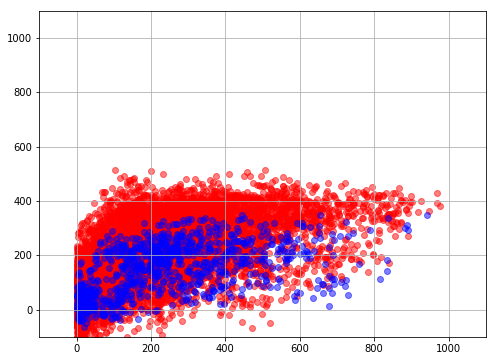

In [38]:
pylab.figure(figsize=(8, 6))
pylab.grid(True)
pylab.xlim(-100,1100)
pylab.ylim(-100,1100)
pylab.scatter(train_labels, grid_cv.best_estimator_.predict(train_data), alpha=0.5, color = 'red')
pylab.scatter(test_labels, grid_cv.best_estimator_.predict(test_data), alpha=0.5, color = 'blue')

Область точек достаточно далека от диагональной области, которая получилась бы в случае хорошей модели,график похож на тот, который в предыдущем уроке. Все преобразования — генерация новых признаков, вновь подбор параметров — не привели к улучшению модели. 
Проанализируем, почему это так. Мы строим линейную модель — мы предполагаем некоторую линейную зависимость между признаками и целевой переменной. На самом деле это не совсем так - не всегда количество занятых велосипедов линейно зависит, например, от времени. На каком-то отрезке это будет так, допустим, рост времени будет приводить к росту занятых велосипедов, но на другом отрезке это может быть наоборот. И те же самые рассуждения более-менее применимы к другим признакам, например таким как температура, или номер месяца, или давление. Соответственно, что мы может сделать? С одной стороны, чтобы помочь нашей линейной модели, мы можем сгенерировать другие признаки — такие признаки, на которых мы такую зависимость будем предполагать. Другой вариант — мы можем воспользоваться другой моделью, более сложной, которая умеет учитывать нелинейные зависимости между признаками и целевой функцией. Процесс генерации новых признаков является творческим, поэтому можно самостоятельно изучить набор данных и придумать новые признаки. 
Исследуем другой подход - обучим нелинейную модель «случайный лес». 

Вот мы получили график. Во-первых, мы видим, что область точек достаточно далека от диагональной области, которая получилась бы в случае хорошей модели. А с другой стороны, мы понимаем, что наш график очень сильно похож на тот график, который мы получили на предыдущем уроке. Это означает, что все наши преобразования — генерация новых признаков, вновь подбор параметров — не привели к улучшению модели, мы не смогли ее улучшить. Как же нам быть в такой ситуации? Но давайте для начала проанализируем, почему это так. Мы с вами строим линейную модель — это говорит о том, что мы предполагаем некоторую линейную зависимость между признаками и целевой переменной. На самом деле это не совсем так. Ведь мы понимаем, что не всегда количество занятых велосипедов линейно зависит, например, от времени. Понятно, что на каком-то отрезке это будет так, допустим, рост времени будет приводить к росту занятых велосипедов, но на другом отрезке это может быть наоборот. И те же самые рассуждения более-менее справедливы, более-менее применимы к другим признакам, например таким как температура, или номер месяца, или давление. Соответственно, что мы может сделать? С одной стороны, чтобы помочь нашей линейной модели, мы можем сгенерировать другие признаки — такие признаки, на которых мы такую зависимость будем предполагать. Другой вариант — мы можем воспользоваться другой моделью, более сложной, которая умеет учитывать нелинейные зависимости между признаками и целевой функцией. Процесс генерации новых признаков является творческим, поэтому, конечно же, вы можете самостоятельно изучить набор данных и придумать новые признаки. Попробуйте, это довольно интересно. А мы с вами исследуем другой подход. Давайте обучим другую, нелинейную модель. Вы такие модели еще не проходили, но это будет некоторым анонсом к следующей неделе. Возможно, это только подогреет ваш интерес. Модель, которую я предлагаю строить, называется «случайный лес». Она находится в модуле ensemble. Вот давайте создадим случайный лес, зададим туда некоторые параметры, не будем пока акцентировать на них внимание. 

### Другая модель

In [39]:
# Она находится в модуле ensemble. 
from sklearn.ensemble import RandomForestRegressor

In [40]:
regressor = RandomForestRegressor(random_state = 0, max_depth = 20, n_estimators = 50)

И сделаем следующее: построим точно такую же цепочку преобразований с единственным изменением — подменим наш регрессор с линейной модели на случайный лес, на random forest. Итак, получили цепочку, теперь давайте модель обучим — делаем это с помощью метода fit. И даже не будем подбирать никакие параметры, просто обучим модель и посмотрим на ее ошибку. 

In [41]:
# построим точно такую же цепочку преобразований но подменим наш регрессор 
# с линейной модели на случайный лес.
estimator = pipeline.Pipeline(steps = [       
    ('feature_processing', pipeline.FeatureUnion(transformer_list = [        
            #binary
            ('binary_variables_processing', preprocessing.FunctionTransformer(lambda data: data[:, binary_data_indices])), 
                    
            #numeric
            ('numeric_variables_processing', pipeline.Pipeline(steps = [
                ('selecting', preprocessing.FunctionTransformer(lambda data: data[:, numeric_data_indices])),
                ('scaling', preprocessing.StandardScaler(with_mean = 0, with_std = 1))            
                        ])),
        
            #categorical
            ('categorical_variables_processing', pipeline.Pipeline(steps = [
                ('selecting', preprocessing.FunctionTransformer(lambda data: data[:, categorical_data_indices])),
                ('hot_encoding', preprocessing.OneHotEncoder(handle_unknown = 'ignore'))            
                        ])),
        ])),
    ('model_fitting', regressor)
    ]
)

In [42]:
# не будем подбирать никакие параметры, обучим модель и посмотрим ошибку
estimator.fit(train_data, train_labels)

Pipeline(memory=None,
     steps=[('feature_processing', FeatureUnion(n_jobs=None,
       transformer_list=[('binary_variables_processing', FunctionTransformer(accept_sparse=False, check_inverse=True,
          func=<function <lambda> at 0x000000000CE480B8>, inv_kw_args=None,
          inverse_func=None, kw_args=None, pass_y=...timators=50, n_jobs=None,
           oob_score=False, random_state=0, verbose=0, warm_start=False))])

In [43]:
# оцениваем ее качество. 
metrics.mean_absolute_error(test_labels, estimator.predict(test_data))
# Теперь ошибаемся в среднем на 80 велосипедов, 
# непонятно — это улучшение принципиальное или нет? 

79.49758619912876

Видим, что случайный лес обучается несколько дольше, чем линейная модель. Но чуть позже вы узнаете, почему это происходит. Итак, наша модель обучена, оцениваем ее качество. Так, видим, что ошибка сильно уменьшилась. Теперь мы ошибаемся в среднем на 80 велосипедов — ну, кажется, что это сильно лучше, чем было, но непонятно — это улучшение принципиальное или нет? 80 и 120 — большая ли это разница? Давайте для начала выведем наши предсказания и правильные значения целевой функции. 

In [44]:
#  выведем наши предсказания и правильные значения целевой функции.
test_labels[:10]

array([525, 835, 355, 222, 228, 325, 328, 308, 346, 446], dtype=int64)

In [45]:
estimator.predict(test_data)[:10]

array([409.565     , 505.56      , 256.06066667, 165.6502619 ,
       205.82474784, 265.91960439, 254.61615818, 317.85774486,
       280.98963263, 434.51333333])

М-да, кажется, что стало получше, но все еще непонятно. Давайте попробуем снова построить аналогичный график — отобразим объекты в координатах «значение целевой метки» и «наше предсказание» и посмотрим, приблизились ли эти объекты к диагональной области. А заодно давайте сравним график для «случайного леса» и для линейной модели. Итак, наш график готов. Теперь я думаю, что разница очевидна. Видим, что в данном случае наши объекты очень близко подошли, достаточно близко подошли к диагональной области. Получается, что с помощью этой модели у нас получилось установить зависимость гораздо лучше. 

Text(0.5,1,'random forest model')

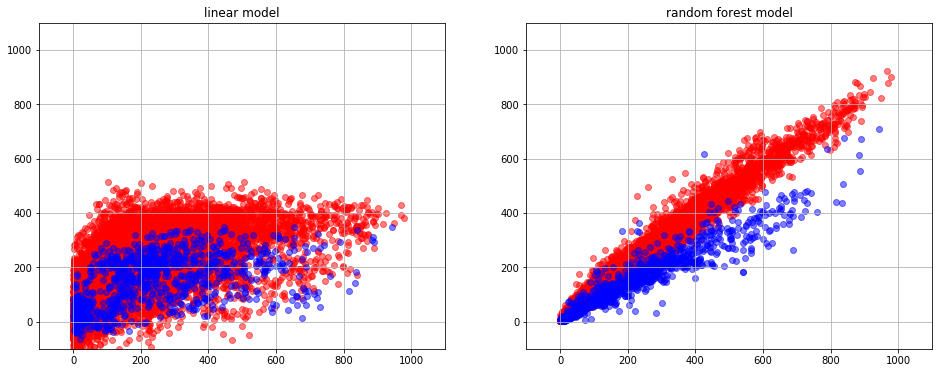

In [46]:
# отобразим объекты в координатах «значение целевой метки» и 
# «наше предсказание» и посмотрим, приблизились ли эти объекты к 
# диагональной области. Сравним «случайный лес» и линейную модель
pylab.figure(figsize=(16, 6))

pylab.subplot(1,2,1)
pylab.grid(True)
pylab.xlim(-100,1100)
pylab.ylim(-100,1100)
pylab.scatter(train_labels, grid_cv.best_estimator_.predict(train_data), alpha=0.5, color = 'red')
pylab.scatter(test_labels, grid_cv.best_estimator_.predict(test_data), alpha=0.5, color = 'blue')
pylab.title('linear model')

pylab.subplot(1,2,2)
pylab.grid(True)
pylab.xlim(-100,1100)
pylab.ylim(-100,1100)
pylab.scatter(train_labels, estimator.predict(train_data), alpha=0.5, color = 'red')
pylab.scatter(test_labels, estimator.predict(test_data), alpha=0.5, color = 'blue')
pylab.title('random forest model')
# объекты достаточно близко подошли к диагональной области.

А мы на этом заканчиваем. На этом видео мы научились обрабатывать признаки разных типов, а также научились строить сложные вложенные цепочки преобразований. Мы построили несколько моделей на данных Bike Sharing — это линейная модель и модель random forest, а также сравнили их качества. Я надеюсь, что модель random forest вас заинтересовала, потому что уже на следующей неделе вы перейдете к изучению новых семейств алгоритмов, среди которых random forest обязательно будет.

# Week 4 - 1. sklearn.decision_trees
# Sklearn

## sklearn.tree

документация: http://scikit-learn.org/stable/modules/classes.html#module-sklearn.tree

примеры: http://scikit-learn.org/stable/modules/classes.html#module-sklearn.tree

In [2]:
from matplotlib.colors import ListedColormap
from sklearn import model_selection, datasets, metrics, tree 
import numpy as np
%pylab inline

Populating the interactive namespace from numpy and matplotlib


### Генерация данных

In [3]:
# задача многоклассовой классификации с тремя классами
classification_problem = datasets.make_classification(
    n_features = 2, n_informative = 2, 
    n_classes = 3, n_redundant=0, 
    n_clusters_per_class=1, random_state=3)

In [4]:
# отрисуем полученные данные. Создадим colormap для точек
colors = ListedColormap(['red', 'blue', 'yellow'])
# и color map для разделяющих поверхностей
light_colors = ListedColormap(['lightcoral', 'lightblue', 'lightyellow'])

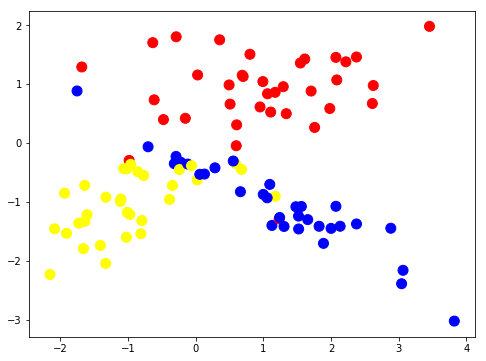

In [18]:
pylab.figure(figsize=(8,6))
pylab.scatter(map(lambda x: x[0], classification_problem[0]), map(lambda x: x[1], classification_problem[0]), 
              c=classification_problem[1], cmap=colors, s=100)
# s=100 задает размеры точки

In [6]:
# разобьем данные на обучение и тест, train_test_split разбивает данные
train_data, test_data, train_labels, test_labels = model_selection.train_test_split(classification_problem[0], 
                                                                                     classification_problem[1], 
                                                                                     test_size = 0.3,
                                                                                     random_state = 1)

### Модель DecisionTreeClassifier
возвращает объект classificator decision tree

In [7]:
# сначала сделаем классификатор с параметрами по умолчанию
clf = tree.DecisionTreeClassifier(random_state=1)
clf.fit(train_data, train_labels) # обучаем дерево

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=1,
            splitter='best')

In [8]:
# строим предсказания, передав predict-у нашу тестовую выборку
predictions = clf.predict(test_data)
# Проверяем accuracy. Передаем правильные ответы и предсказания
metrics.accuracy_score(test_labels, predictions)

0.7666666666666667

проанализируем, как меняется качество модели, а также вид разделяющей плоскости в зависимости от параметра дерева, например в зависимости от его глубины. 
### Разделяющая поверхность
Вспомогательная функция get_meshgrid создает сетку для разделяющей плоскости. На входе - данные, шаг и граница. Берем максимальные и минимальные значения по осям, вычитаем из низ border и получаем сетку с зазором. Получим все эти точки, будем получать точки с некоторым шагом (пусть он будет 0,05) и вернем некоторый объект под называнием meshgrid — набор наших точек.

In [9]:
def get_meshgrid(data, step=.05, border=.5,):
    x_min, x_max = data[:, 0].min() - border, data[:, 0].max() + border
    y_min, y_max = data[:, 1].min() - border, data[:, 1].max() + border
    return np.meshgrid(np.arange(x_min, x_max, step), np.arange(y_min, y_max, step))

Функция plot_decision_surface отвечает за отрисовку графиков. На вход: модель, которую анализируем; обучающая и тестовая выборка (как данные, так и метки); два объекта colormap: один чтобы отрисовывать объекты в плоскости признаков, другой чтобы отрисовывать разделяющую поверхность (разделяющая поверхность светлее). 
Чтобы получить разделяющую поверхность - сначала обучаем модель (fit) на обучающей выборке. 
Затем задаем размер рисунка. Строим subplot-ы обучающей и тестовой выборок. Для начала рисуем график с обучающими объектами. Нам нужно получить наш meshgrid, делаем это с помощью функции, которую мы определили шагом ранее. Чтобы раскрасить все точки в правильные цвета, сделаем следующее: представим, что каждая точка является объектом, который подлежит классификации. Можем взять обученную модель и применить ее к каждой точке на плоскости. Так как эти точки находятся внутри границ изменения признаков, то таким образом мы получим квадрат, на котором легко можно отобразить все обучающие объекты. Получим этот объект. С помощью predict будем классифицировать каждую из этих точек и  получим набор меток. Эти метки будем использовать в качестве цветов для построения разделяющей плоскости. Далее с помощью метода pcolormesh отрисуем разделяющую плоскость. Сюда передаем сами точки xx, yy. Также передаем наши предсказания. Они нужны будут, чтобы отрисовать объекты разными цветами, и указываем, какой colormap мы используем. В данном случае light_colors — светлые цвета. Далее поверх разделяющей поверхности мы можем отрисовать объекты. Делаем это с помощью scatter, здесь используем другой colormap. Дальше зададим графику название, и прямо в названии запишем качество получившейся модели. Оценим качество с помощью метрики accuracy, используем функцию accuracy_score. Аналогично поступим с тестовыми данными. Так как разделяющая поверхность не изменится, не будем заново ее получать, просто отрисуем еще раз готовую разделяющую поверхность и на ней отметим точки из нашей тестовой выборки. Вот ровно это сделает наша функция. Функцию определили, теперь применим ее. 

In [10]:
def plot_decision_surface(estimator, train_data, train_labels, test_data, test_labels, 
                          colors = colors, light_colors = light_colors):
    
    estimator.fit(train_data, train_labels) #fit model
    pyplot.figure(figsize = (16, 6)) #set figure size
    
    pyplot.subplot(1,2,1) #plot decision surface on the train data 
    xx, yy = get_meshgrid(train_data)
    mesh_predictions = np.array(estimator.predict(np.c_[xx.ravel(), yy.ravel()])).reshape(xx.shape)
    pyplot.pcolormesh(xx, yy, mesh_predictions, cmap = light_colors)
    pyplot.scatter(train_data[:, 0], train_data[:, 1], c = train_labels, s = 100, cmap = colors)
    pyplot.title('Train data, accuracy={:.2f}'.format(metrics.accuracy_score(train_labels, estimator.predict(train_data))))
    
    pyplot.subplot(1,2,2) # plot decision surface on the test data
    pyplot.pcolormesh(xx, yy, mesh_predictions, cmap = light_colors)
    pyplot.scatter(test_data[:, 0], test_data[:, 1], c = test_labels, s = 100, cmap = colors)
    pyplot.title('Test data, accuracy={:.2f}'.format(metrics.accuracy_score(test_labels, estimator.predict(test_data))))

Дерево глубины 1. Будет проверено только одно условие, и дальше должны следовать листья, так как глубина всего лишь 1. Передадим на вход функции plot_decision_surface и посмотрим, как будет выглядеть разделяющая поверхность. Так как дерево глубины 1, очевидно, что мы не сможем использовать 2 признака для классификации. Признак разделил объекты по вертикали.

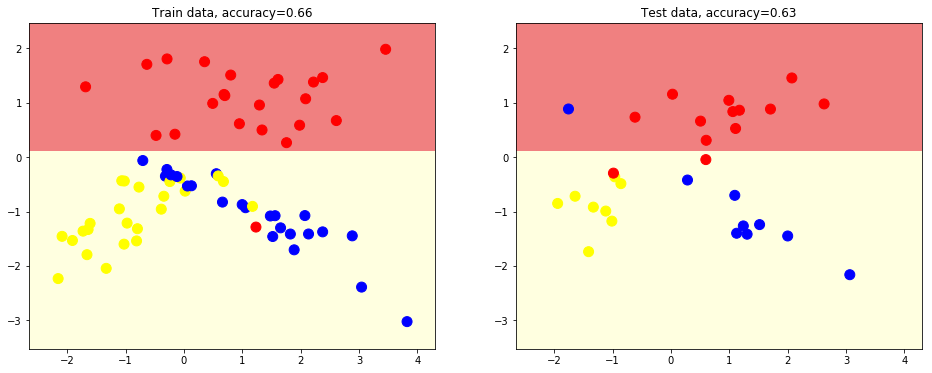

In [11]:
plot_decision_surface(estimator, train_data, train_labels, test_data, test_labels)

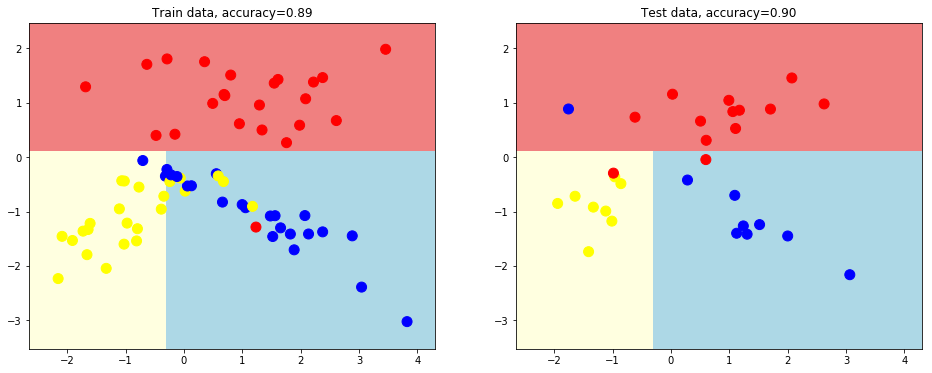

In [12]:
# Дерево глубины 2. Теперь делим объекты и по горизонтали и по вертикали. 
plot_decision_surface(tree.DecisionTreeClassifier(random_state = 1, max_depth = 2),
                      train_data, train_labels, test_data, test_labels)
# Качество растет на обучении и на тесте. 

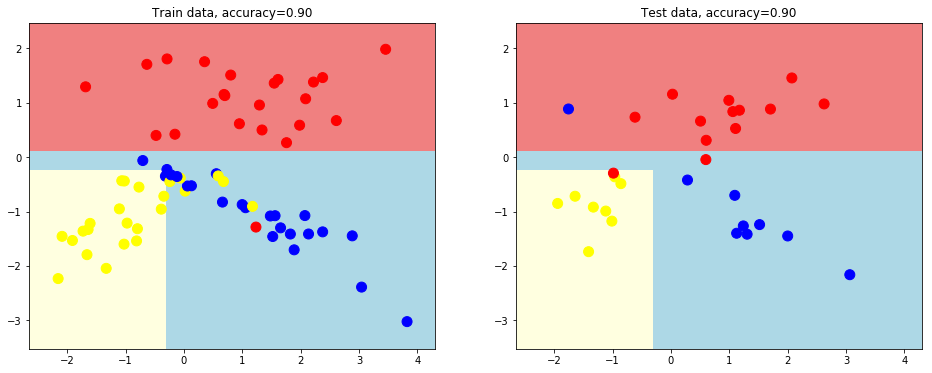

In [13]:
# Предположим, что глубина деревьев положительно влияет на качество, и чем
# глубже дерево, тем лучше. Построим дерево глубины 3. Видим, что качество 
# на обучении продолжает расти, а качество на тесте не падает. 
plot_decision_surface(tree.DecisionTreeClassifier(random_state = 1, max_depth = 3),
                      train_data, train_labels, test_data, test_labels)

Не будем ограничивать глубину дерева (чтобы на обучении не было ни одной ошибки). Разделяющая плоскость сложная, много областей нескольких цветов (качество на обучении 1), все объекты в области своего цвета. Но для тестовых данных такая разделяющая поверхность не являетсяоптимальной (многие точки в чужой области). Произошло переобучение. Чтобы бороться с переобучением, можно не только ограничиватьдерево по глубине, но и накладывать ограничения на другие параметры. 

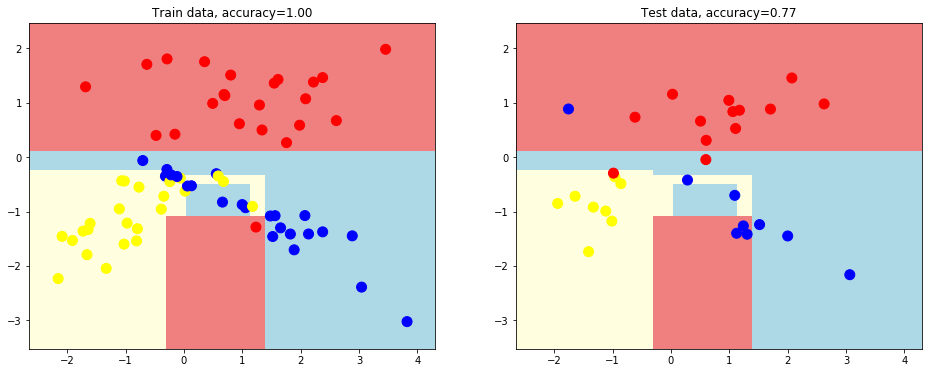

In [14]:
plot_decision_surface(tree.DecisionTreeClassifier(random_state = 1),
                      train_data, train_labels, test_data, test_labels)

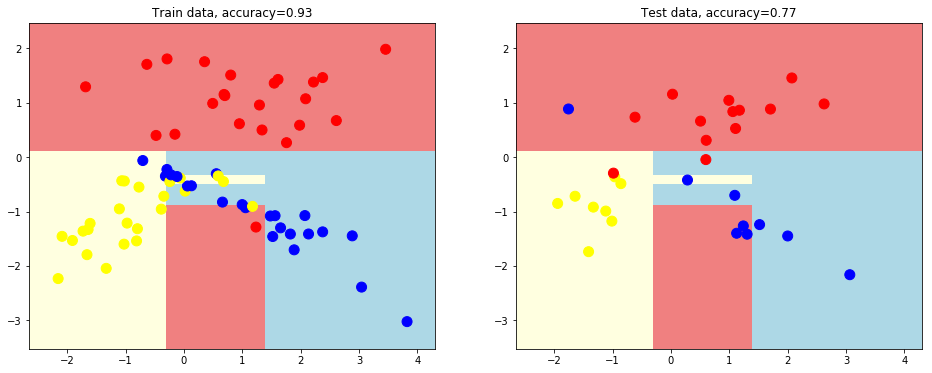

In [15]:
# ограничим количество объектов, которые необходимы для того, чтобы
# продолжать ветвление из некоторой вершины. 
# min_samples_leaf = 3 т.е. мин количество объектов в листе должно быть 3
# По умолчанию этот параметр равен 1. 
plot_decision_surface(tree.DecisionTreeClassifier(random_state = 1, min_samples_leaf = 3), 
                      train_data, train_labels, test_data, test_labels)
# Разделяющая поверхность стала проще. Уменьшилось качество на обучении, 
# но выросло на тесте => более хорошая модель.

# Week 4 - 2. sklearn.random_forest
# Sklearn

## sklearn.ensemble.RandomForestClassifier

документация:  http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html

In [3]:
import numpy as np
import pandas as pd
%pylab inline

Populating the interactive namespace from numpy and matplotlib


### Данные

Задача на kaggle: https://www.kaggle.com/c/bioresponse Данные: https://www.kaggle.com/c/bioresponse/data

По данным характеристикам молекулы требуется определить, будет ли дан биологический ответ (biological response). Всего доступно 1776 характеристик молекулы. Признаки нормализаваны. Для демонстрации используется обучающая выборка из исходных данных train.csv, файл с данными прилагается.

In [4]:
bioresponce = pd.read_csv('data/W4pynb - bioresponse.csv', header=0, sep=',')

bioresponce.head()
# в первом столбце целевая переменная (0, 1 - дан ли биологический ответ)
# в остальных признаки

,Activity,D1,D2,D3,D4,D5,D6,D7,D8,D9,...,D1767,D1768,D1769,D1770,D1771,D1772,D1773,D1774,D1775,D1776
0,1,0.000000,0.497009,0.10,0.0,0.132956,0.678031,0.273166,0.585445,0.743663,...,0,0,0,0,0,0,0,0,0,0
1,1,0.366667,0.606291,0.05,0.0,0.111209,0.803455,0.106105,0.411754,0.836582,...,1,1,1,1,0,1,0,0,1,0
2,1,0.033300,0.480124,0.00,0.0,0.209791,0.610350,0.356453,0.517720,0.679051,...,0,0,0,0,0,0,0,0,0,0
3,1,0.000000,0.538825,0.00,0.5,0.196344,0.724230,0.235606,0.288764,0.805110,...,0,0,0,0,0,0,0,0,0,0
4,0,0.100000,0.517794,0.00,0.0,0.494734,0.781422,0.154361,0.303809,0.812646,...,0,0,0,0,0,0,0,0,0,0


In [5]:
bioresponce.shape # смотрим размер
# 3751 молекула и 1777 признаков

(3751, 1777)

In [6]:
bioresponce.columns # выведем названия колонок

Index([u'Activity', u'D1', u'D2', u'D3', u'D4', u'D5', u'D6', u'D7', u'D8',
       u'D9',
       ...
       u'D1767', u'D1768', u'D1769', u'D1770', u'D1771', u'D1772', u'D1773',
       u'D1774', u'D1775', u'D1776'],
      dtype='object', length=1777)

In [7]:
# Отрежем целевую переменную для удобства анализа
bioresponce_target = bioresponce.Activity.values

In [8]:
# Посчитаем распределение объектов по классам
print 'bioresponse = 1: {:.2f}\nbioresponse = 0: {:.2f}'.format(sum(bioresponce_target)/float(len(bioresponce_target)), 
                1.0 - sum(bioresponce_target)/float(len(bioresponce_target)))

bioresponse = 1: 0.54
bioresponse = 0: 0.46


In [9]:
# Отдельно отрежем данные 
bioresponce_data = bioresponce.iloc[:, 1:]

### Модель RandomForestClassifier
Создаем объект класса RandomForestClassifier с нужными параметрами.
Для обучения и применения модели воспользуемся методами fit и predict. С другой стороны, анализировать качество модели, а то и параметров, вы тоже уже умеете. Это можно делать с помощью поиска по сетке или случайного поиска. Давайте мы не будем этого делать, а вместо этого решим другую задачу — проанализируем, как зависит качество модели от количества обучающих объектов выборки.

#### Кривые обучения для деревьев небольшой глубиной 

In [10]:
# Создадим модель. Строим случайный лес над 50 деревьями, каждый глубиной
# не больше 2
rf_classifier_low_depth = ensemble.RandomForestClassifier(n_estimators = 50, max_depth = 2, random_state = 1)

Теперь построим график изменения качества на обучающей и тестовой выборках в зависимости от того, на скольких объектах мы обучаемся. Для этого есть learning_curve - на вход подаем нужный алгоритм, данные и целевую функцию  Также скажем, в каких пропорциях хотим обучаться, т.е. на каких долях  обучающей выборки мы хотим строить модель. 

In [11]:
train_sizes, train_scores, test_scores = model_selection.learning_curve(rf_classifier_low_depth, bioresponce_data, bioresponce_target, 
                                                                       train_sizes=np.arange(0.1,1., 0.2), 
                                                                       cv=3, scoring='accuracy')

После этого с пом-ю метода будет построено несколько моделей и мы получим оценку качества на каждом объеме обучающей выборки и нам будут возвращены  размер обучающей выборки, оценки качества на трейне и оценка качества на тесте. С ними мы можем проанализировать как качество на обучении и тесте   меняется от объема обучающей выборки train_sizes=np.arange(0.1,1., 0.2) будем брать (от 0,1 до 1 с шагом 0,2) часть от обучающей выборки cv=3 кроссвалидация на 3 фолда

In [12]:
print train_sizes # показывает конкретное количество объектов на которых
# мы обучались от 250 до 2250
print train_scores.mean(axis = 1) # качество на обучении
print test_scores.mean(axis = 1)#качество на тесте
#  Так как проводилась кросс-валидация, сразу сделала усреднение по всем 
# фолдам (mean). axis = 1 т.е. усредняем по строчкам. В данном случае 
# каждая строка — результат измерения кросс-валидации, это подходит. 

[ 250  750 1250 1750 2250]
[0.74933333 0.71333333 0.68453333 0.69104762 0.69022222]
[0.62356685 0.64195598 0.65369955 0.66248974 0.66728527]


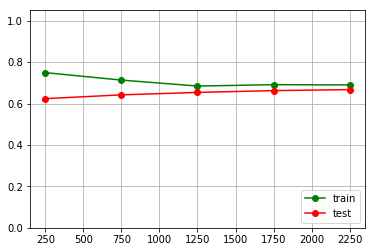

In [13]:
# построим график
pylab.grid(True) # добавим сетку 
# Строим две кривые — качество обучения на обучающей и на тестовой выборке
pylab.plot(train_sizes, train_scores.mean(axis = 1), 'g-', marker='o', label='train')
pylab.plot(train_sizes, test_scores.mean(axis = 1), 'r-', marker='o', label='test')
pylab.ylim((0.0, 1.05))
pylab.legend(loc='lower right')

В начале качество на обучающей выборке падает —  до 1250 деревьев, дальше меняется очень медленно. Но на тестовой выборке качество продолжает расти приблизительно до этой же точки, и дальше оно перестает меняться. Вывод: Дальнейший рост обучающей выборки вряд ли скажется на качестве нашей модели => модель данной сложности не может многое выиграть  за счет того, что мы обогатим данные. 
Увеличим сложность модели — возможно, это приведет к улучшению ее качества. Мы  обучали модель на деревьях глубины 2, увеличим глубину деревьев. 
#### Кривые обучения для деревьев большей глубины

In [14]:
# Создаем классификатор RandomForestClassifier, но max_depth = 10 — это 
# максимально возможная глубина деревьев. 
rf_classifier = ensemble.RandomForestClassifier(n_estimators = 50, max_depth = 10, random_state = 1)

In [15]:
# Теперь еще раз запустим команду learning_curve и построим кривую обучения
# на тесте и на обучении, при этом мы будем делать это по тем же самым 
# точкам, по тем же самым долям обучающей выборки. 
train_sizes, train_scores, test_scores = model_selection.learning_curve(rf_classifier, bioresponce_data, bioresponce_target, 
                                                                       train_sizes=np.arange(0.1,1, 0.2), 
                                                                       cv=3, scoring='accuracy')

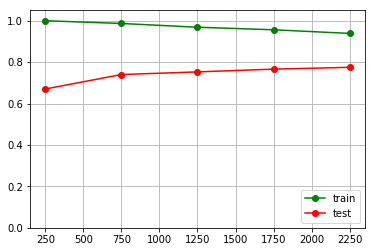

In [16]:
# Строим график. 
pylab.grid(True)
pylab.plot(train_sizes, train_scores.mean(axis = 1), 'g-', marker='o', label='train')
pylab.plot(train_sizes, test_scores.mean(axis = 1), 'r-', marker='o', label='test')
pylab.ylim((0.0, 1.05))
pylab.legend(loc='lower right')

Здесь противоположная ситуация — с ростом обучающей выборки, качество на тесте продолжает расти. То же самое можно сказать про обучение — качество на обучающей выборке продолжает падать не очень быстро. Вывод: модель данной сложности действительно получает некоторые преимущества от добавления объектов в обучение. Т.о. в данном случае имеет смысл увеличивать объем обучающей выборки. Объем обучающей выборки и сложность модели значительно сказываются на времени построения модели. С этой точки зрения строить кривые обучения очень полезно — можно проанализировать, имеет ли смысл добавлять больше данных в обучение. 

# Week 4 - 3. sklearn.rf_vs_gb
# Sklearn, XGBoost

## sklearn.ensemble.RandomForestClassifier

In [1]:
from sklearn import ensemble , model_selection, metrics 
import numpy as np
import pandas as pd
import os # без этой и следующей строк XGBOOST выдает dead kernel в макоси
os.environ['KMP_DUPLICATE_LIB_OK']='True'
import xgboost as xgb
# from xgboost import XGBClassifier
%pylab inline

Populating the interactive namespace from numpy and matplotlib


### Данные
Sklearn предоставляет готовую реализацию градиентного бустинга. Модуль ensemble, класс gradient boosting classifier. 
Мы с вами не будем изучать эту модель, а будем строить XGBoost — тот алгоритм, который изучали на прошлом уроке. 

Задача на kaggle: https://www.kaggle.com/c/bioresponse Данные: https://www.kaggle.com/c/bioresponse/data

По данным характеристикам молекулы требуется определить, будет ли дан биологический ответ (biological response) на основе данных о молекуле. Признаки нормализаваны. Для демонстрации используется обучающая выборка из исходных данных train.csv, файл с данными прилагается.

In [2]:
bioresponce = pd.read_csv('data/W4pynb - bioresponse.csv', header=0, sep=',')
bioresponce.head()

,Activity,D1,D2,D3,D4,D5,D6,D7,D8,D9,...,D1767,D1768,D1769,D1770,D1771,D1772,D1773,D1774,D1775,D1776
0,1,0.000000,0.497009,0.10,0.0,0.132956,0.678031,0.273166,0.585445,0.743663,...,0,0,0,0,0,0,0,0,0,0
1,1,0.366667,0.606291,0.05,0.0,0.111209,0.803455,0.106105,0.411754,0.836582,...,1,1,1,1,0,1,0,0,1,0
2,1,0.033300,0.480124,0.00,0.0,0.209791,0.610350,0.356453,0.517720,0.679051,...,0,0,0,0,0,0,0,0,0,0
3,1,0.000000,0.538825,0.00,0.5,0.196344,0.724230,0.235606,0.288764,0.805110,...,0,0,0,0,0,0,0,0,0,0
4,0,0.100000,0.517794,0.00,0.0,0.494734,0.781422,0.154361,0.303809,0.812646,...,0,0,0,0,0,0,0,0,0,0


В первом столбце у нас дана метка класса: 1 означает, что биологический ответ будет дан, 0 - обратное. И также нам доступны столбцы с параметрами молекулы.  
Отделим данные от метки класса. 

In [3]:
bioresponce_target = bioresponce.Activity.values
bioresponce_data = bioresponce.iloc[:, 1:]

Переходим к построению моделей. 
### Модель RandomForestClassifier
Cлучайный лес, и градиентный бустинг являются композициями алгоритмов. Их качество зависит от количества простых моделей, над которыми они строятся. Проанализируем, как изменяется качество алгоритма в зависимости от количества деревьев, над которыми они построены. 
#### Зависимость качества от количества деревьев
Начнем со случайного леса, зададим количество деревьев. Смотрим на одно дерево и далее от 10 до 55 деревьев с шагом 5. Хотим понять, как будет меняться качество в зависимости от того, сколько деревьев мы разрешили строить алгоритму. 

In [4]:
n_trees = [1] + range(10, 55, 5) 

Для этого пройдемся в цикле по заданному количеству деревьев и будем оценивать качество с помощью функции cross_val_score. При этом  будем делать кросс-валидацию на три фолда и будем использовать метрику accuracy. 

In [5]:
# %%timeit # почему то с таймерами не хочет работать
scoring = []
for n_tree in n_trees:
    estimator = ensemble.RandomForestClassifier(n_estimators = n_tree, min_samples_split=5, random_state=1)
    score = model_selection.cross_val_score(estimator, bioresponce_data, bioresponce_target, scoring = 'accuracy', cv = 3)    
    scoring.append(score)

scoring = np.asmatrix(scoring) # Результаты этого скоринга. 
scoring

matrix([[0.66906475, 0.668     , 0.6704    ],
        [0.75859313, 0.7592    , 0.7504    ],
        [0.78097522, 0.7616    , 0.7592    ],
        [0.78417266, 0.7736    , 0.7648    ],
        [0.78257394, 0.7736    , 0.7704    ],
        [0.78816946, 0.7752    , 0.7736    ],
        [0.78816946, 0.7856    , 0.7776    ],
        [0.78896882, 0.78      , 0.7832    ],
        [0.78976819, 0.7856    , 0.7896    ],
        [0.79536371, 0.7816    , 0.7928    ]])

Посмотрим на скоринг - это матрица из 10 строк. Каждая строка - количество деревьев, над которыми строили случайный лес. Первая строка соответствует одному дереву, последняя - 50 деревьям. Внутри - в каждой строке три значения качества. Мы делали кросс-валидацию по трем фолдам, соответственно, каждое значение соответствует качеству на одном фолде.  
Теперь построим следующий график:  количество деревьев от качества. Предполагаем, что качество должно расти с количеством деревьев. Будем строить график с помощью функции plot 

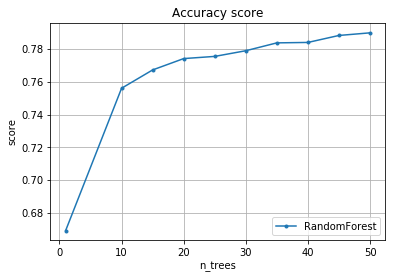

In [6]:
pylab.plot(n_trees, scoring.mean(axis = 1), marker='.', label='RandomForest')
pylab.grid(True) # Добавим сетку
pylab.xlabel('n_trees')
pylab.ylabel('score')
pylab.title('Accuracy score')
pylab.legend(loc='lower right')
# Когда у нас было всего одно дерево, качество было низкое, и 
# дальше растет с увеличением количества деревьев. 

#### Кривые обучения для деревьев большей глубины
Теперь построим градиентный бустинг и посмотрим, как будет меняться качество алгоритма  от количества деревьев.  Используем тот же список количества деревьев — от 1 до 50. Обучаем модель. Для этого библиотека XGBoost и класс XGBClassifier. Передаем туда: learning_rate — глубина дерева, количество деревьев и т.д. Для оценки качества - cross_val_score. Получившийся объект имеет интерфейс, совместимый с этой функцией.

In [7]:
# %%timeit # почему то с таймерами не хочет работать
xgb_scoring = []
for n_tree in n_trees:
    estimator = xgb.XGBClassifier(learning_rate=0.1, max_depth=5, n_estimators=n_tree, min_child_weight=3)
    score = model_selection.cross_val_score(estimator, bioresponce_data, bioresponce_target, 
                                             scoring = 'accuracy', cv = 3)    
    xgb_scoring.append(score)
    
xgb_scoring = np.asmatrix(xgb_scoring)
# Получаем скоринг для градиентного бустинга 
xgb_scoring

matrix([[0.76498801, 0.756     , 0.756     ],
        [0.77617906, 0.7752    , 0.7688    ],
        [0.77857714, 0.7744    , 0.7768    ],
        [0.7873701 , 0.7784    , 0.7768    ],
        [0.79216627, 0.7736    , 0.7832    ],
        [0.79776179, 0.7776    , 0.7824    ],
        [0.79616307, 0.7816    , 0.78      ],
        [0.79296563, 0.7848    , 0.7792    ],
        [0.79856115, 0.7832    , 0.7808    ],
        [0.79936051, 0.7832    , 0.7832    ]])

Построим аналогичный график. Оценки качества для градиентного бустинга готовы. Быстрее случайного леса. Видим, что получили аналогичную матрицу, практически такую же, как в предыдущем случае, только для градиентного бустинга.  
Теперь возьмем скоринг для градиентного бустинга, скоринг для случайного леса и отрисуем их на одной плоскости, чтобы можно было их сравнить. 

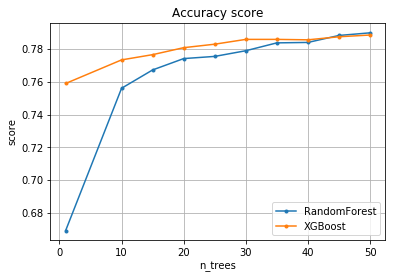

In [8]:
pylab.plot(n_trees, scoring.mean(axis = 1), marker='.', label='RandomForest')
pylab.plot(n_trees, xgb_scoring.mean(axis = 1), marker='.', label='XGBoost')
pylab.grid(True)
pylab.xlabel('n_trees')
pylab.ylabel('score')
pylab.title('Accuracy score')
pylab.legend(loc='lower right')

Оба алгоритма имеют довольно высокое качество. Это видно из правой части графика. Но чтобы достигнуть его, градиентному бустингу нужно существенно меньше деревьев, чем случайному лесу. В левой части графика видно, что градиентный бустинг начинает с более высокой отметки.

#### **Если Вас заинтересовал xgboost:**
python api: http://xgboost.readthedocs.org/en/latest/python/python_api.html

установка: http://xgboost.readthedocs.io/en/latest/build.html

# Week 5 - imdb
# Рецензии на imdb

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

Имеются 25000 рецензий пользователей imdb с бинарными метками, посчитанными по оценкам: 0 при оценке < 5 и 1 при оценке >=7.

Полные данные: https://www.kaggle.com/c/word2vec-nlp-tutorial/data

Загрузим выбоку:

In [2]:
imdb = pd.read_csv('labeledTrainData.tsv', delimiter='\t')
imdb.shape

(25000, 3)

In [3]:
imdb.head()

,id,sentiment,review
0,5814_8,1,With all this stuff going down at the moment w...
1,2381_9,1,"\The Classic War of the Worlds\"" by Timothy Hi..."
2,7759_3,0,The film starts with a manager (Nicholas Bell)...
3,3630_4,0,It must be assumed that those who praised this...
4,9495_8,1,Superbly trashy and wondrously unpretentious 8...


Классы сбалансированы:

In [4]:
imdb.sentiment.value_counts()

1    12500
0    12500
Name: sentiment, dtype: int64

Разобъём выборку на обучение и контроль:

In [5]:
from sklearn.cross_validation import train_test_split
texts_train, texts_test, y_train, y_test = train_test_split(imdb.review.values, imdb.sentiment.values)

Векторизуем тексты рецензий:

In [6]:
from sklearn.feature_extraction.text import TfidfVectorizer
vect = TfidfVectorizer(sublinear_tf=True, use_idf=True)
X_train = vect.fit_transform(texts_train)
X_test = vect.transform(texts_test)

## Логистическая регрессия

Настроим на векторизованных данных логистическую регрессию и посчитаем AUC:

In [7]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
clf = LogisticRegression()
clf.fit(X_train, y_train)
print metrics.accuracy_score(y_test, clf.predict(X_test))
print metrics.roc_auc_score(y_test, clf.predict_proba(X_test)[:, 1])

0.88448
0.95540516365


Признаков получилось очень много:

In [8]:
X_train.shape

(18750, 66759)

Попробуем отбирать признаки с помощью лассо:

In [12]:
clf = LogisticRegression(C=0.15, penalty='l1')
clf.fit(X_train, y_train)
print np.sum(np.abs(clf.coef_) > 1e-4)
print metrics.accuracy_score(y_test, clf.predict(X_test))
print metrics.roc_auc_score(y_test, clf.predict_proba(X_test)[:, 1])

113
0.81216
0.896471598776


Ещё один способ отбора признаков — рандомизированная логистическая регрессия:

In [13]:
from sklearn.linear_model import RandomizedLogisticRegression
rlg = RandomizedLogisticRegression(C=0.13)
rlg.fit(X_train, y_train)

RandomizedLogisticRegression(C=0.13, fit_intercept=True,
               memory=Memory(cachedir=None), n_jobs=1, n_resampling=200,
               normalize=True, pre_dispatch='3*n_jobs', random_state=None,
               sample_fraction=0.75, scaling=0.5, selection_threshold=0.25,
               tol=0.001, verbose=False)

Посмотрим, сколько признаков отбирается:

In [14]:
np.sum(rlg.scores_ > 0)

121

Настроим логистическую регрессию на отобранных признаках:

In [15]:
X_train_lasso = X_train[:, rlg.scores_ > 0]
X_test_lasso = X_test[:, rlg.scores_ > 0]

In [16]:
clf = LogisticRegression(C=1)
clf.fit(X_train_lasso, y_train)
print metrics.accuracy_score(y_test, clf.predict(X_test_lasso))
print metrics.roc_auc_score(y_test, clf.predict_proba(X_test_lasso)[:, 1])

0.82032
0.905568194979


## Метод главных компонент

Сделаем 100 синтетических признаков с помощью метода главных компонент:

In [17]:
from sklearn.decomposition import TruncatedSVD
tsvd = TruncatedSVD(n_components=100)
X_train_pca = tsvd.fit_transform(X_train)
X_test_pca = tsvd.transform(X_test)

Обучим на них логистическую регрессию:

In [18]:
clf = LogisticRegression()
clf.fit(X_train_pca, y_train)
print metrics.accuracy_score(y_test, clf.predict(X_test_pca))
print metrics.roc_auc_score(y_test, clf.predict_proba(X_test_pca)[:, 1])

0.856
0.932861874918


По 100 полученных таким способом признакам качество получается не намного хуже, чем по всем 66702!

Попробуем обучить на них обучить случайный лес:

In [19]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators=100)
clf.fit(X_train_pca, y_train)
print metrics.accuracy_score(y_test, clf.predict(X_test_pca))
print metrics.roc_auc_score(y_test, clf.predict_proba(X_test_pca)[:, 1])

0.828
0.903574861645


Признаки, которые даёт метод главных компонент, оптимальны для линейных методов, поэтому логистическая регрессия показывает результаты лучше, чем сложные нелинейные классификаторы.